# Data Analysis Final Project
**Due Date:** January 29, 2026, 23:59  

**Group:** Cuircuit Synergy  

**Created By:** Jeremia Baumgartner, Lorenz Buchinger, Tim Zwölfer  

---
**Table of contents**
1. [A. Data Preprocessing and Data Quality (70 points)](#a-data-preprocessing-and-data-quality-70-points)
2. [B. Visualization and Exploratory Analysis (55 points)](#b-visualization-and-exploratory-analysis-55-points)
3. [C. Probability and Event Analysis (45 points)](#c-probability-and-event-analysis-45-points)
4. [D. Statistical Theory Applications (45 points)](#d-statistical-theory-applications-45-points)
5. [E. Regression and Predictive Modeling (45 points)](#e-regression-and-predictive-modeling-45-points)
6. [F. Dimensionality Reduction and Statistical Tests (40 points)](#f-dimensionality-reduction-and-statistical-tests-40-points)



---
**Initial Setup**

In [2]:
# Initial setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting
plt.rcParams.update({
    'figure.figsize': [6, 4],
    'figure.dpi': 150,
    'figure.autolayout': True,
    'axes.labelsize': 8,
    'axes.titlesize': 10,
    'font.size': 6,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6
})

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

np.random.seed(42)

---
**Load Data**

In [3]:
df_csv_data = pd.read_csv('traffic_accidents.csv')
df_csv_data_raw = df_csv_data # Keep a raw copy

---
## A. Data Preprocessing and Data Quality (70 points)
---
**Assigned to Lorenz**
- Dataset overview (dimensions, columns, types, time range, sampling rate, missingness
summary) (10 points)
- Basic statistical analysis using pandas (descriptives, grouped stats, quantiles) (10 points)
- Original data quality analysis with visualization (missingness patterns, outliers, dupli-
cates, timestamp gaps, inconsistent units) (20 points)
- Data preprocessing pipeline (cleaning steps, handling missing data, outliers strategy, re-
sampling or alignment if needed, feature engineering basics) (20 points)
- Preprocessed vs original comparison (before/after visuals plus commentary on what changed
and why) (10 points)

### Dataset Overview  
**Dimensions**

In [4]:
print("The dataset contains", df_csv_data.shape[0], "rows and", df_csv_data.shape[1], "columns.")

The dataset contains 209306 rows and 24 columns.


**Columns and types**

In [5]:
schema_table = (
    df_csv_data.dtypes
    .reset_index()
    .rename(columns={"index": "column", 0: "dtype"})
)

schema_table

column    dtype
0                      crash_date   object
1          traffic_control_device   object
2               weather_condition   object
3              lighting_condition   object
4                first_crash_type   object
5                 trafficway_type   object
6                       alignment   object
7            roadway_surface_cond   object
8                     road_defect   object
9                      crash_type   object
10         intersection_related_i   object
11                         damage   object
12        prim_contributory_cause   object
13                      num_units    int64
14             most_severe_injury   object
15                 injuries_total  float64
16                 injuries_fatal  float64
17        injuries_incapacitating  float64
18    injuries_non_incapacitating  float64
19  injuries_reported_not_evident  float64
20         injuries_no_indication  float64
21                     crash_hour    int64
22              crash_day_of_week    int64
23                    crash_month    int64

**Time Range**

In [6]:
first_date = df_csv_data["crash_date"].min()
last_date = df_csv_data["crash_date"].max()

print("First entry date:", first_date)
print("Last entry date:", last_date)

First entry date: 01/01/2016 01:03:00 AM
Last entry date: 12/31/2024 12:55:00 PM


**Sampling Rate**  
There is no constant sampling rate since car accidents don't happen in fixed intervals.

**Missingness Summary**  
Missing values in the dataset are encoded using the string 'UNKNOWN' rather than null values.

In [7]:
num_values_total = df_csv_data_raw.shape[0] * df_csv_data_raw.shape[1]
print("Total number of values in the dataset:", num_values_total)

unknown_total = (df_csv_data_raw == "UNKNOWN").sum().sum()
print("Total UNKNOWN values:", unknown_total)

unknown_percentage = (unknown_total / num_values_total) * 100
print(f"Percentage of UNKNOWN values: {unknown_percentage:.2f}%")

Total number of values in the dataset: 5023344
Total UNKNOWN values: 63320
Percentage of UNKNOWN values: 1.26%


In [8]:
missing_summary = pd.DataFrame({
    "missing_count": (df_csv_data_raw == "UNKNOWN").sum(),
    "missing_percent": ((df_csv_data_raw == "UNKNOWN").mean() * 100).round(2)
}).sort_values(by="missing_percent", ascending=False)

missing_summary

missing_count  missing_percent
road_defect                            34426            16.45
roadway_surface_cond                   12509             5.98
weather_condition                       6534             3.12
traffic_control_device                  4455             2.13
lighting_condition                      4336             2.07
trafficway_type                         1060             0.51
first_crash_type                           0             0.00
crash_date                                 0             0.00
alignment                                  0             0.00
crash_type                                 0             0.00
intersection_related_i                     0             0.00
damage                                     0             0.00
prim_contributory_cause                    0             0.00
num_units                                  0             0.00
most_severe_injury                         0             0.00
injuries_total                             0             0.00
injuries_fatal                             0             0.00
injuries_incapacitating                    0             0.00
injuries_non_incapacitating                0             0.00
injuries_reported_not_evident              0             0.00
injuries_no_indication                     0             0.00
crash_hour                                 0             0.00
crash_day_of_week                          0             0.00
crash_month                                0             0.00

### Basic Statistical Analysis Using Pandas (descriptives, grouped stats, quantiles)

**Descriptive Analysis**  
Qantiles, min., max., mean value and standard deviation of all columns.

In [9]:
df_csv_data = df_csv_data.replace("UNKNOWN", np.nan)
df_csv_data.describe()

num_units  injuries_total  injuries_fatal  injuries_incapacitating  \
count  209306.000000   209306.000000   209306.000000            209306.000000   
mean        2.063300        0.382717        0.001859                 0.038102   
std         0.396012        0.799720        0.047502                 0.233964   
min         1.000000        0.000000        0.000000                 0.000000   
25%         2.000000        0.000000        0.000000                 0.000000   
50%         2.000000        0.000000        0.000000                 0.000000   
75%         2.000000        1.000000        0.000000                 0.000000   
max        11.000000       21.000000        3.000000                 7.000000   

       injuries_non_incapacitating  injuries_reported_not_evident  \
count                209306.000000                  209306.000000   
mean                      0.221241                       0.121516   
std                       0.614960                       0.450865   
min                       0.000000                       0.000000   
25%                       0.000000                       0.000000   
50%                       0.000000                       0.000000   
75%                       0.000000                       0.000000   
max                      21.000000                      15.000000   

       injuries_no_indication     crash_hour  crash_day_of_week    crash_month  
count           209306.000000  209306.000000      209306.000000  209306.000000  
mean                 2.244002      13.373047           4.144024       6.771822  
std                  1.241175       5.603830           1.966864       3.427593  
min                  0.000000       0.000000           1.000000       1.000000  
25%                  2.000000       9.000000           2.000000       4.000000  
50%                  2.000000      14.000000           4.000000       7.000000  
75%                  3.000000      17.000000           6.000000      10.000000  
max                 49.000000      23.000000           7.000000      12.000000

In [10]:
quantiles = df_csv_data.quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
quantiles

TypeError: unsupported operand type(s) for -: 'str' and 'str'

**Grouped Stats**

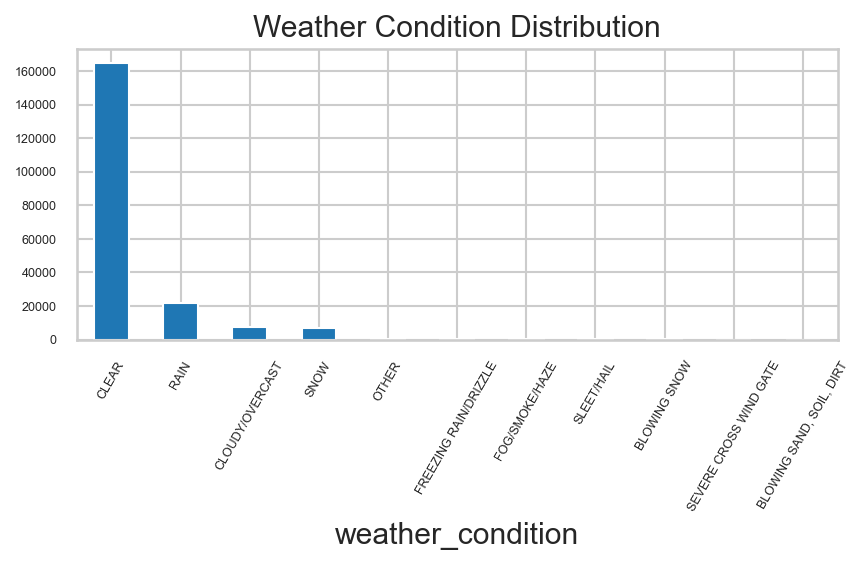

In [ ]:
ax = df_csv_data["weather_condition"].value_counts().plot(kind="bar", title="Weather Condition Distribution")
ax.tick_params(axis='x', labelsize=6)
ax.tick_params(axis='y', labelsize=6)
ax.tick_params(axis="x", rotation=60)

In [ ]:
# Analysis of correlation between injuries and weather condition
df_csv_data.groupby("weather_condition")["injuries_total"].agg(
    ["count", "mean", "median", "std"]
)

count      mean  median       std
weather_condition                                           
BLOWING SAND, SOIL, DIRT       1  0.000000     0.0       NaN
BLOWING SNOW                 127  0.314961     0.0  0.752781
CLEAR                     164700  0.390401     0.0  0.812737
CLOUDY/OVERCAST             7533  0.369308     0.0  0.745190
FOG/SMOKE/HAZE               360  0.444444     0.0  0.829285
FREEZING RAIN/DRIZZLE        510  0.460784     0.0  0.864851
OTHER                        627  0.483254     0.0  0.821607
RAIN                       21703  0.411510     0.0  0.808552
SEVERE CROSS WIND GATE        32  0.250000     0.0  0.762001
SLEET/HAIL                   308  0.461039     0.0  0.851388
SNOW                        6871  0.308543     0.0  0.698708

In [ ]:
# Analysis of correlation between injuries and time of day
df_csv_data.groupby("crash_hour")["injuries_total"].agg(
    ["count", "mean", "median", "std"]
)

count      mean  median       std
crash_hour                                   
0            4487  0.537330     0.0  0.969841
1            3729  0.534191     0.0  0.974719
2            3080  0.579221     0.0  1.078996
3            2364  0.537225     0.0  0.976171
4            2104  0.480989     0.0  0.875850
5            2819  0.431004     0.0  0.813593
6            4772  0.397737     0.0  0.799431
7            9405  0.360978     0.0  0.747282
8           11381  0.349354     0.0  0.729552
9            9300  0.360215     0.0  0.795817
10           8990  0.356062     0.0  0.751107
11          10052  0.362813     0.0  0.762115
12          11726  0.346239     0.0  0.749941
13          11949  0.346221     0.0  0.752781
14          13349  0.352910     0.0  0.736198
15          15894  0.340380     0.0  0.747930
16          16025  0.345897     0.0  0.758448
17          16097  0.344598     0.0  0.748072
18          13431  0.360063     0.0  0.764862
19           9683  0.402355     0.0  0.829408
20           8219  0.423653     0.0  0.852240
21           7472  0.449143     0.0  0.920089
22           7035  0.457854     0.0  0.892124
23           5943  0.463571     0.0  0.901013

### Original data quality analysis with visualization
**Missingness Patterns**

In [ ]:
missing_counts = df_csv_data.isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

road_defect               34426
roadway_surface_cond      12509
weather_condition          6534
traffic_control_device     4455
lighting_condition         4336
trafficway_type            1060
dtype: int64

In [ ]:
# Ensure datetime
df = df_csv_data.copy()
df["crash_date"] = pd.to_datetime(df["crash_date"], format='%m/%d/%Y %I:%M:%S %p')

# Keep only relevant columns
df = df[["crash_date"] + cols]

# Create monthly period
df["month"] = df["crash_date"].dt.to_period("M")

# Calculate fraction missing per month per column
monthly_missing = (
    df.groupby("month")[cols]
      .apply(lambda x: x.isna().mean())
)

# Convert PeriodIndex to timestamp for plotting
monthly_missing.index = monthly_missing.index.to_timestamp()

# Plot heatmap
plt.figure(figsize=(16, 6))
ax = sns.heatmap(
    monthly_missing.T,
    cmap="rocket_r",
    cbar_kws={"label": "Fraction Missing"},
    linewidths=0.3
)

# Year-only x-axis ticks
months = monthly_missing.index
year_ticks = [i for i, d in enumerate(months) if d.month == 1]
year_labels = [d.year for d in months if d.month == 1]

ax.set_xticks(year_ticks)
ax.set_xticklabels(year_labels, rotation=0)

plt.title("Monthly Missing Data Fraction by Column")
plt.xlabel("Year")
plt.ylabel("Column")
plt.tight_layout()
plt.show()


/tmp/ipykernel_58081/2573400663.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["crash_date"] = pd.to_datetime(df["crash_date"])


KeyboardInterrupt: 

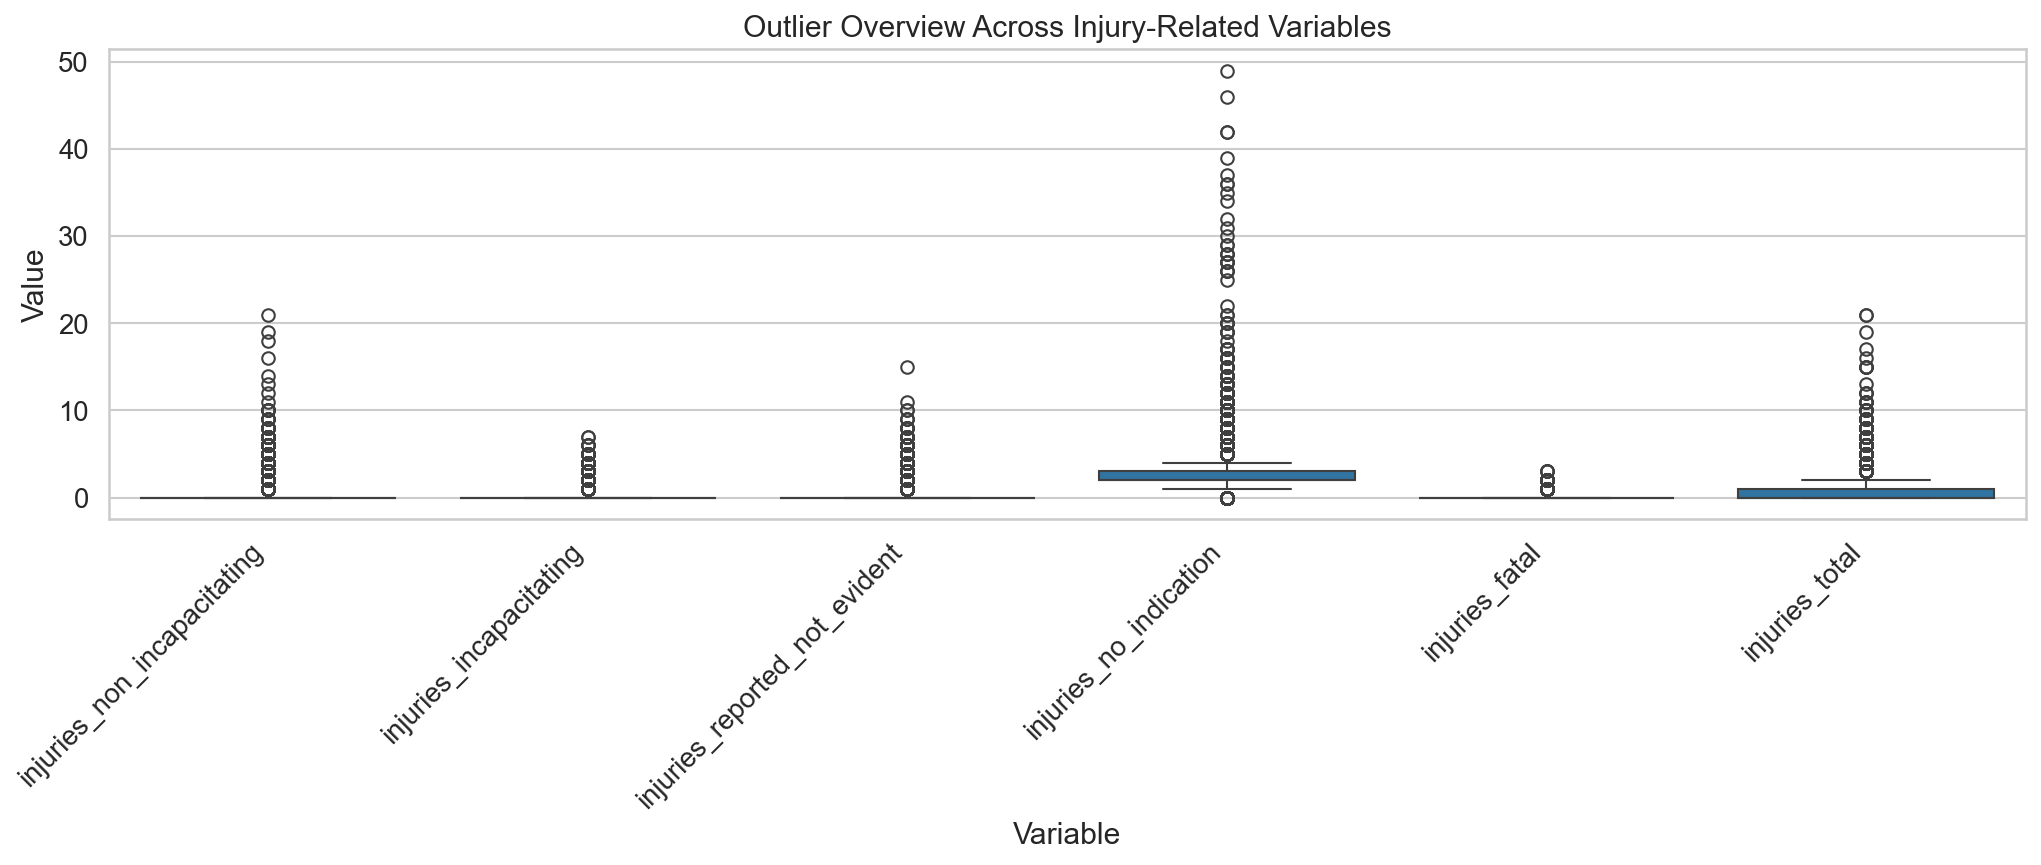

In [ ]:
col_names = [
    "injuries_non_incapacitating",
    "injuries_incapacitating",
    "injuries_reported_not_evident",
    "injuries_no_indication",
    "injuries_fatal",
    "injuries_total"
]

selected_cols = df_csv_data[col_names]

df_melted = selected_cols.melt(
    var_name="Variable",
    value_name="Value"
)

plt.figure(figsize=(14,6))
sns.boxplot(
    data=df_melted,
    x="Variable",
    y="Value",
    showfliers=True
)
plt.xticks(rotation=45, ha="right")
plt.title("Outlier Overview Across Injury-Related Variables")
plt.tight_layout()
plt.show()

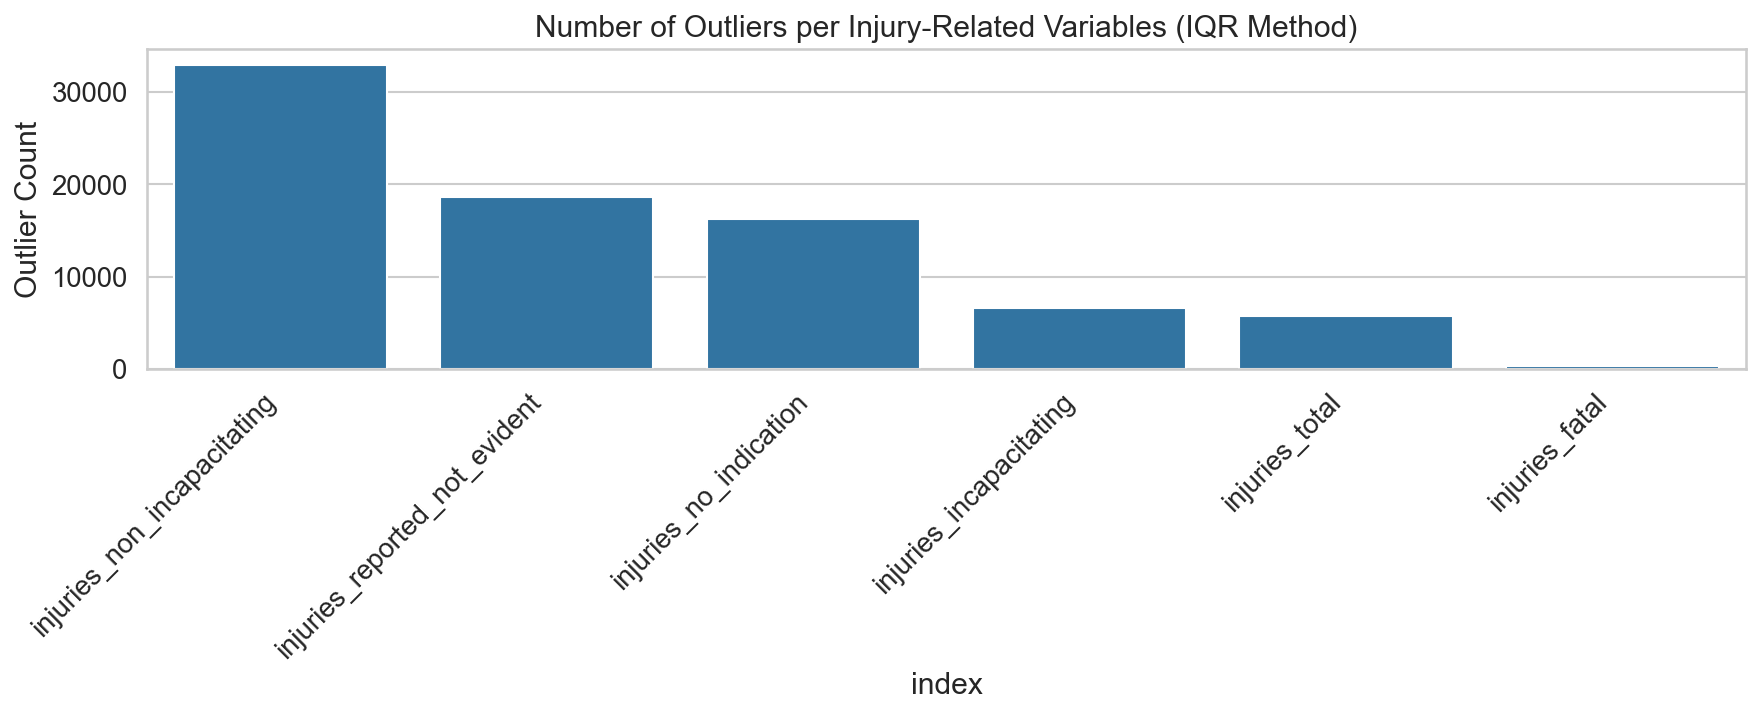

In [ ]:
outlier_counts = {}

for col in col_names:
    Q1 = df_csv_data[col].quantile(0.25)
    Q3 = df_csv_data[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = (
        (df_csv_data[col] < Q1 - 1.5 * IQR) |
        (df_csv_data[col] > Q3 + 1.5 * IQR)
    )

    outlier_counts[col] = outliers.sum()

outlier_df = (
    pd.DataFrame.from_dict(
        outlier_counts,
        orient="index",
        columns=["Outlier Count"]
    )
    .sort_values("Outlier Count", ascending=False)
)

plt.figure(figsize=(12,5))
sns.barplot(
    data=outlier_df.reset_index(),
    x="index",
    y="Outlier Count"
)
plt.xticks(rotation=45, ha="right")
plt.title("Number of Outliers per Injury-Related Variables (IQR Method)")
plt.tight_layout()
plt.show()

In [ ]:
# Check for typos, different capitalizations, or inconsistent entries in categorical columns

for col in df_csv_data.select_dtypes(include="object"):
    print(col)
    print(df_csv_data[col].value_counts().head())
    print("-"*40)

# No typos or inconsistencies found in categorical columns

crash_date
crash_date
12/29/2020 05:00:00 PM    10
02/17/2022 03:30:00 PM     8
11/26/2018 08:30:00 AM     6
06/05/2021 01:00:00 PM     6
09/11/2019 04:30:00 PM     6
Name: count, dtype: int64
----------------------------------------
traffic_control_device
traffic_control_device
TRAFFIC SIGNAL       123944
STOP SIGN/FLASHER     49139
NO CONTROLS           29508
OTHER                   670
YIELD                   468
Name: count, dtype: int64
----------------------------------------
weather_condition
weather_condition
CLEAR              164700
RAIN                21703
CLOUDY/OVERCAST      7533
SNOW                 6871
OTHER                 627
Name: count, dtype: int64
----------------------------------------
lighting_condition
lighting_condition
DAYLIGHT                  134109
DARKNESS, LIGHTED ROAD     53378
DARKNESS                    7436
DUSK                        6323
DAWN                        3724
Name: count, dtype: int64
----------------------------------------
first_cras

**Analysis of Timestamp Gaps**

In [ ]:
# Ensure datetime and sort
df = df_csv_data.copy()
df["crash_date"] = pd.to_datetime(df["crash_date"])
df = df.sort_values("crash_date")

# Calculate gaps between consecutive accidents
df["time_gap"] = df["crash_date"].diff()

# Drop the first row (NaT gap)
gaps = df.dropna(subset=["time_gap"])

# Filter gaps greater than 1 day
long_gaps = (
    gaps[gaps["time_gap"] > pd.Timedelta(days=1)]
    [["crash_date", "time_gap"]]
    .rename(columns={"crash_date": "gap_end"})
)

# Add gap start for clarity
long_gaps["gap_start"] = long_gaps["gap_end"] - long_gaps["time_gap"]

# Optional: sort largest gaps first
long_gaps = long_gaps.sort_values("time_gap", ascending=False)

long_gaps


C:\Users\Tim\AppData\Local\Temp\ipykernel_2136\1628767530.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["crash_date"] = pd.to_datetime(df["crash_date"])


gap_end          time_gap           gap_start
121162 2015-02-13 08:00:00 621 days 11:31:00 2013-06-01 20:29:00
132318 2015-05-25 23:38:00 101 days 15:38:00 2015-02-13 08:00:00
23119  2013-06-01 20:29:00  90 days 03:41:00 2013-03-03 16:48:00
106211 2015-08-02 19:55:00  68 days 20:17:00 2015-05-25 23:38:00
46652  2015-08-14 09:30:00   2 days 19:15:00 2015-08-11 14:15:00
42585  2015-08-06 10:00:00   1 days 19:30:00 2015-08-04 14:30:00
1958   2015-08-10 09:15:00   1 days 12:00:00 2015-08-08 21:15:00
15595  2015-08-17 01:11:00   1 days 10:11:00 2015-08-15 15:00:00
96371  2015-08-11 14:15:00   1 days 05:00:00 2015-08-10 09:15:00

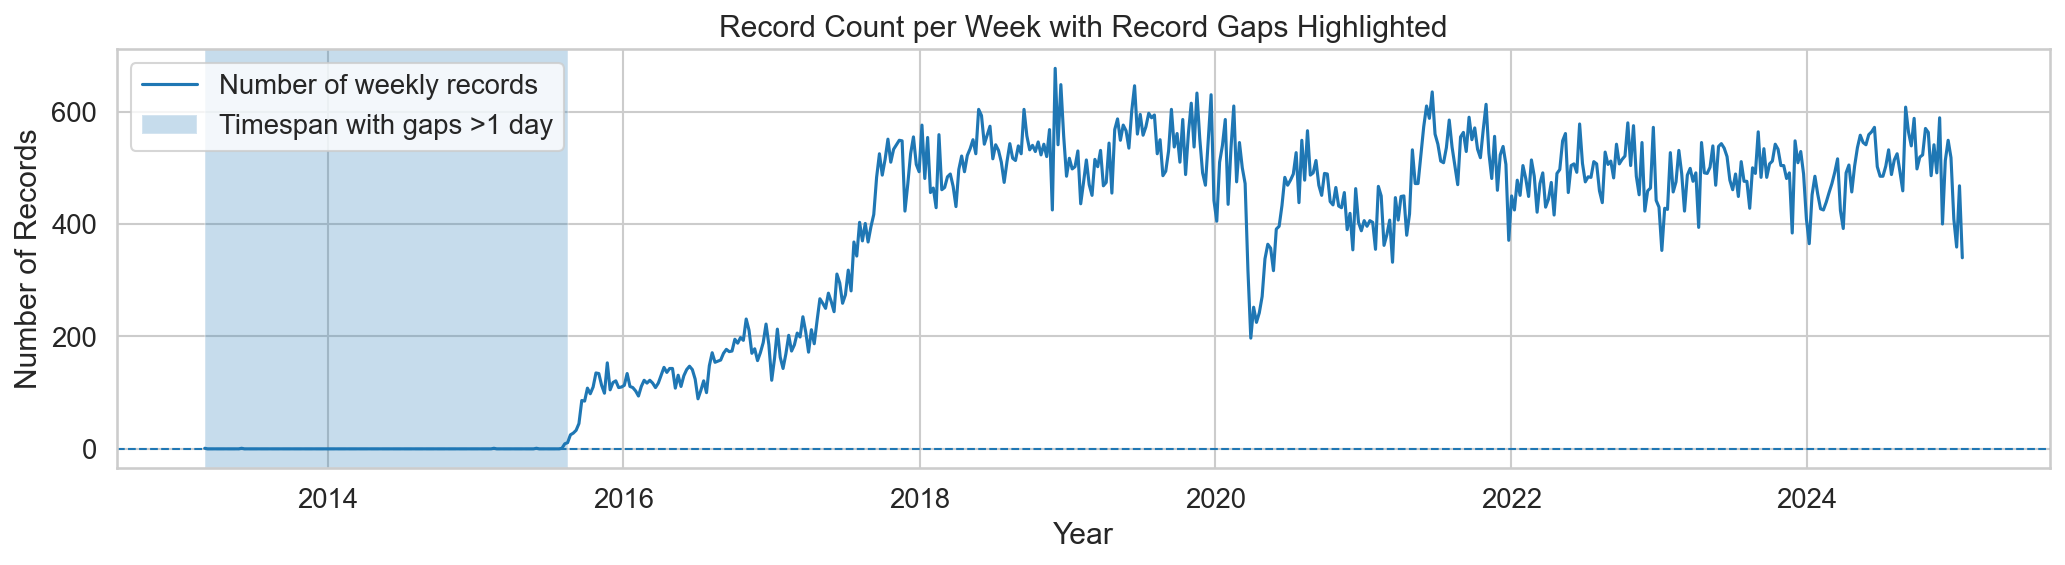

In [ ]:
# Ensure datetime
df["crash_date"] = pd.to_datetime(df["crash_date"])

# Weekly record counts
weekly_counts = (
    df.set_index("crash_date")
      .resample("W")
      .size()
)

# Compute overall gap span
gap_span_start = long_gaps["gap_start"].min()
gap_span_end = long_gaps["gap_end"].max()

# Plot full timeline
plt.figure(figsize=(14, 4))
plt.plot(weekly_counts.index, weekly_counts.values, label="Number of weekly records")
plt.axhline(0, linestyle="--", linewidth=1)

# Highlight overall gap timespan
plt.axvspan(
    gap_span_start,
    gap_span_end,
    alpha=0.25,
    label="Timespan with gaps >1 day"
)

plt.title("Record Count per Week with Record Gaps Highlighted")
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\Tim\AppData\Local\Temp\ipykernel_2136\2252602108.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_plot["crash_date"] = pd.to_datetime(df_plot["crash_date"])


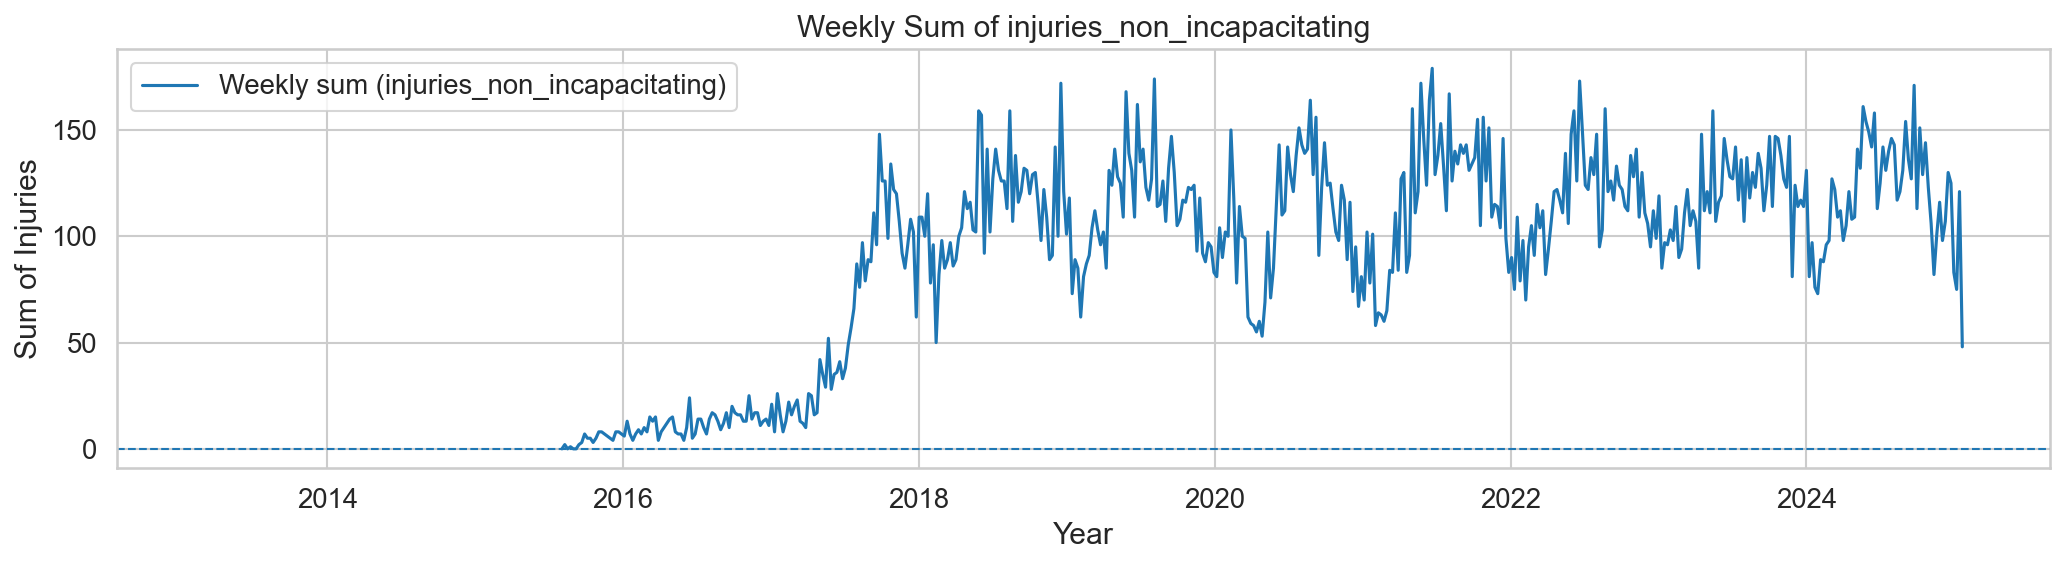

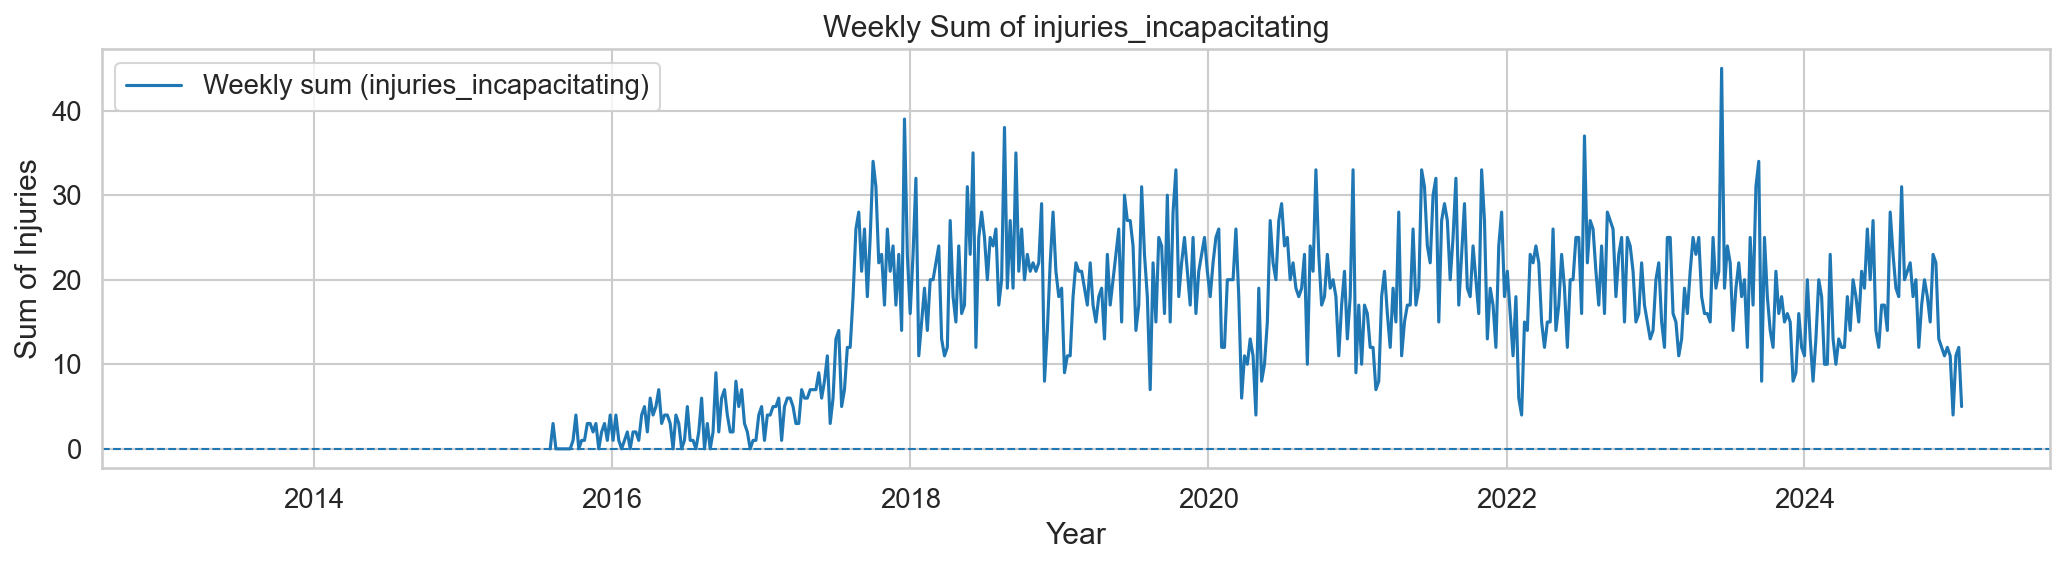

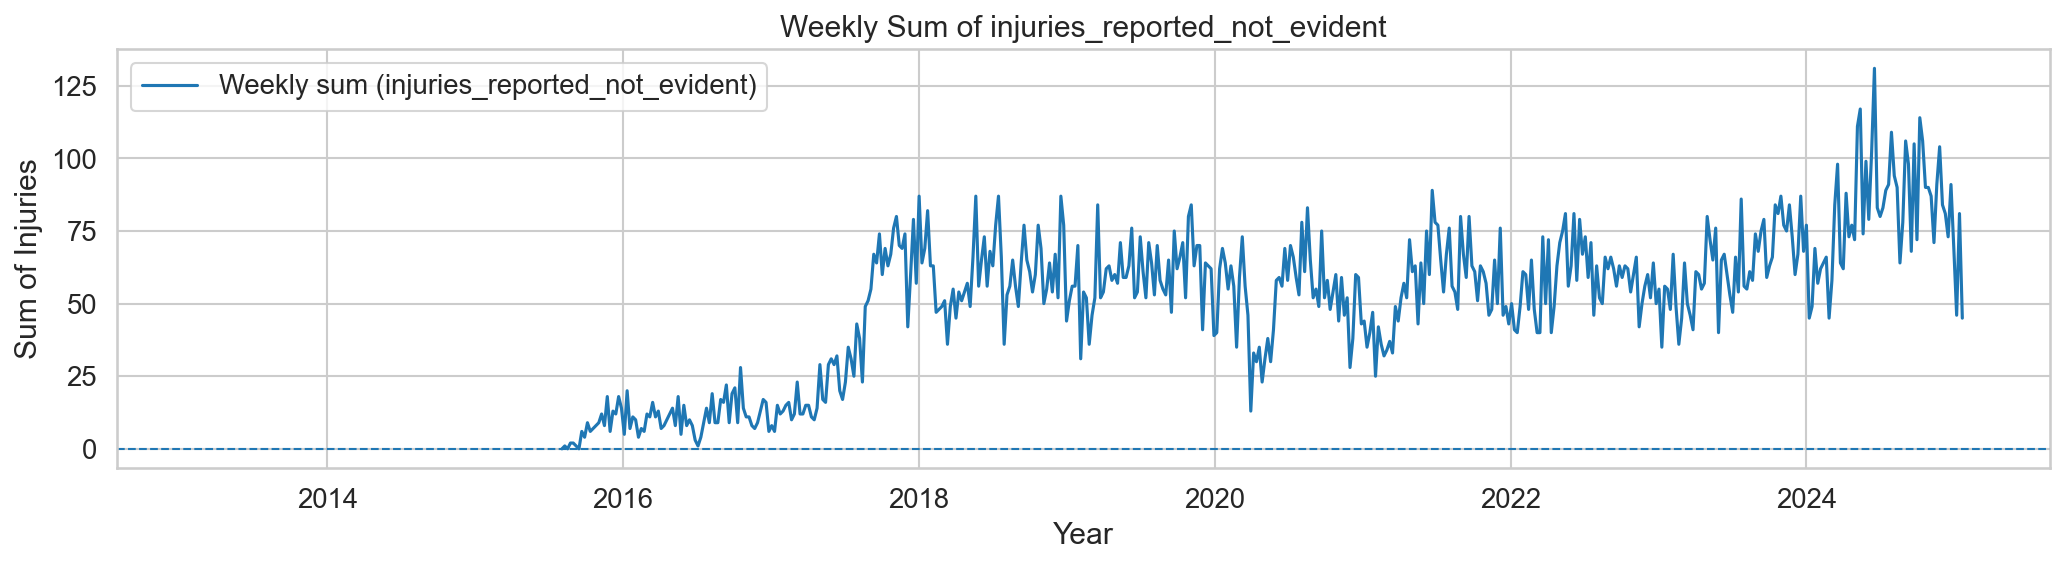

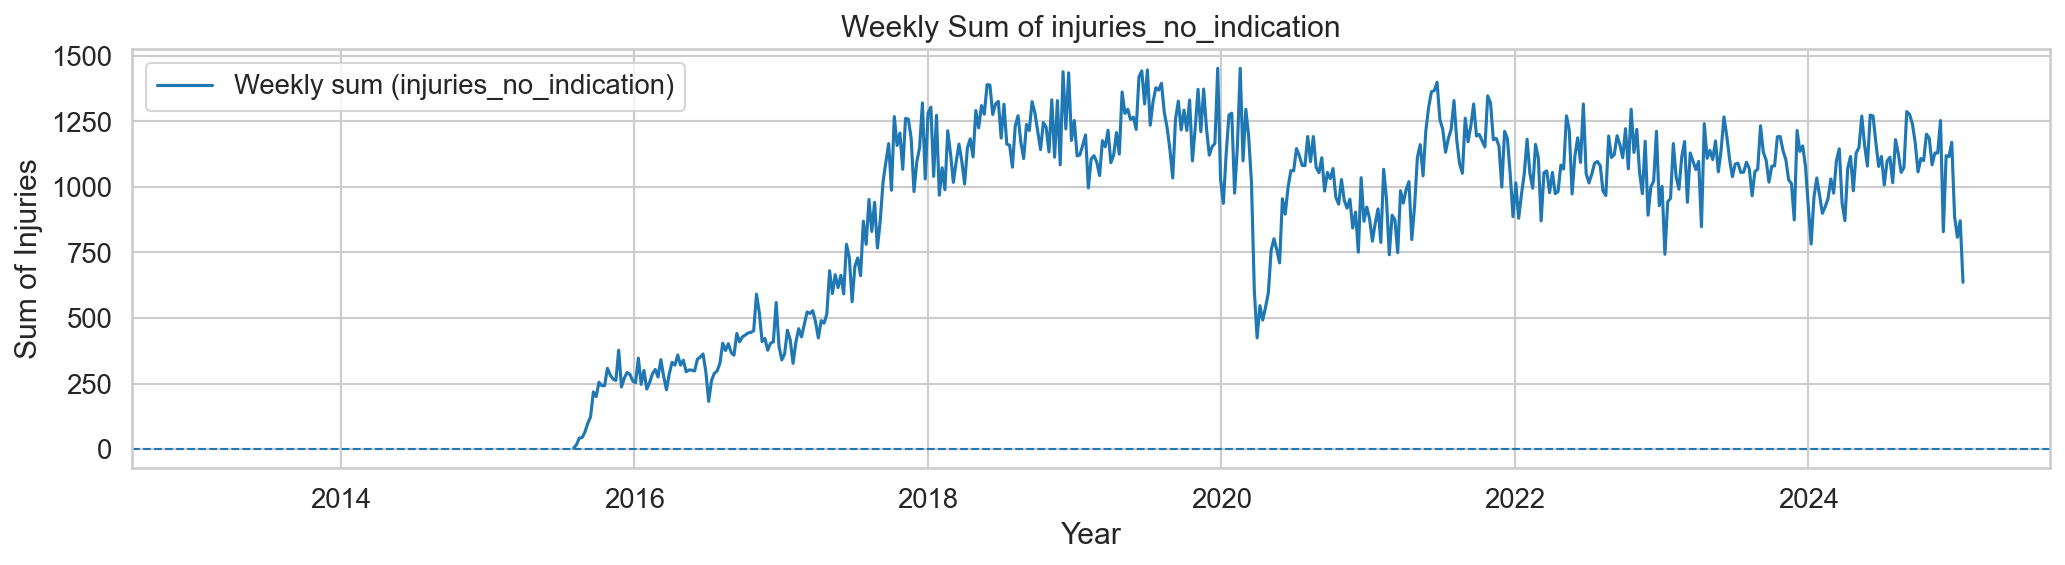

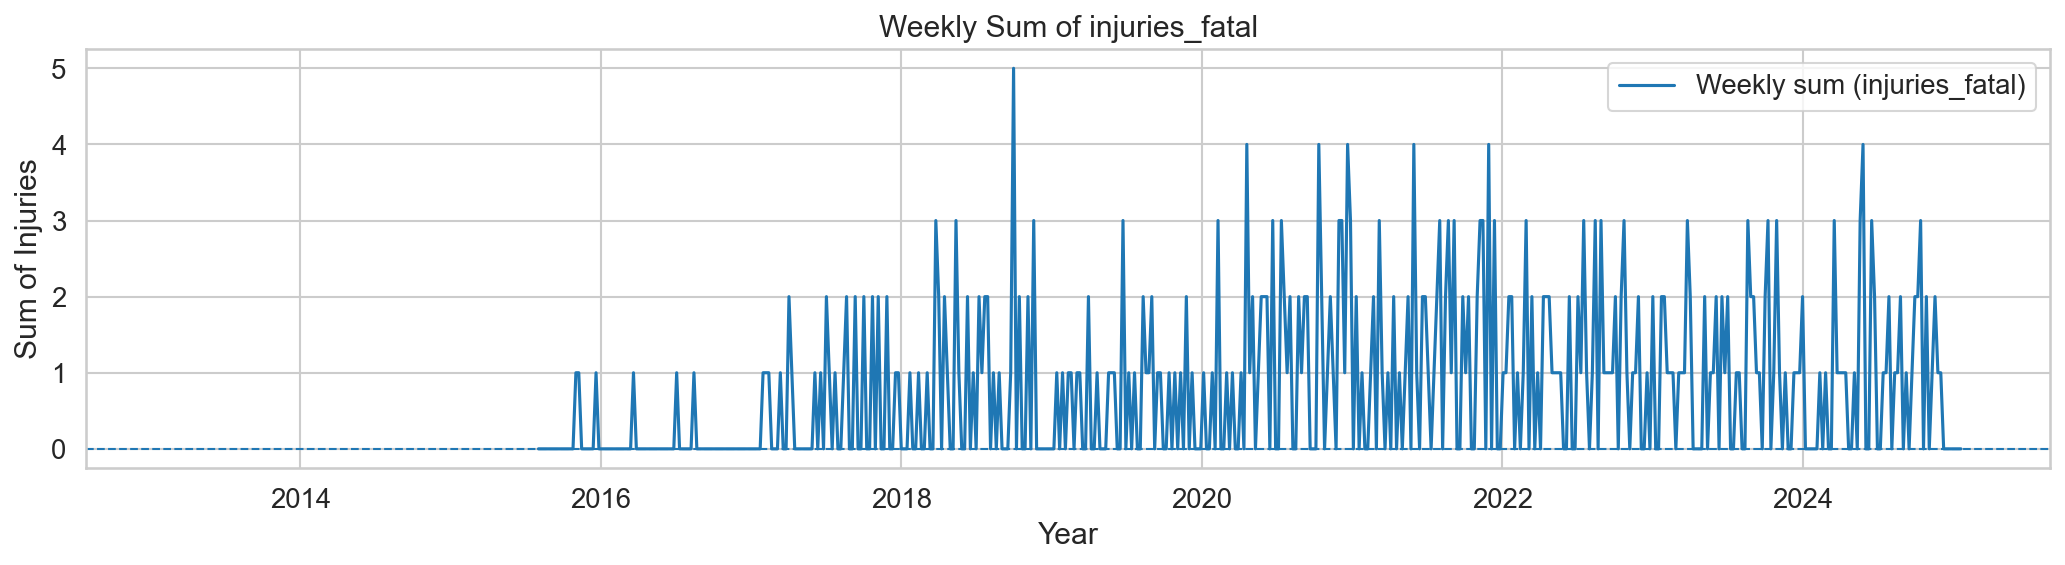

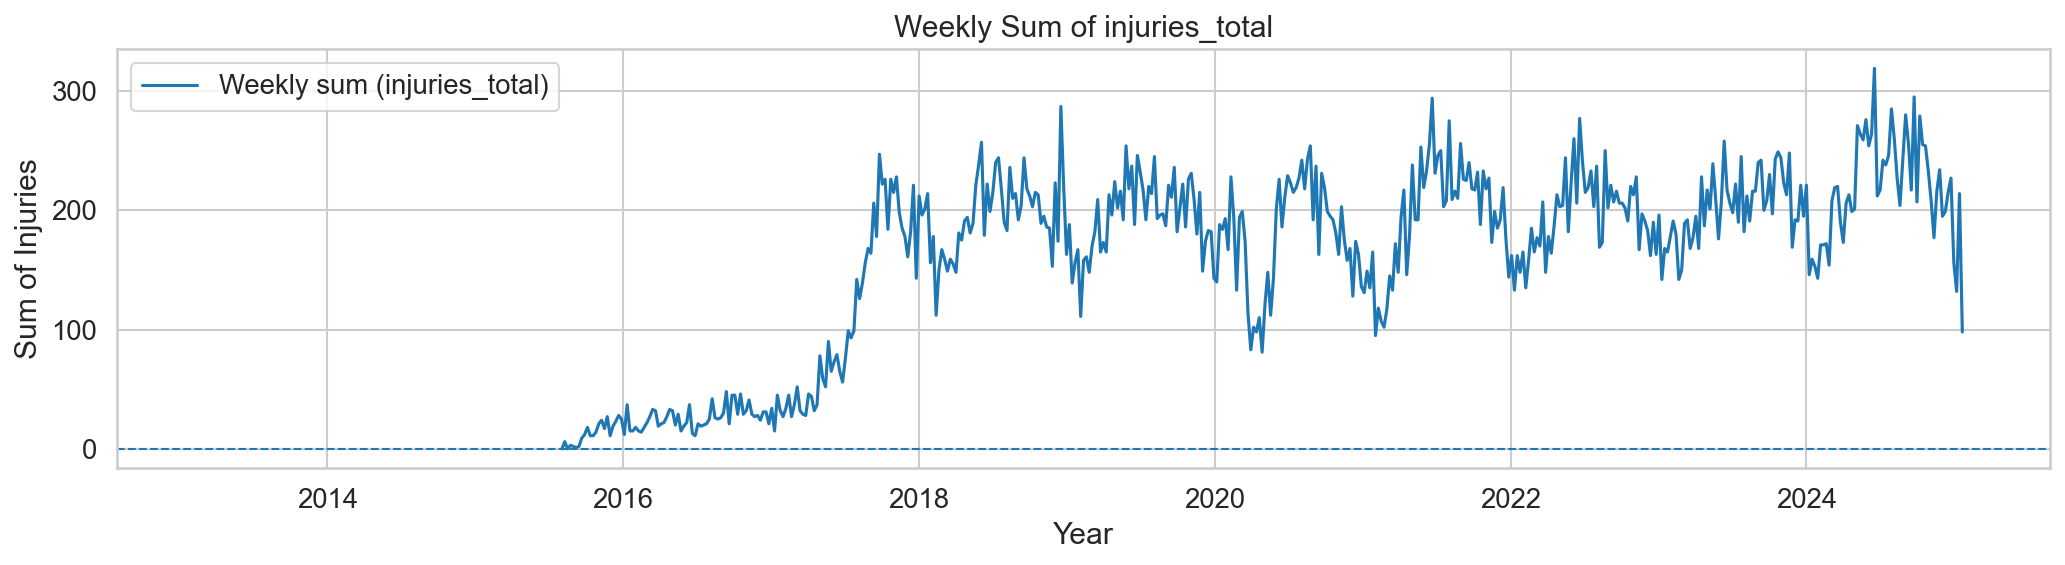

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime
df_plot = df_csv_data.copy()
df_plot["crash_date"] = pd.to_datetime(df_plot["crash_date"])

# Loop through injury columns
for col in col_names:
    if col not in df_plot.columns:
        print(f"Skipping {col}: column not found.")
        continue

    # Resample weekly and sum values
    weekly_sum_col = (
        df_plot.set_index("crash_date")[col]
        .resample("W-MON")
        .sum(min_count=1)  # min_count=1 ensures empty weeks show NaN instead of 0
    )

    # Plot
    plt.figure(figsize=(14, 4))
    plt.plot(weekly_sum_col.index, weekly_sum_col.values, label=f"Weekly sum ({col})")
    plt.axhline(0, linestyle="--", linewidth=1)

    plt.title(f"Weekly Sum of {col}")
    plt.xlabel("Year")
    plt.ylabel("Sum of Injuries")
    plt.legend()
    plt.tight_layout()
    plt.show()


**Cleaning Data**
To clean the data the decision was made to remove all data entries before November of 2017. The reason for that is that there is way more data being sampled after that. The sampling frequency seems inconsistent before and rather consisten after November fo 2017.

In [4]:
# Make a copy and ensure datetime
df_csv_data_cleaned = df_csv_data.copy()
df_csv_data_cleaned["crash_date"] = pd.to_datetime(df_csv_data_cleaned['crash_date'], format='%m/%d/%Y %I:%M:%S %p')

# Remove entries before November 2017
df_csv_data_cleaned = df_csv_data_cleaned[df_csv_data_cleaned["crash_date"] >= "2017-11-01"]

Visualizing removed data.

C:\Users\Tim\AppData\Local\Temp\ipykernel_2136\3734470200.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_plot["crash_date"] = pd.to_datetime(df_plot["crash_date"])


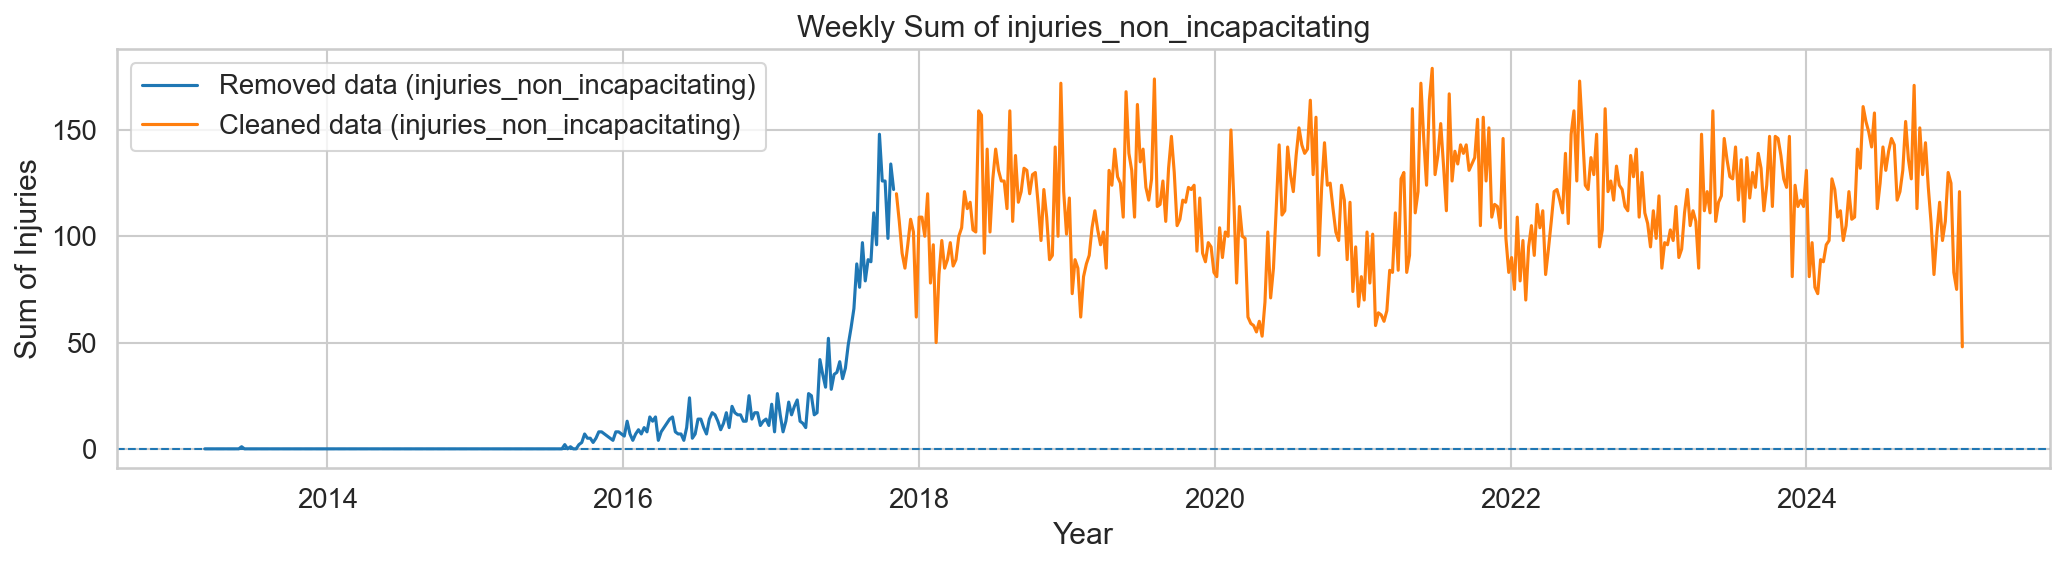

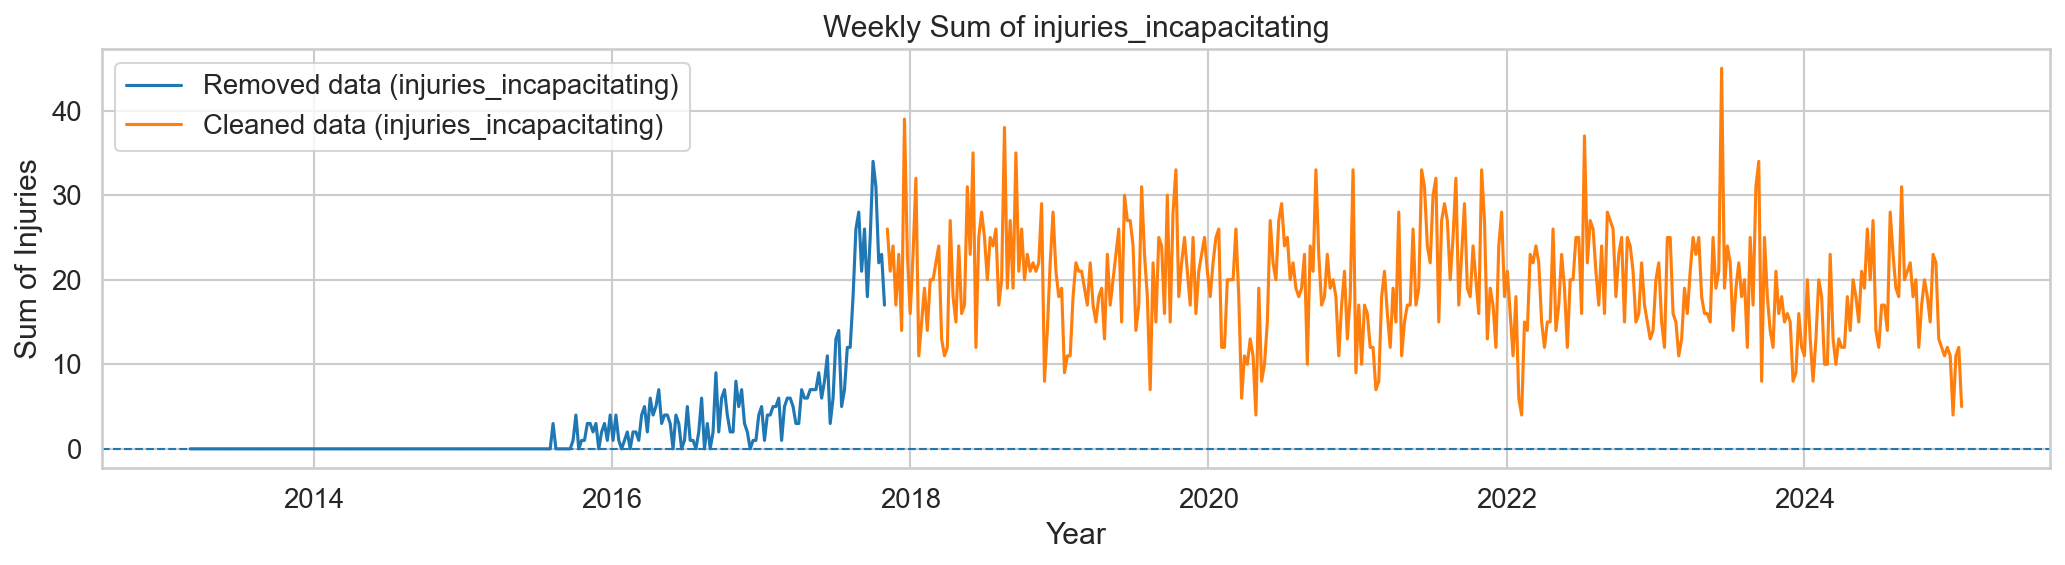

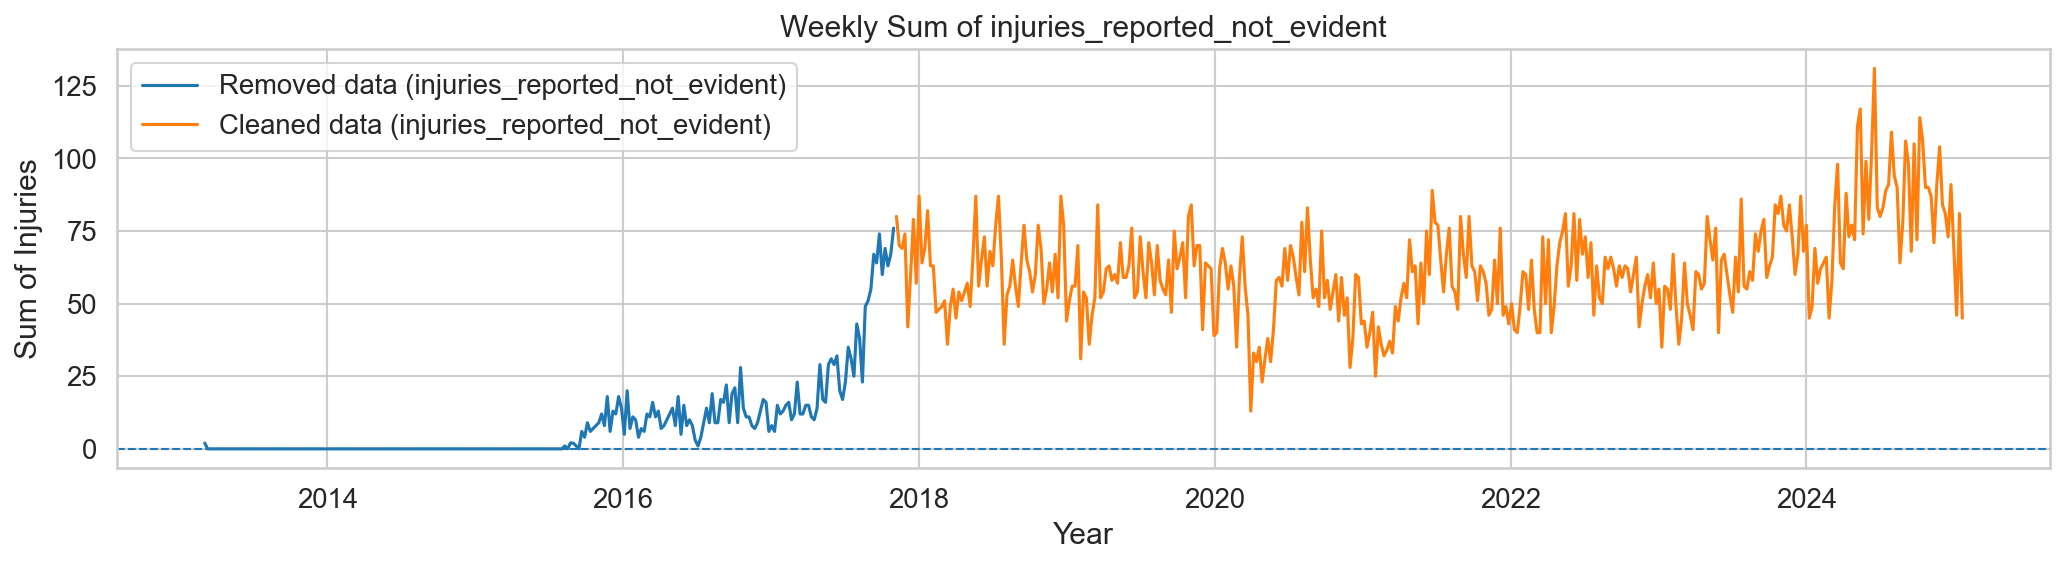

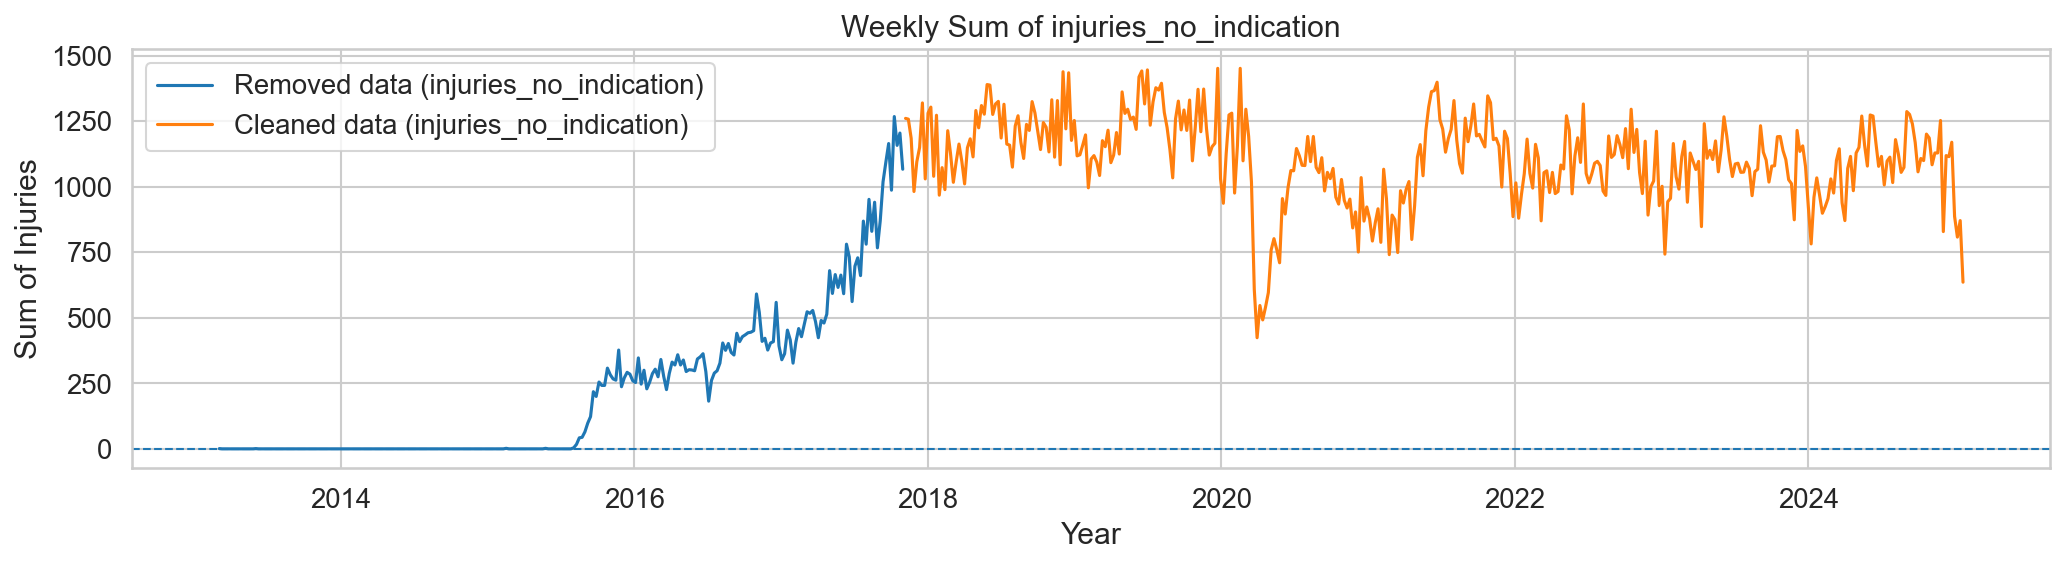

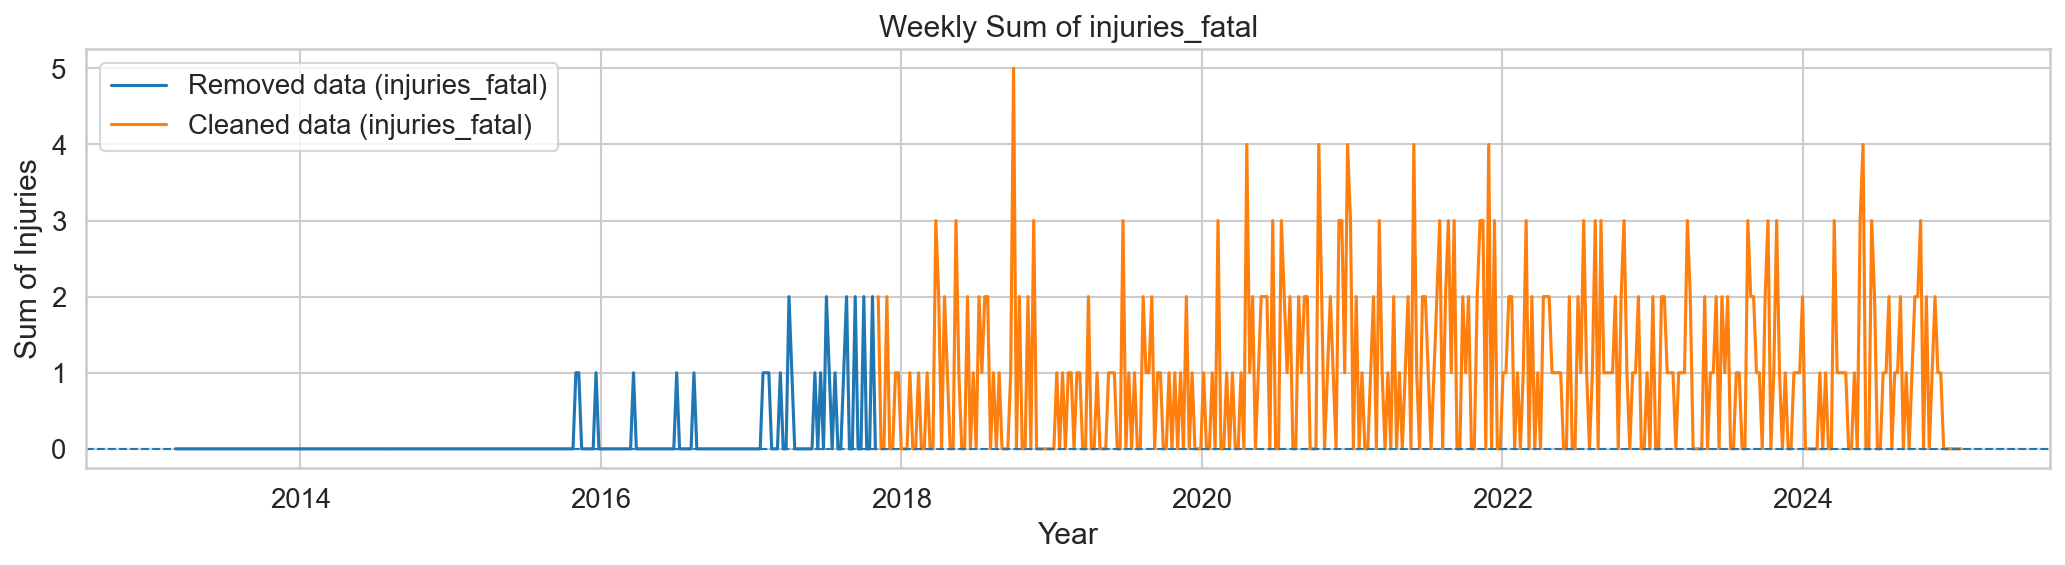

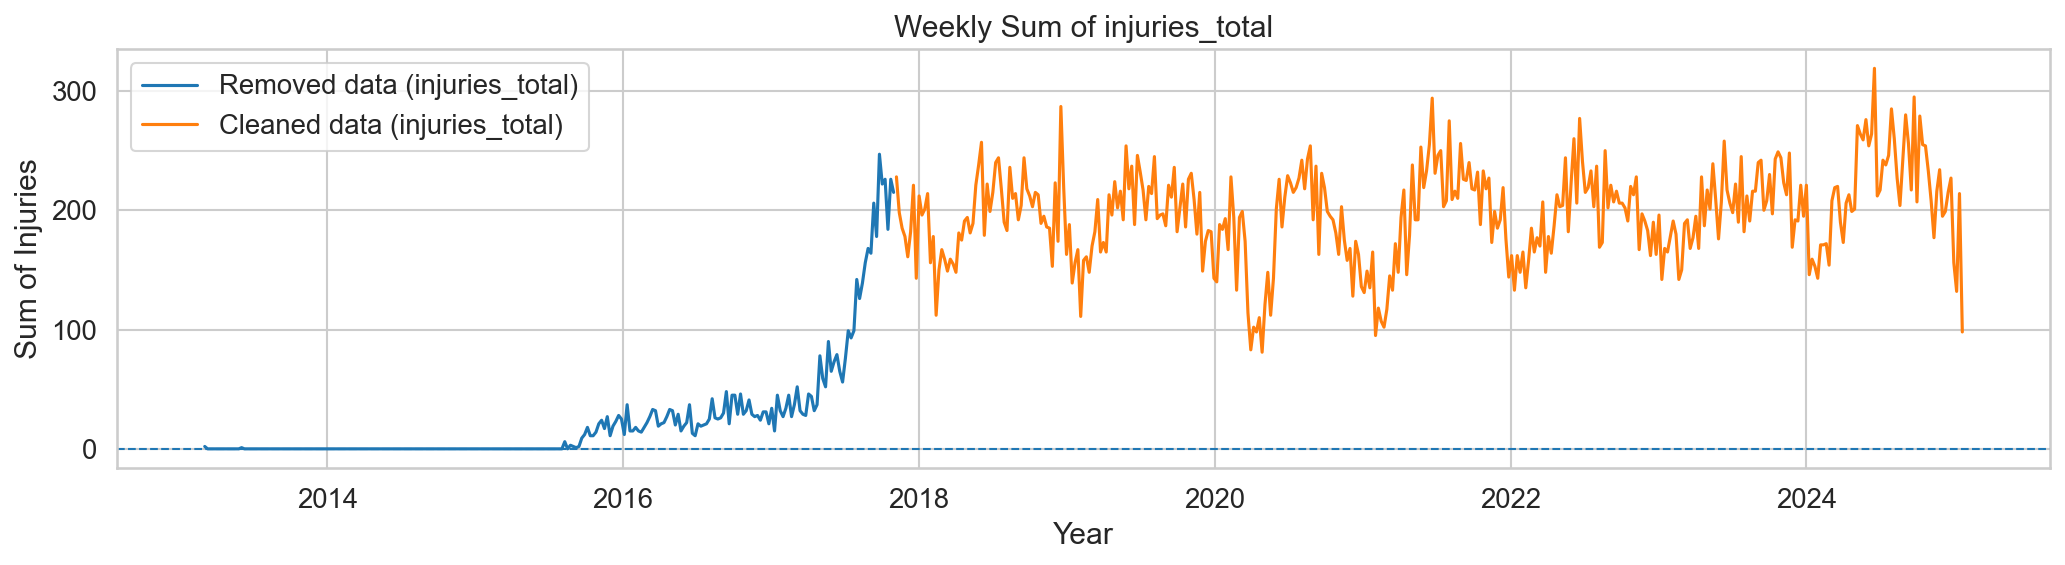

In [ ]:
# Ensure datetime
df_plot = df_csv_data.copy()
df_plot["crash_date"] = pd.to_datetime(df_plot["crash_date"], format='%m/%d/%Y %I:%M:%S %p')
df_cleaned = df_csv_data_cleaned.copy()
df_cleaned["crash_date"] = pd.to_datetime(df_cleaned["crash_date"], format='%m/%d/%Y %I:%M:%S %p')

# Split removed data
df_removed = df_plot[df_plot["crash_date"] < "2017-11-01"]

# Concatenate for consistent weekly resampling
df_combined = pd.concat([df_removed, df_cleaned])

# Loop through injury columns
for col in col_names:
    if col not in df_plot.columns:
        print(f"Skipping {col}: column not found.")
        continue

    # Resample weekly over the full timeline
    weekly_sum = df_combined.set_index("crash_date")[col].resample("W-MON").sum()

    # Separate removed vs cleaned for plotting
    weekly_removed = weekly_sum.loc[weekly_sum.index < "2017-11-01"]
    weekly_cleaned = weekly_sum.loc[weekly_sum.index >= "2017-11-01"]

    # Plot
    plt.figure(figsize=(14, 4))
    plt.plot(weekly_removed.index, weekly_removed.values, label=f"Removed data ({col})")
    plt.plot(weekly_cleaned.index, weekly_cleaned.values, label=f"Cleaned data ({col})")
    plt.axhline(0, linestyle="--", linewidth=1)

    plt.title(f"Weekly Sum of {col}")
    plt.xlabel("Year")
    plt.ylabel("Sum of Injuries")
    plt.legend()
    plt.tight_layout()
    plt.show()


---
## B. Visualization and Exploratory Analysis (55 points)
---
**Assigned to Jeremia**
- Time-series visualizations (raw, smoothed, rolling mean or windowed views) (10 points)
- Distribution analysis with histograms and density style plots where applicable (10 points)
- Correlation analysis and heatmaps (Pearson and at least one alternative such as Spearman,
with short interpretation) (10 points)
- Daily or periodic pattern analysis (day-of-week, hour-of-day, seasonality indicators, or
test-cycle patterns) (15 points)
- Summary of observed patterns as short check statements (similar to True/False style)
with evidence (10 points)

In [6]:
df_b = df_csv_data_cleaned # copy original data
#print(df_b.head())
# Display a Time Series Plot of weekly accidents
df_b.set_index('crash_date', inplace=True)

### Time-series visualization

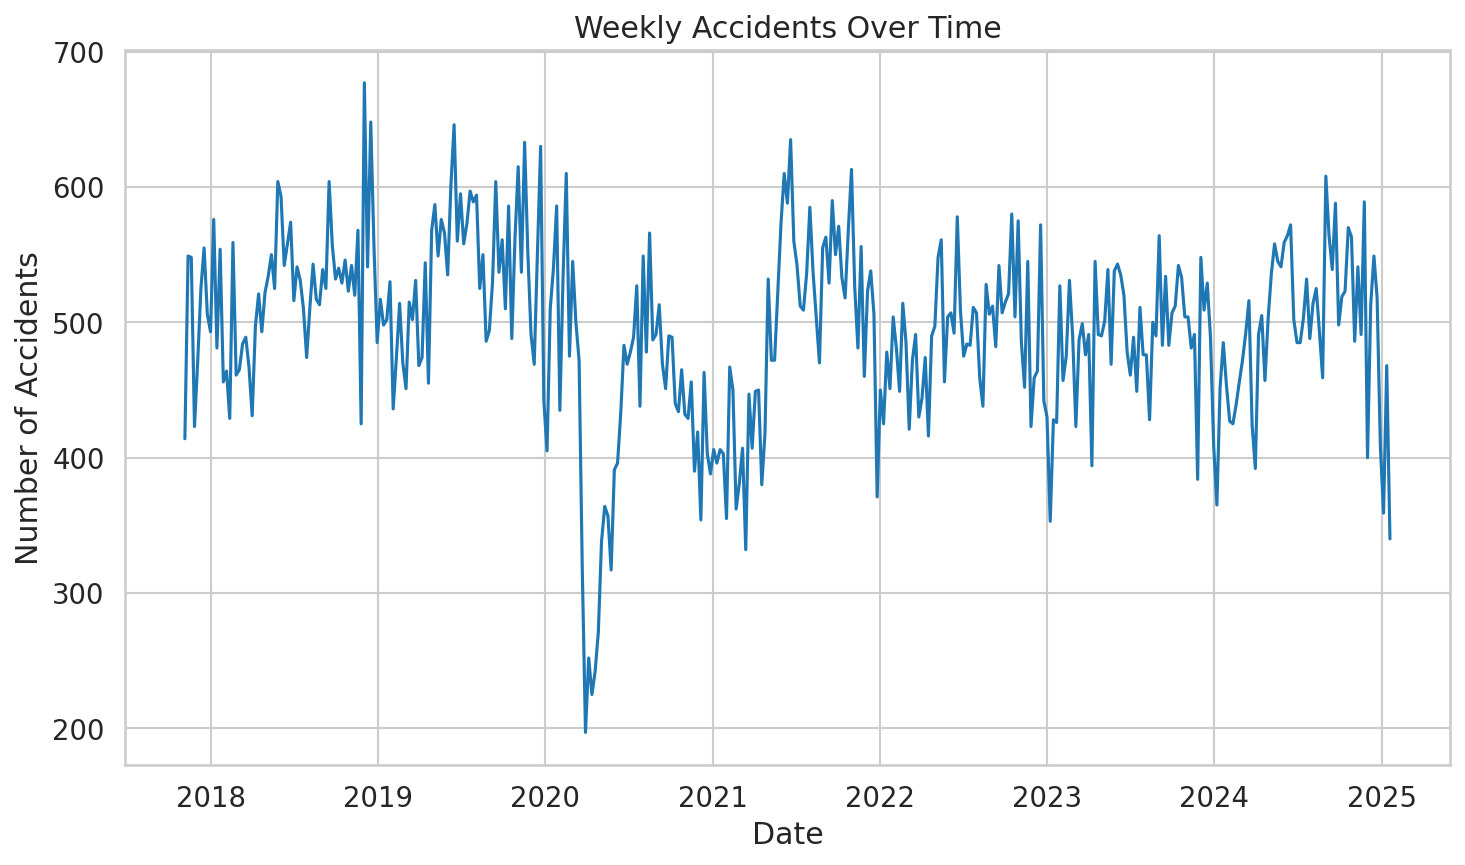

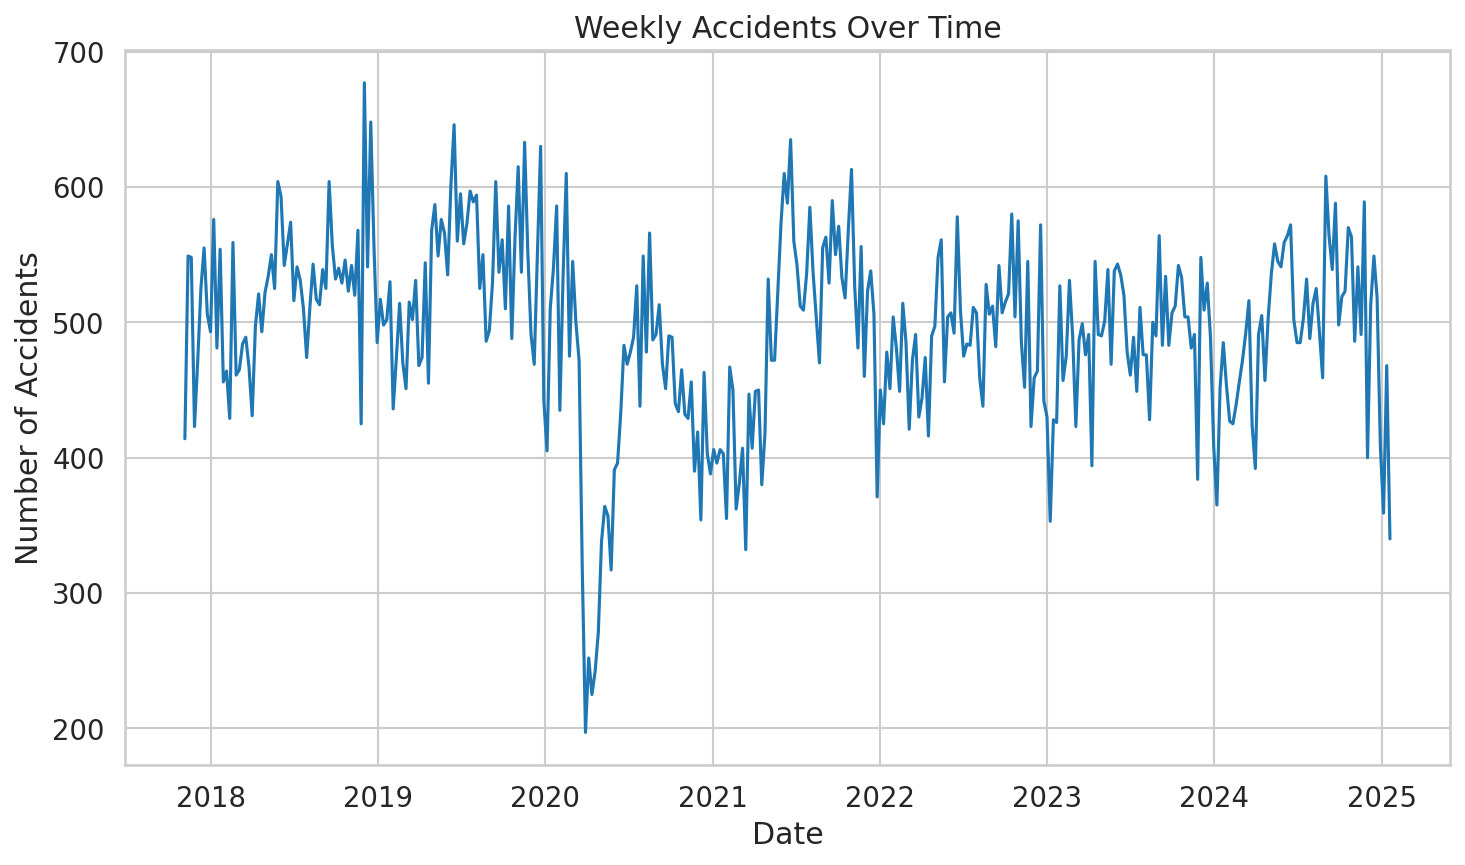

In [33]:

weekly_accidents = df_b.resample('W').size()

plt.figure(figsize=(10, 6))
plt.plot(weekly_accidents.index, weekly_accidents.values, marker='')
plt.title('Weekly Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

### Distribution analysis: histograms and density plots
We focus on smoothed distributions for key numeric fields and normalized comparisons for major categorical factors using `df_b`.

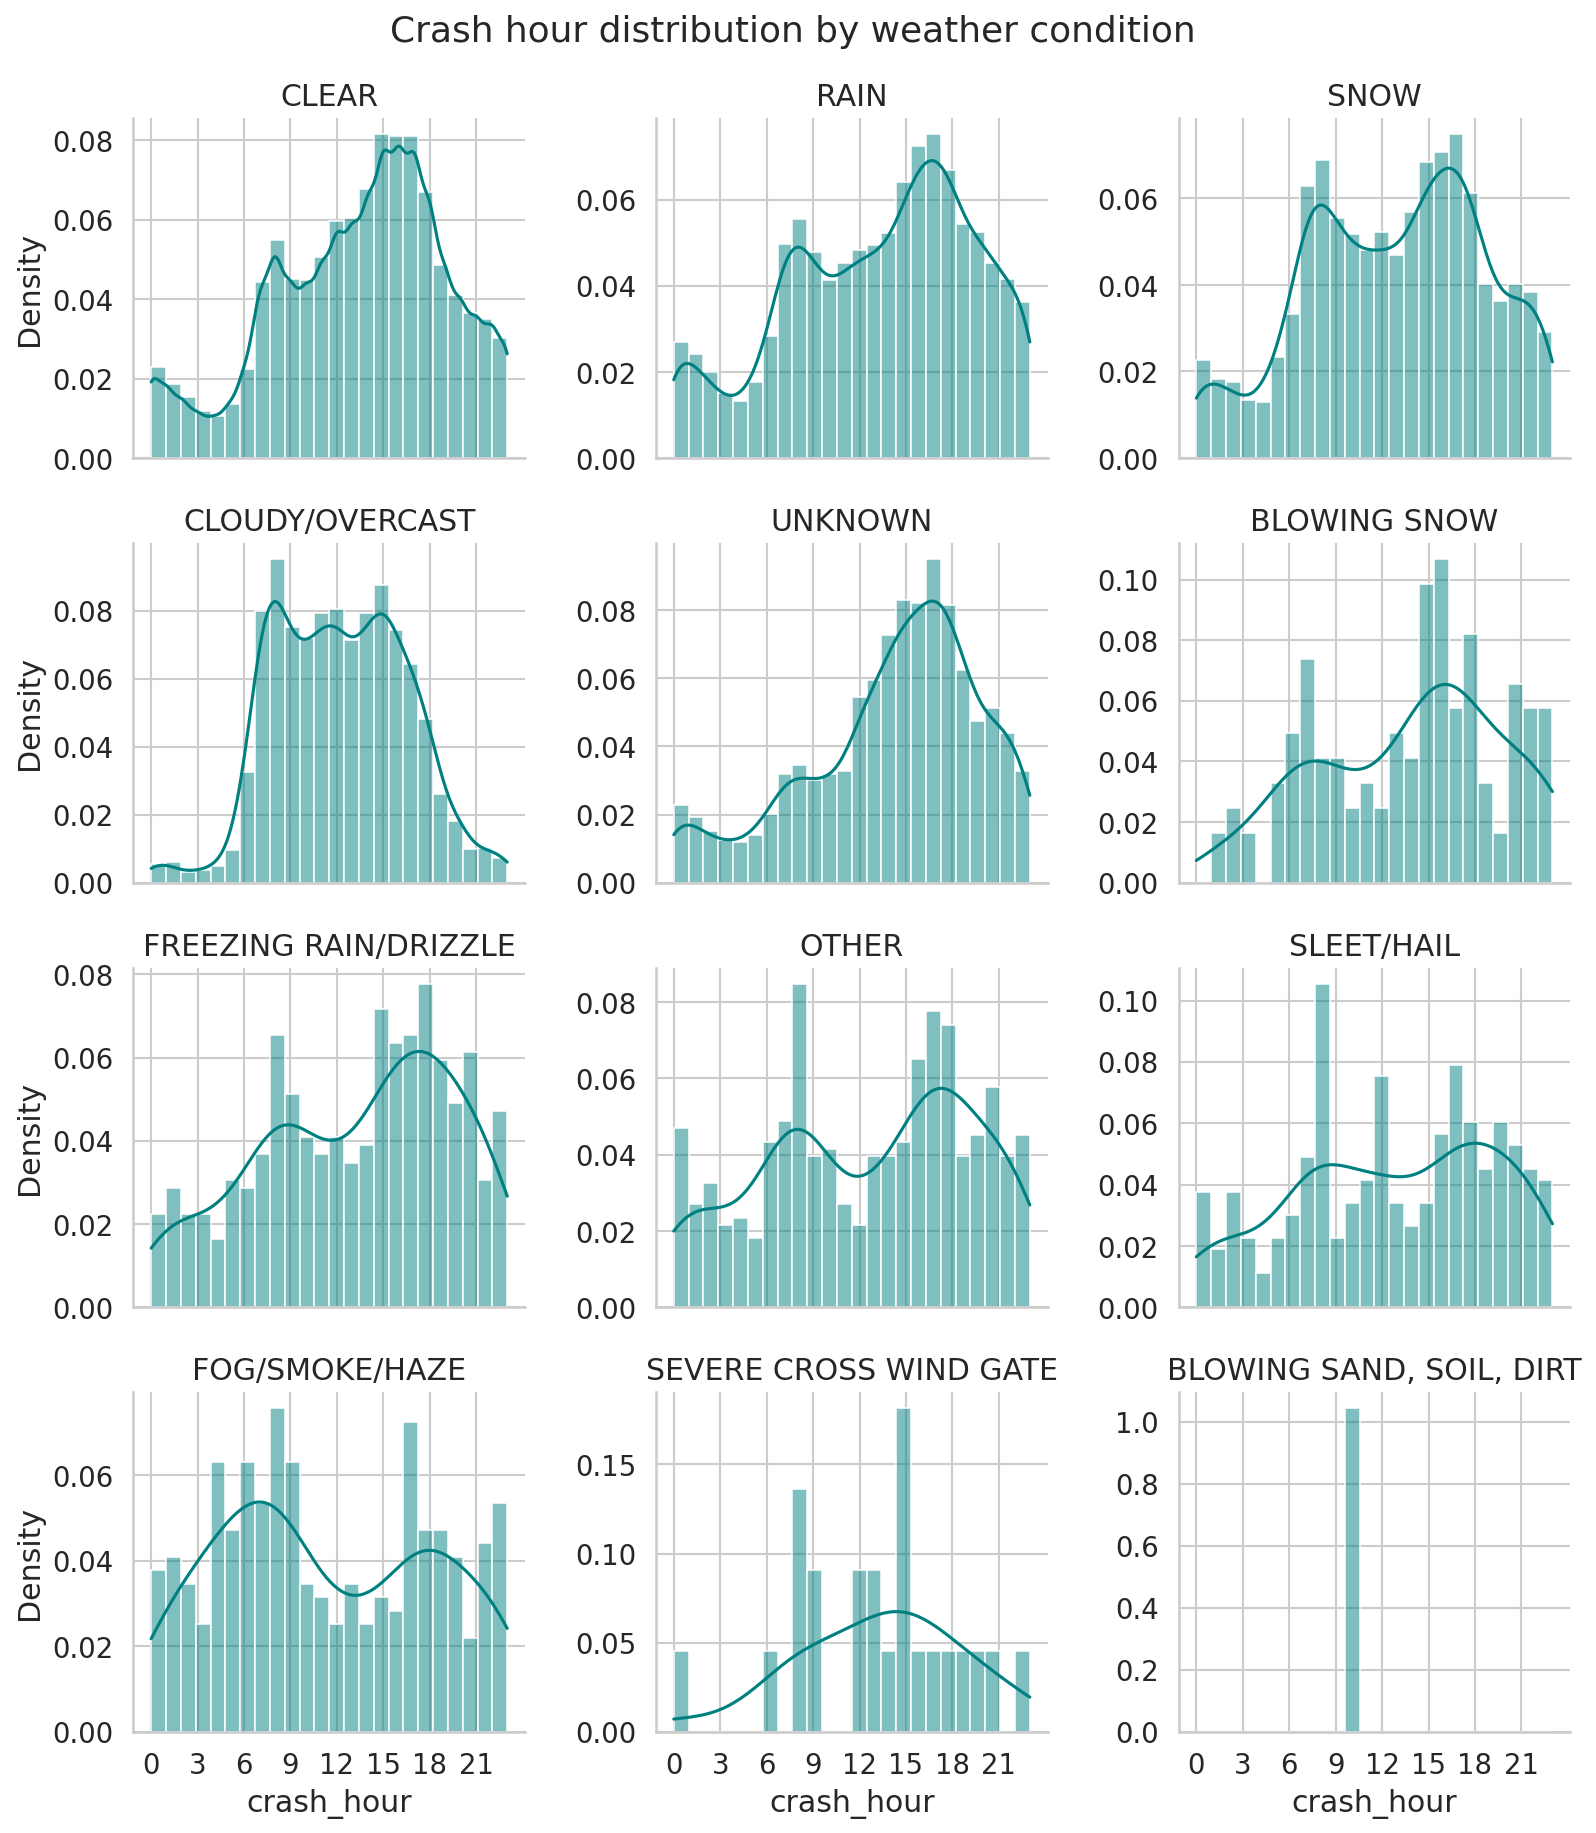

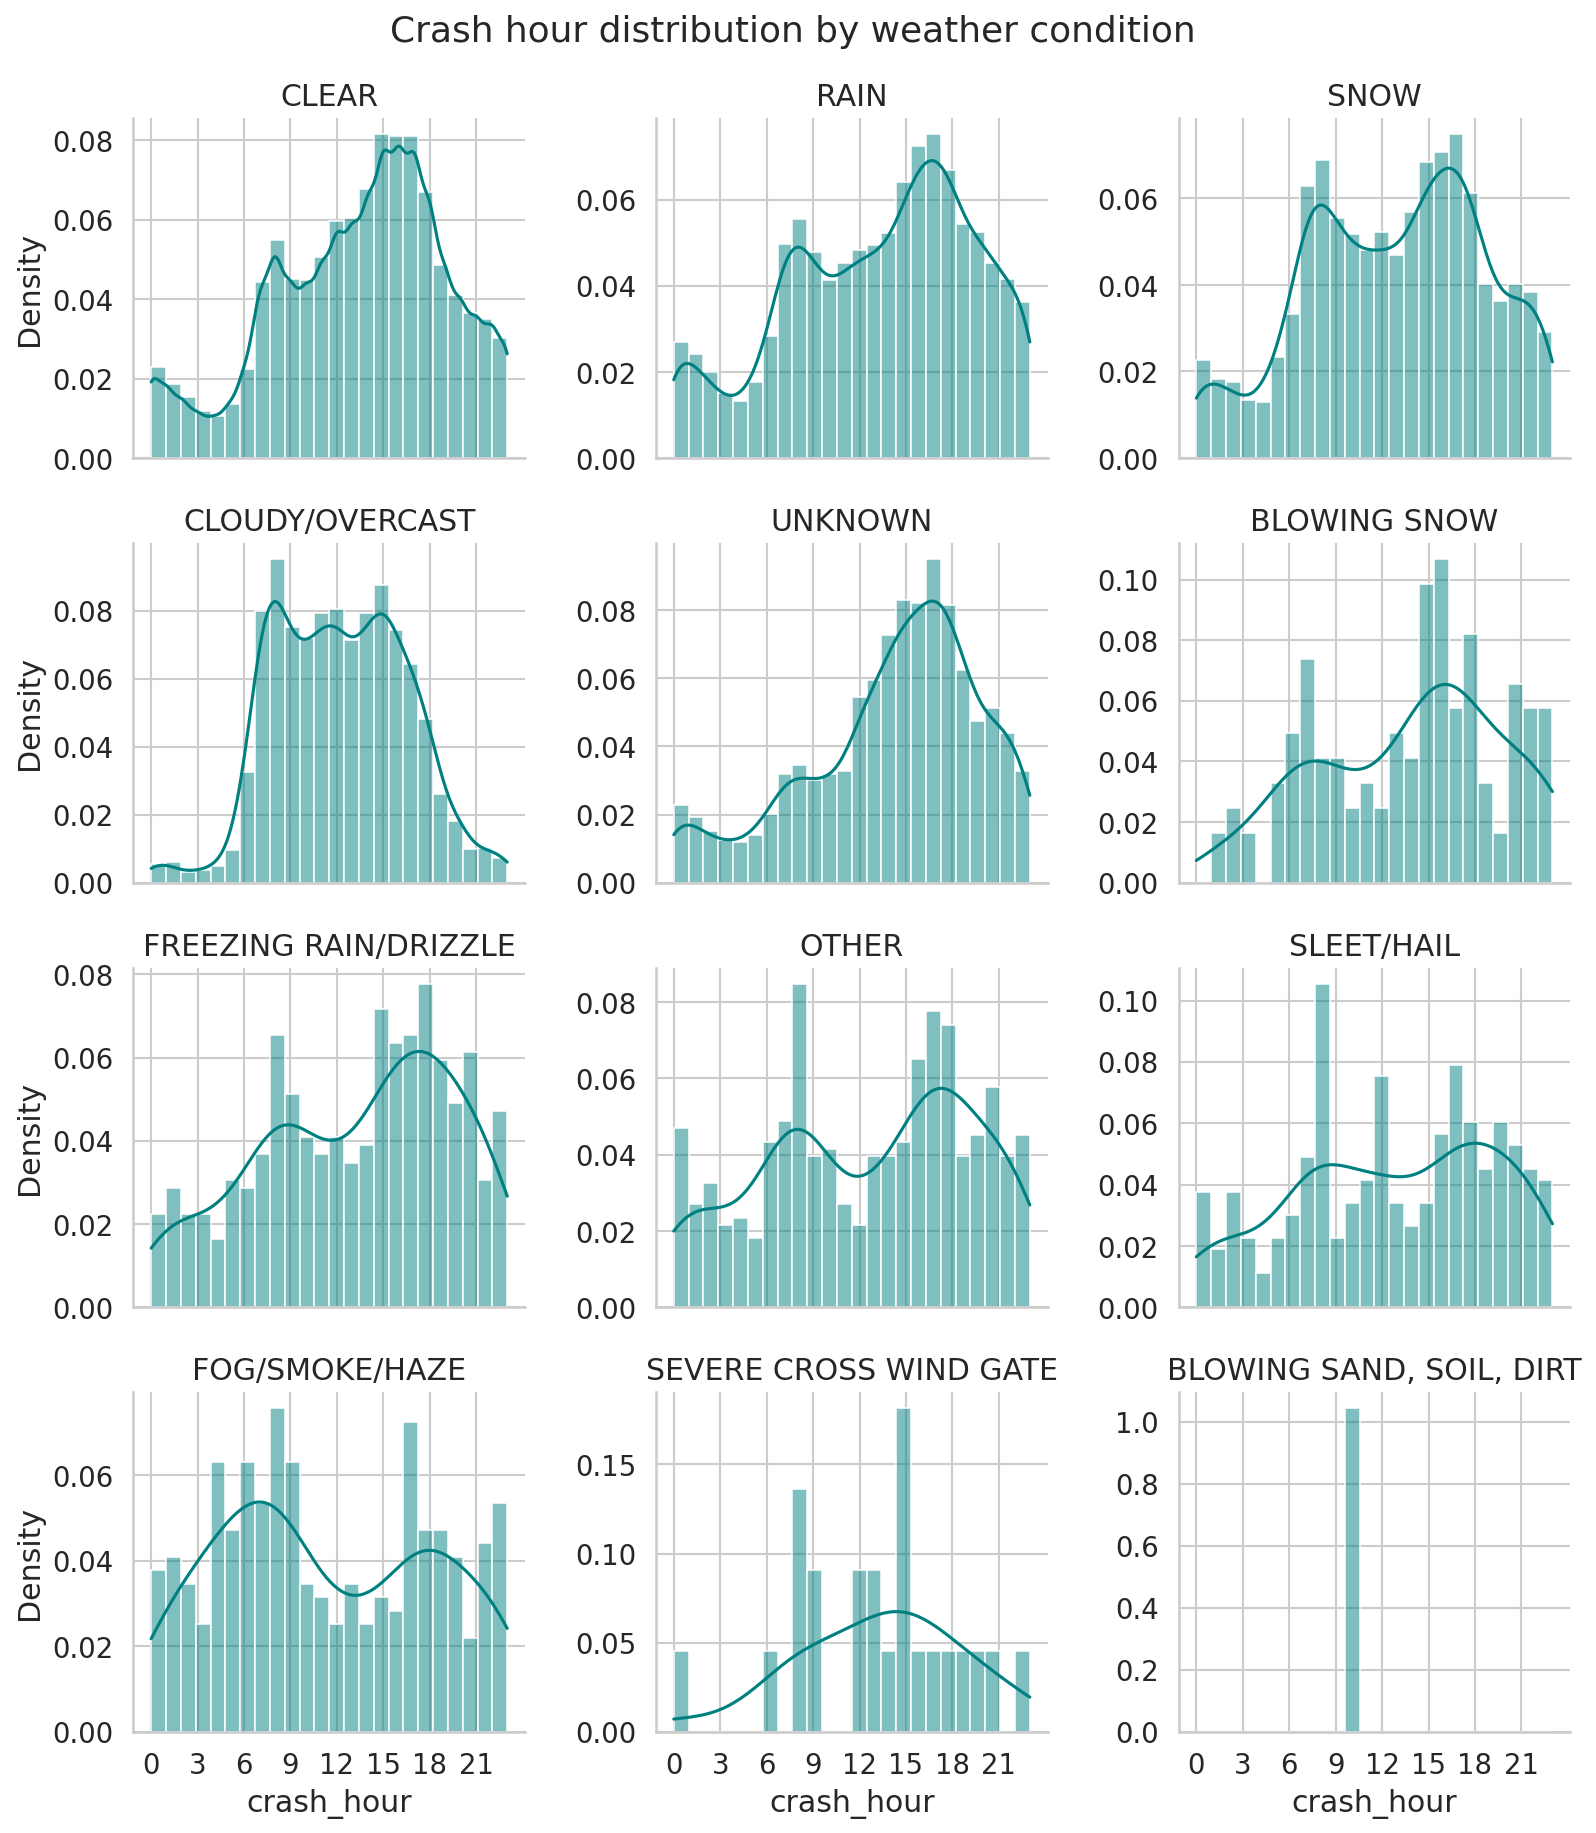

In [34]:
# Crash hour distribution by weather (independent density per weather, unshared y-axis for visibility)
hour_weather = df_b.dropna(subset=["crash_hour", "weather_condition"])

g = sns.displot(
    hour_weather,
    x="crash_hour",
    col="weather_condition",
    col_wrap=3,
    bins=24,
    stat="density",
    kde=True,
    color="teal",
    height=3,
    aspect=1.2,
    common_norm=False,          # normalize densities within each weather facet
    facet_kws={"sharey": False} # allow y-axis to scale per facet so curves are visible
)

# Set x-axis grid/ticks every 3 hours and update titles for all facets
for ax in g.axes.flatten():
    ax.set_xticks(np.arange(0, 24, 3))
    ax.grid(True, axis="x")
    # Update title to show only the weather condition value
    title = ax.get_title()
    if "=" in title:
        ax.set_title(title.split("=")[1].strip())

plt.suptitle("Crash hour distribution by weather condition", y=1.02)
plt.show()

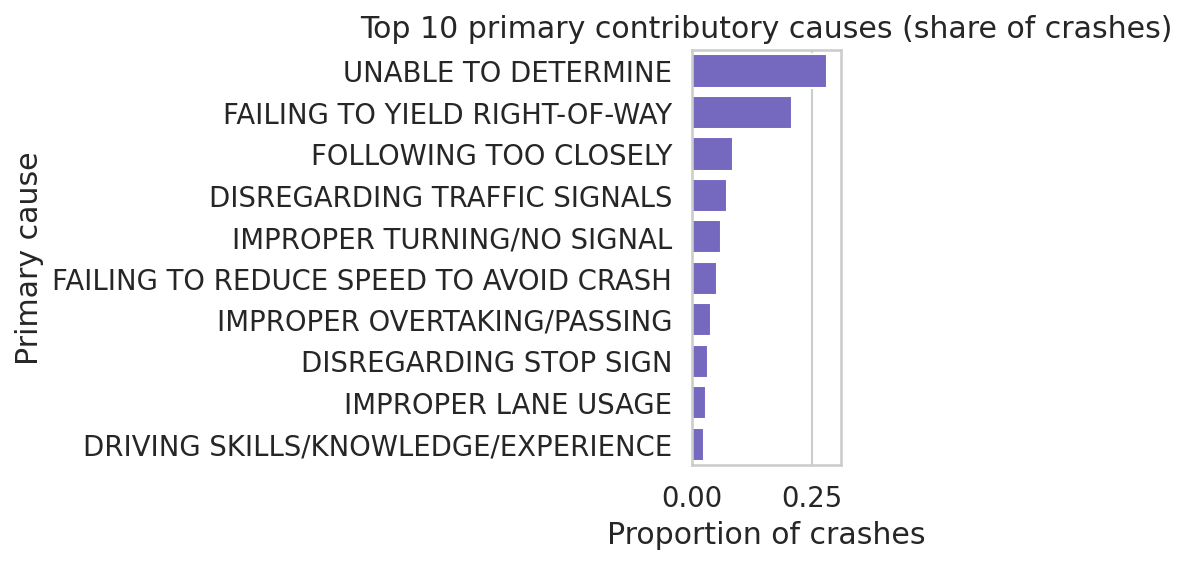

In [36]:
# Top contributory causes (proportions) to highlight dominant categories
cause_counts = df_b["prim_contributory_cause"].value_counts(normalize=True).head(10)

sns.barplot(
    x=cause_counts.values,
    y=cause_counts.index,
    orient="h",
    color="slateblue"
)
plt.title("Top 10 primary contributory causes (share of crashes)")
plt.xlabel("Proportion of crashes")
plt.ylabel("Primary cause")
plt.xlim(0, cause_counts.values.max() * 1.1)
plt.show()

### Histogram of total injuries by crash hour
Aggregated injuries per hour of day using `df_b` (weights capture total injuries, not just crash counts).

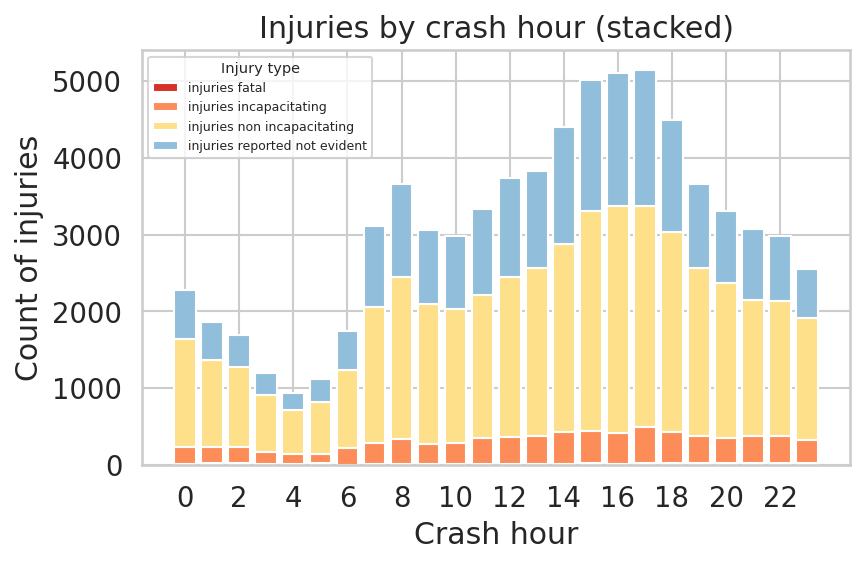

In [43]:
# Stacked barplot of injury types by crash hour
injury_cols = [
    "injuries_fatal",
    "injuries_incapacitating",
    "injuries_non_incapacitating",
    "injuries_reported_not_evident",
]

hour_inj = df_b.dropna(subset=["crash_hour"] + injury_cols)
hour_inj_sum = (
    hour_inj.groupby("crash_hour")[injury_cols]
    .sum()
    .reindex(range(24), fill_value=0)
)

bottom = np.zeros(24)
hours = hour_inj_sum.index
colors = ["#d73027", "#fc8d59", "#fee08b", "#91bfdb"]

plt.figure()
for col, color in zip(injury_cols, colors):
    plt.bar(
        hours,
        hour_inj_sum[col],
        bottom=bottom,
        label=col.replace("_", " "),
        color=color,
        edgecolor="white"
    )
    bottom += hour_inj_sum[col].values

plt.title("Injuries by crash hour (stacked)")
plt.xlabel("Crash hour")
plt.ylabel("Count of injuries")
plt.xticks(range(0, 24, 2))
plt.grid(True, axis="x")
plt.legend(title="Injury type", fontsize=6, title_fontsize=7)
plt.show()

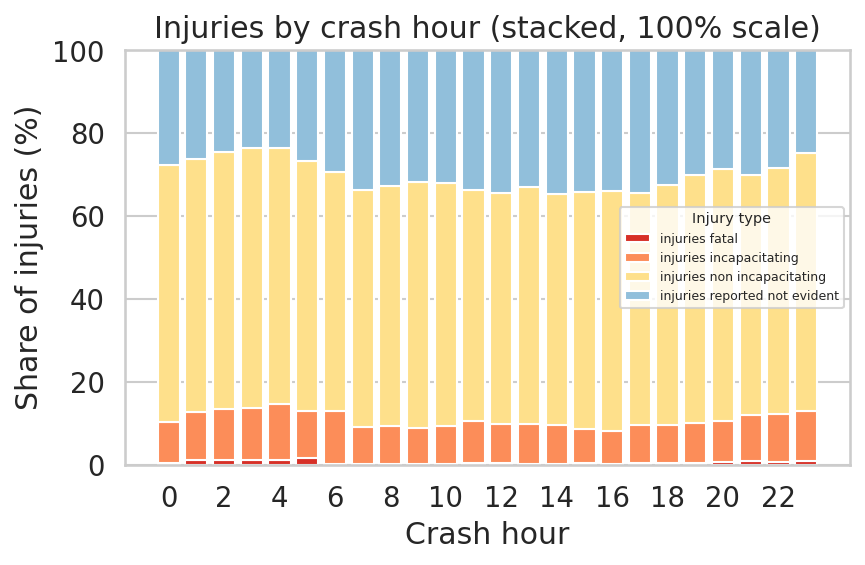

In [44]:
# Normalize injury counts per hour to percentages and plot stacked bars (100% total per hour)
hour_inj_pct = hour_inj_sum.div(hour_inj_sum.sum(axis=1), axis=0).fillna(0) * 100

bottom_pct = np.zeros(len(hours))
plt.figure()
for col, color in zip(injury_cols, colors):
    plt.bar(
        hour_inj_pct.index,
        hour_inj_pct[col],
        bottom=bottom_pct,
        label=col.replace("_", " "),
        color=color,
        edgecolor="white"
    )
    bottom_pct += hour_inj_pct[col].values

plt.title("Injuries by crash hour (stacked, 100% scale)")
plt.xlabel("Crash hour")
plt.ylabel("Share of injuries (%)")
plt.ylim(0, 100)
plt.xticks(range(0, 24, 2))
plt.grid(True, axis="x")
plt.legend(title="Injury type", fontsize=6, title_fontsize=7)
plt.show()

### Correlation analysis (Pearson & Spearman)
We focus on numeric crash/injury metrics where correlation is meaningful; both Pearson (linear) and Spearman (rank/monotonic) are shown.

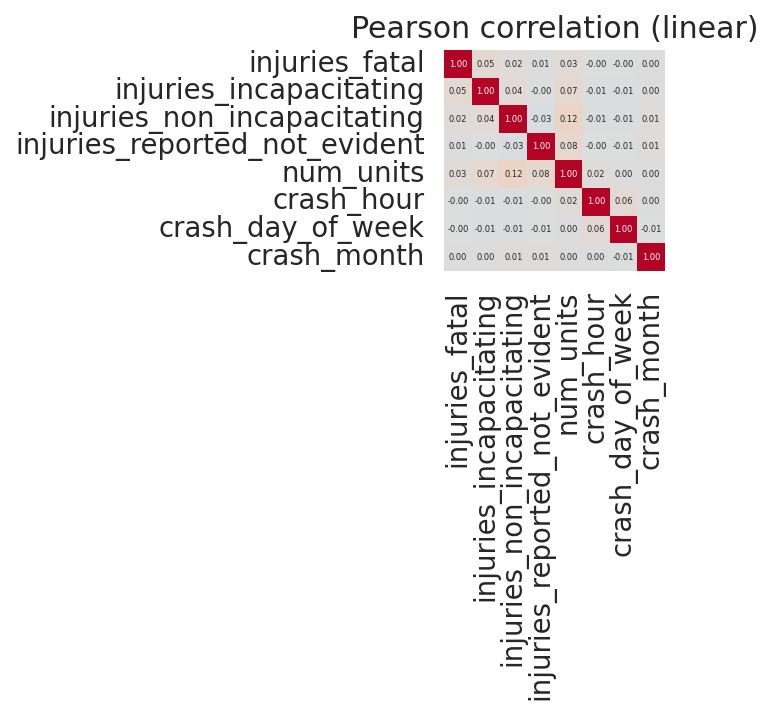

In [41]:
# Pearson correlation heatmap (linear relationships)
num_cols = [
    "injuries_fatal",
    "injuries_incapacitating",
    "injuries_non_incapacitating",
    "injuries_reported_not_evident",
    "num_units",
    "crash_hour",
    "crash_day_of_week",
    "crash_month",
]

corr_df = df_b.reset_index()[num_cols].dropna()
corr_p = corr_df.corr(method="pearson")

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_p,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    cbar=False,
    annot_kws={"size": 4}
)
plt.title("Pearson correlation (linear)")
plt.tight_layout()
plt.show()

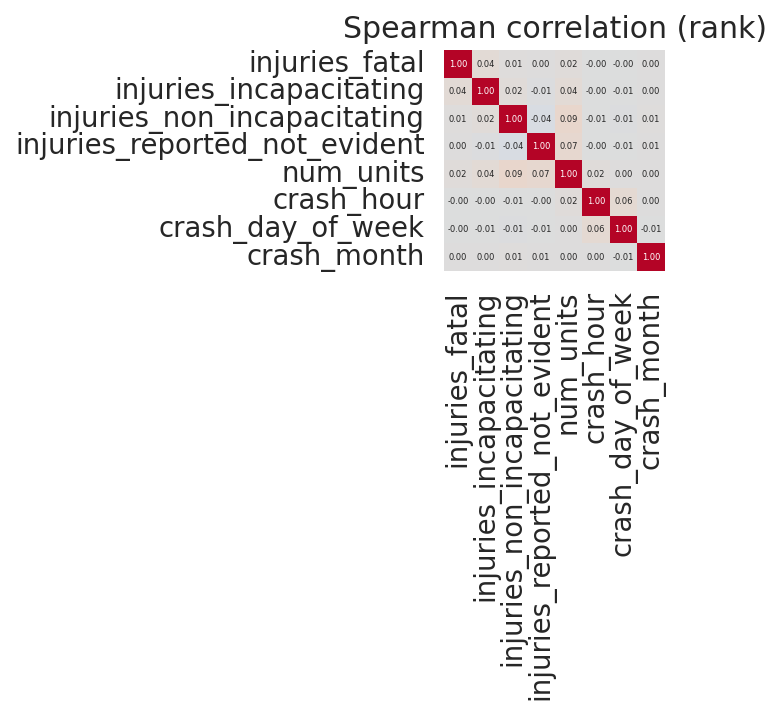

In [42]:
# Spearman correlation heatmap (rank/monotonic relationships)
corr_s = corr_df.corr(method="spearman")

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_s,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    cbar=False,
    annot_kws={"size": 4}
)
plt.title("Spearman correlation (rank)")
plt.tight_layout()
plt.show()

### Seasonality by week of year
Mean crashes per ISO week (across years) with variability to highlight weekly seasonality.

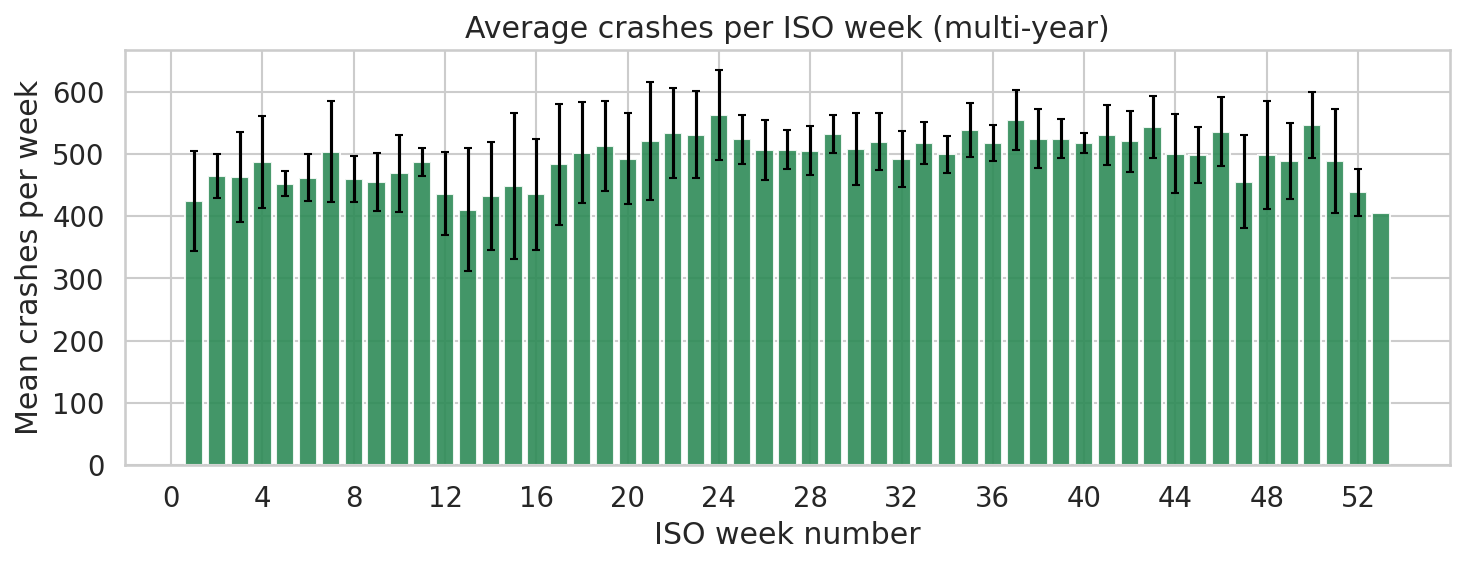

In [40]:
# Weekly seasonality across years (mean crashes per ISO week with variability)
# Ensure datetime index
if not np.issubdtype(df_b.index.dtype, np.datetime64):
    df_b = df_b.copy()
    df_b.index = pd.to_datetime(df_b.index)

weekly_counts = df_b.resample("W").size()
iso_week = weekly_counts.index.isocalendar().week
weekly_stats = weekly_counts.groupby(iso_week).agg(["mean", "std"])

weeks = sorted(weekly_stats.index)
mean_vals_w = weekly_stats.loc[weeks, "mean"]
std_vals_w = weekly_stats.loc[weeks, "std"]

plt.figure(figsize=(10, 4))
plt.bar(weeks, mean_vals_w, yerr=std_vals_w, color="seagreen", edgecolor="white", alpha=0.9, capsize=2)
plt.xticks(range(0, 53, 4))
plt.title("Average crashes per ISO week (multi-year)")
plt.xlabel("ISO week number")
plt.ylabel("Mean crashes per week")
plt.tight_layout()
plt.show()

### Seasonality by month
Crashes aggregated across multiple years to reveal month-of-year patterns (mean monthly crashes with variability).

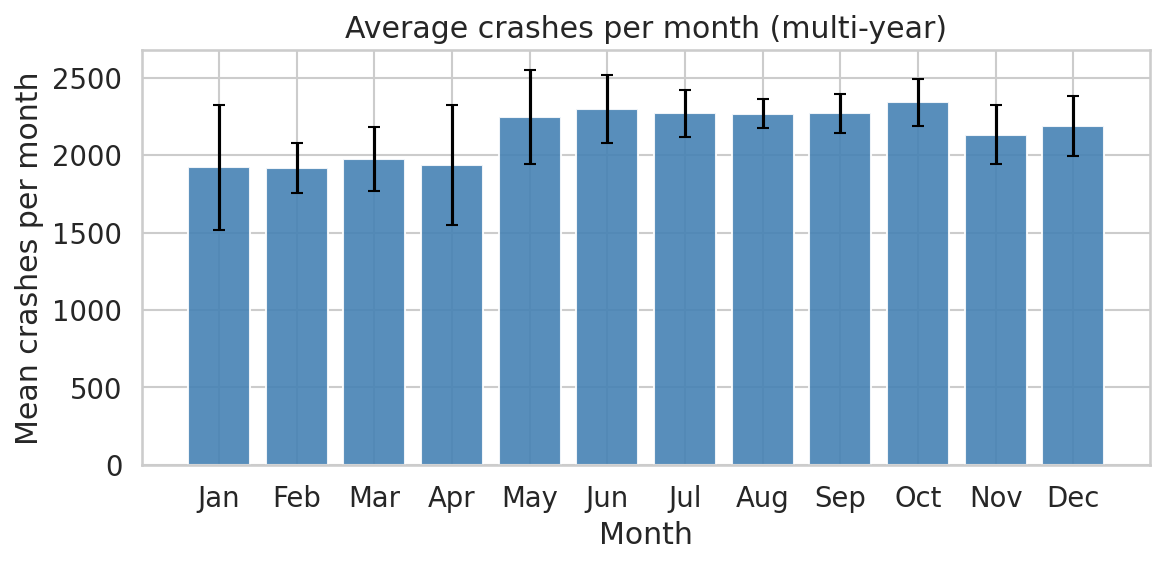

In [32]:
# Monthly seasonality across years (mean crashes per month with variability)
import calendar

# Ensure datetime index
if not np.issubdtype(df_b.index.dtype, np.datetime64):
    df_b = df_b.copy()
    df_b.index = pd.to_datetime(df_b.index)

monthly_counts = df_b.resample("ME").size()
monthly_stats = monthly_counts.groupby(monthly_counts.index.month).agg(["mean", "std"])

months = range(1, 13)
mean_vals = monthly_stats["mean"].reindex(months)
std_vals = monthly_stats["std"].reindex(months)

plt.figure(figsize=(8, 4))
plt.bar(months, mean_vals, yerr=std_vals, color="steelblue", edgecolor="white", alpha=0.9, capsize=3)
plt.xticks(months, [calendar.month_abbr[m] for m in months], rotation=0)
plt.title("Average crashes per month (multi-year)")
plt.xlabel("Month")
plt.ylabel("Mean crashes per month")
plt.tight_layout()
plt.show()

### Summary
- Crash hour distribution differs by weather condition.
- The top cause is "failing to yield right-of-way"
- The Rushhours have peaks in crashes. At 7-8 h and 15-17 h
- Fatal and incapacitating injuries are relatively more in night time.
- The numerical columns don't correlate.
- In the Chrisms holydays the number of accidents is reduced.

---
## C. Probability and Event Analysis (45 points)
---
**Assigned to Tim**
- Threshold-based probability estimation for events (define event, justify threshold, compute
empirical probability) (15 points)
- Cross tabulation analysis for two variables (10 points)
- Conditional probability analysis (at least two meaningful conditional relationships) (15
points)
- Summary of observations and limitations (what could bias these estimates, what assump-
tions were made) (5 points)

#### Threshold-based probability estimation

In [ ]:
# Important Notes:
# purely Data-Driven
# Depends on Size of data, Observation period Data quality

# Event 1: Late hour Crash (between 20:00 and 5:00)
# Relevance: Poor visibility, fatigue, alcohol...
# Thresholds: typical night hours. 
late_hour_event = (
    (df_csv_data_cleaned["crash_hour"] >= 20) |
    (df_csv_data_cleaned["crash_hour"] <= 5)
)

num_late_hour_crashes = late_hour_event.sum()
total_crashes = len(df_csv_data_cleaned)

empirical_probability_late_hour = num_late_hour_crashes / total_crashes
print(f"Empirical Probability Event 1 (Late Hour Crash): {empirical_probability_late_hour:.3%}")

# Event 2: Rush-hour crash (7:00-9:00 and 16:00-18:00)
# Relevance: High traffic density, frequent stop-and-go driving, time pressure and stress
# Thresholds: standard commuting periods
rush_hour_event = (
    ((df_csv_data_cleaned["crash_hour"] >= 7) & (df_csv_data_cleaned["crash_hour"] <= 9)) |
    ((df_csv_data_cleaned["crash_hour"] >= 16) & (df_csv_data_cleaned["crash_hour"] <= 18))
)

num_rush_hour_crashes = rush_hour_event.sum()
total_crashes = len(df_csv_data_cleaned)

empirical_probability_rush_hour = num_rush_hour_crashes / total_crashes
print(f"Empirical Probability Event 2 (Rush Hour Crash): {empirical_probability_rush_hour:.3%}")

# Event 3: Severe crash
# Relevance: fatalities, or life-altering injuries requiring intensive medical care
# Trhesholds: greater than one injury, focus on severity rather than frequency, avoids dilution by
# minor or non-injury crashes
severe_crash_event = (
    (df_csv_data_cleaned["injuries_fatal"] >= 1) |
    (df_csv_data_cleaned["injuries_incapacitating"] >= 1)
)

num_severe_crashes = severe_crash_event.sum()
total_crashes = len(df_csv_data_cleaned)

empirical_probability_severe = num_severe_crashes / total_crashes

print(
    f"Empirical Probability Event 3 (Severe Crash): "
    f"{empirical_probability_severe:.3%}"
)

# Event 4: Non Severe crash
# Relevance: Most of the Accidents are non severe crashes with no major injuries
non_severe_crash_event = (
    (df_csv_data_cleaned["injuries_fatal"] == 0) &
    (df_csv_data_cleaned["injuries_incapacitating"] == 0)
)

num_non_severe_crashes = non_severe_crash_event.sum()
total_crashes = len(df_csv_data_cleaned)

empirical_probability_non_severe = num_non_severe_crashes / total_crashes

print(
    f"Empirical Probability Event 4 (Non-Severe Crash): "
    f"{empirical_probability_non_severe:.3%}"
)

# Since this is the complement of the severe crash event, the added Probability should be 1
print(
    f"Empirical Probability Non-Severe Crash + Severe Crash: "
    f"{empirical_probability_non_severe + empirical_probability_severe:.3%}"
)

# Event 5: Rainy weather crash
# Relevance: Rain and freezing rain: reduce visability, decrease tire-road friction, increase
# braking distances
# Threshold: Freezing rain is grouped with rain, since both involve liquid precipation effecting the
# surface friction
rainy_weather_event = df_csv_data_cleaned["weather_condition"].isin([
    "RAIN",
    "FREEZING RAIN/DRIZZLE"
])

num_rainy_weather_crashes = rainy_weather_event.sum()
total_crashes = len(df_csv_data_cleaned)

empirical_probability_rainy_weather = num_rainy_weather_crashes / total_crashes

print(
    f"Empirical Probability Event 5 (Rainy Weather Crash): "
    f"{empirical_probability_rainy_weather:.3%}"
)

# Event 6: Snowy weather crash
# Relevance: Severly reduced friction, impair vehicle control, may obscure lane markings and ohter
# vehicles
# Threshold: Snow-related categories are grouped due to similar driving hazards
snowy_weather_event = df_csv_data_cleaned["weather_condition"].isin([
    "SNOW",
    "BLOWING SNOW"
])

num_snowy_weather_crashes = snowy_weather_event.sum()
total_crashes = len(df_csv_data_cleaned)

empirical_probability_snowy_weather = num_snowy_weather_crashes / total_crashes

print(
    f"Empirical Probability Event 6 (Snowy Weather Crash): "
    f"{empirical_probability_snowy_weather:.3%}"
)


# Event 7: Poor visibility weather crash
# Relevance: these conditions reduce a driver's ability to: -detect hazards, -judge distance and
# speed, -react in time
# Threshold: Only conditions with direct visibility impairment are included, Categories are chosen
# conservatively to avoid overgeneralization
poor_visibility_event = df_csv_data_cleaned["weather_condition"].isin([
    "FOG/SMOKE/HAZE",
    "SLEET/HAIL",
    "BLOWING SNOW",
    "BLOWING SAND, SOIL, DIRT"
])

num_poor_visibility_crashes = poor_visibility_event.sum()
total_crashes = len(df_csv_data_cleaned)

empirical_probability_poor_visibility = num_poor_visibility_crashes / total_crashes

print(
    f"Empirical Probability Event 7 (Poor Visibility Weather Crash): "
    f"{empirical_probability_poor_visibility:.3%}"
)

# Event 8: Clear
# Relevance: Baseline driving environment, minimal weather-related visual impairment.
# Threshold: Cloudy/overcast conditions usually do not reduce visibility significantly, provides a
# meaningful contrast to poor visibility events
clear_weather_event = df_csv_data_cleaned["weather_condition"].isin([
    "CLEAR",
    "CLOUDY/OVERCAST"
])

num_clear_weather_crashes = clear_weather_event.sum()
total_crashes = len(df_csv_data_cleaned)

empirical_probability_clear_weather = num_clear_weather_crashes / total_crashes

print(
    f"Empirical Probability Event 8 (Clear Weather Crash): "
    f"{empirical_probability_clear_weather:.3%}"
)

Empirical Probability Event 1 (Late Hour Crash): 22.856%
Empirical Probability Event 2 (Rush Hour Crash): 35.926%
Empirical Probability Event 3 (Severe Crash): 3.397%
Empirical Probability Event 4 (Non-Severe Crash): 96.603%
Empirical Probability Non-Severe Crash + Severe Crash: 100.000%
Empirical Probability Event 5 (Rainy Weather Crash): 10.532%
Empirical Probability Event 6 (Snowy Weather Crash): 3.552%
Empirical Probability Event 7 (Poor Visibility Weather Crash): 0.394%
Empirical Probability Event 8 (Clear Weather Crash): 82.141%


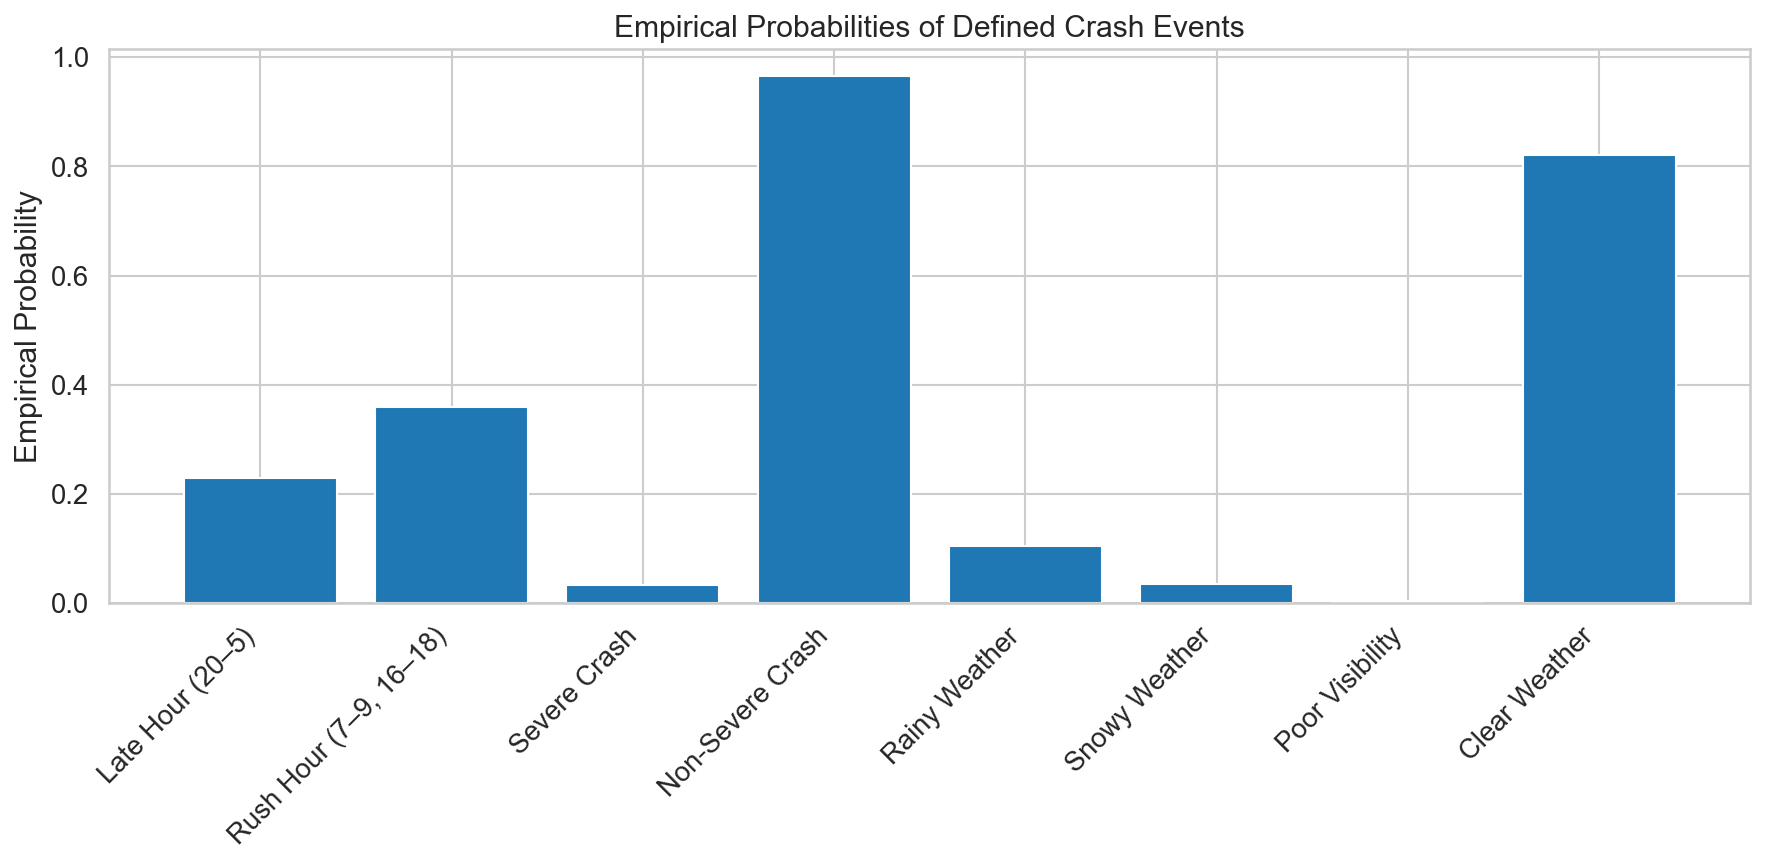

In [53]:
# Visualization

# Bar Plot
event_probabilities = pd.DataFrame({
    "Event": [
        "Late Hour (20–5)",
        "Rush Hour (7–9, 16–18)",
        "Severe Crash",
        "Non-Severe Crash",
        "Rainy Weather",
        "Snowy Weather",
        "Poor Visibility",
        "Clear Weather"
    ],
    "Probability": [
        empirical_probability_late_hour,
        empirical_probability_rush_hour,
        empirical_probability_severe,
        empirical_probability_non_severe,
        empirical_probability_rainy_weather,
        empirical_probability_snowy_weather,
        empirical_probability_poor_visibility,
        empirical_probability_clear_weather
    ]
})

plt.figure(figsize=(12, 6))
plt.bar(event_probabilities["Event"], event_probabilities["Probability"])
plt.ylabel("Empirical Probability")
plt.title("Empirical Probabilities of Defined Crash Events")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Cross tabulation analysis

Cross Tabulation: Late-Hour Crash vs Severe Crash
Severe Crash      False  True 
Late Hour Crash               
False            139608   4344
True              40655   1994


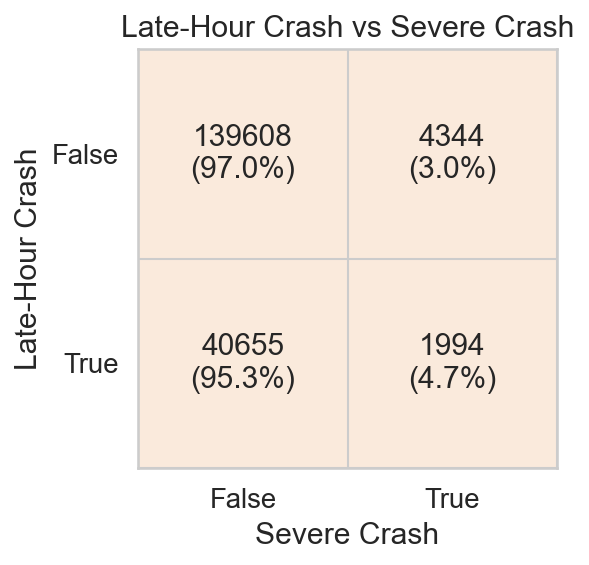


Cross Tabulation: Rush-Hour Crash vs Non-Severe Crash
Non-Severe Crash  False   True 
Rush Hour Crash                
False              4407  115155
True               1931   65108


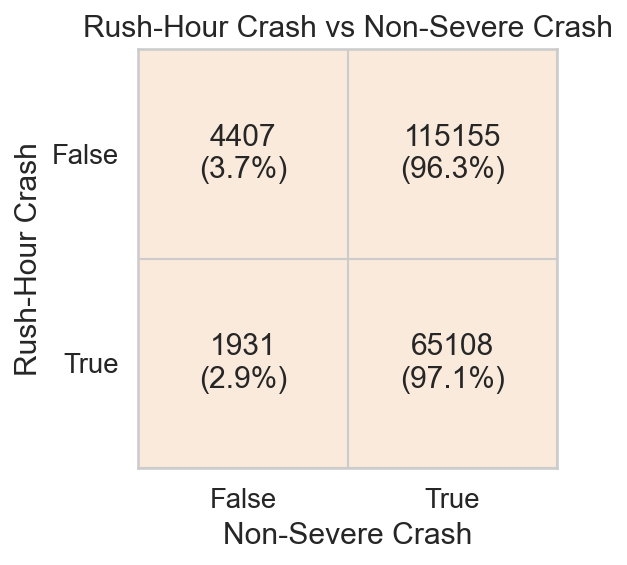


Cross Tabulation: Poor Visibility vs Severe Crash
Severe Crash      False  True 
Poor Visibility               
False            179546   6319
True                717     19


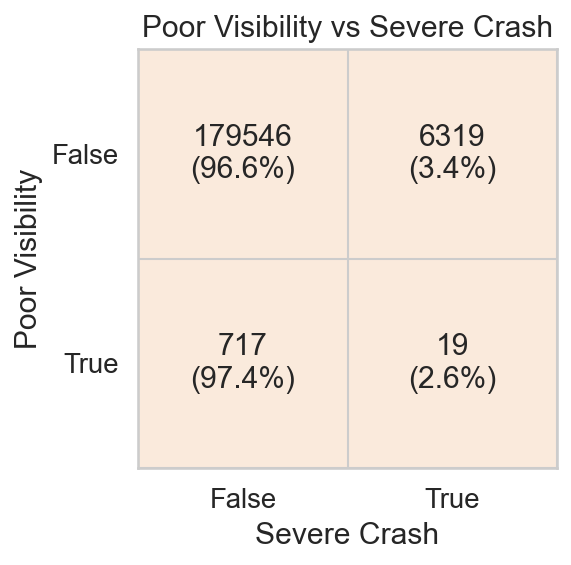


Cross Tabulation: Clear Weather vs Non-Severe Crash
Non-Severe Crash  False   True 
Clear Weather                  
False               931   32394
True               5407  147869


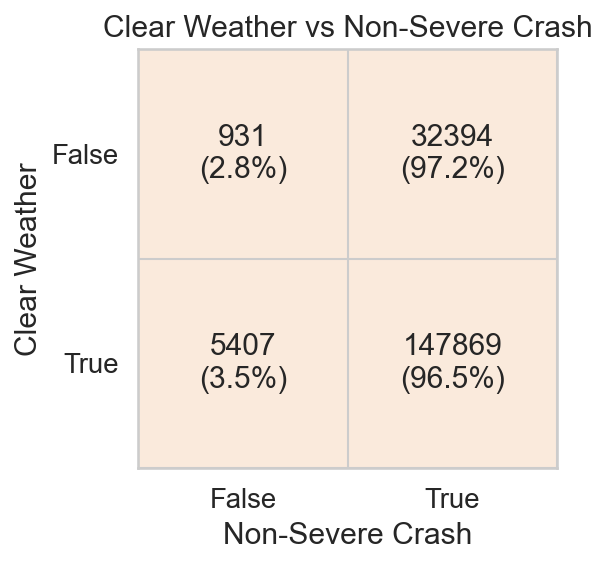

In [28]:
# Function to display Cross tabulation
def plot_crosstab_table(crosstab, title, xlabel, ylabel):
    # Absolute values
    counts = crosstab.values

    # Row-wise proportions
    proportions = crosstab.div(crosstab.sum(axis=1), axis=0).values

    n_rows, n_cols = counts.shape

    plt.figure()
    plt.imshow(np.ones_like(counts), vmin=0, vmax=1)  # neutral background
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Axis ticks
    plt.xticks(range(n_cols), crosstab.columns.astype(str))
    plt.yticks(range(n_rows), crosstab.index.astype(str))

    # Grid lines
    plt.grid(False)
    plt.gca().set_xticks(np.arange(-.5, n_cols, 1), minor=True)
    plt.gca().set_yticks(np.arange(-.5, n_rows, 1), minor=True)
    plt.grid(which="minor")

    # Cell annotations
    for i in range(n_rows):
        for j in range(n_cols):
            plt.text(
                j, i,
                f"{counts[i, j]}\n({proportions[i, j]*100:.1f}%)",
                ha="center",
                va="center"
            )

    plt.tight_layout()
    plt.show()

# Cross Tabulation 1: Late-Hour Crash vs Severe Crash
# Relevance: Night driving is associated with: -fatigue, -reduced visibility, -alcohol.
# What we analyze: Are severe crashes over-represented during late hours?
crosstab_late_severe = pd.crosstab(
    late_hour_event,
    severe_crash_event,
    rownames=["Late Hour Crash"],
    colnames=["Severe Crash"]
)

print("Cross Tabulation: Late-Hour Crash vs Severe Crash")
print(crosstab_late_severe)
plot_crosstab_table(
    crosstab_late_severe,
    title="Late-Hour Crash vs Severe Crash",
    xlabel="Severe Crash",
    ylabel="Late-Hour Crash"
)

# Cross Tabulation 2: Rush-Hour Crash vs Non-Severe Crash
# Relevance: Rush hours involve: -high traffic density, -lower speeds, -frequent stop and go
# situations
# Hypothesis: more crashes, but often less severe
# What we analyze: What is the proportion of non-severe crashes higher during rush hours?
crosstab_rush_non_severe = pd.crosstab(
    rush_hour_event,
    non_severe_crash_event,
    rownames=["Rush Hour Crash"],
    colnames=["Non-Severe Crash"]
)

print("\nCross Tabulation: Rush-Hour Crash vs Non-Severe Crash")
print(crosstab_rush_non_severe)
plot_crosstab_table(
    crosstab_rush_non_severe,
    title="Rush-Hour Crash vs Non-Severe Crash",
    xlabel="Non-Severe Crash",
    ylabel="Rush-Hour Crash"
)

# Cross Tabulation 3: Poor Visibility vs Severe Crash
# Relevance: Visability directly affects reaction time. Well established relationship in traffic
# safty research
# What we analyze: Do severe crashes occur more frequently under poor visibility conditions?
crosstab_visibility_severe = pd.crosstab(
    poor_visibility_event,
    severe_crash_event,
    rownames=["Poor Visibility"],
    colnames=["Severe Crash"]
)

print("\nCross Tabulation: Poor Visibility vs Severe Crash")
print(crosstab_visibility_severe)
plot_crosstab_table(
    crosstab_visibility_severe,
    title="Poor Visibility vs Severe Crash",
    xlabel="Severe Crash",
    ylabel="Poor Visibility"
)

# Cross Tabulation 4: Clear Weather vs Non-Severe Crash
# Relevance: Clear conditions serve as a baseline
# What we analyze: Are crashes under clear weather more likely to be non-severe?
crosstab_clear_non_severe = pd.crosstab(
    clear_weather_event,
    non_severe_crash_event,
    rownames=["Clear Weather"],
    colnames=["Non-Severe Crash"]
)
print("\nCross Tabulation: Clear Weather vs Non-Severe Crash")
print(crosstab_clear_non_severe)
plot_crosstab_table(
    crosstab_clear_non_severe,
    title="Clear Weather vs Non-Severe Crash",
    xlabel="Non-Severe Crash",
    ylabel="Clear Weather"
)

#### Conditional Probability

In [64]:
# Conditional Probability 1:
# Probability of a severe crash given a late-hour crash
# Relevance: Late hours are associated with fatigue, alcohol, and reduced visibility,
# which may increase crash severity.

# Marginal probabilities
P_severe = severe_crash_event.sum() / len(df_csv_data_cleaned)
P_late_hour = late_hour_event.sum() / len(df_csv_data_cleaned)

# Conditional probabilities
P_severe_given_late = (
    severe_crash_event & late_hour_event
).sum() / late_hour_event.sum()

P_late_given_severe = (
    severe_crash_event & late_hour_event
).sum() / severe_crash_event.sum()

print(f"P(Severe Crash): {P_severe:.3%}")
print(f"P(Late-Hour Crash): {P_late_hour:.3%}")
print(f"P(Severe Crash | Late-Hour Crash): {P_severe_given_late:.3%}")
print(f"P(Late-Hour Crash | Severe Crash): {P_late_given_severe:.3%}")


# Conditional Probability 2:
# Probability of a severe crash given poor visibility conditions
# Relevance: Poor visibility impairs hazard perception and reaction time,
# potentially leading to higher-impact collisions.

# Marginal probabilities
P_poor_visibility = poor_visibility_event.sum() / len(df_csv_data_cleaned)

# Conditional probabilities
P_severe_given_poor_visibility = (
    severe_crash_event & poor_visibility_event
).sum() / poor_visibility_event.sum()

P_poor_visibility_given_severe = (
    severe_crash_event & poor_visibility_event
).sum() / severe_crash_event.sum()

print(f"P(Severe Crash): {P_severe:.3%}")
print(f"P(Poor Visibility Crash): {P_poor_visibility:.3%}")
print(f"P(Severe Crash | Poor Visibility): {P_severe_given_poor_visibility:.3%}")
print(f"P(Poor Visibility Crash | Severe Crash): {P_poor_visibility_given_severe:.3%}")



# Conditional Probability 3:
# Probability of a non-severe crash given a rush-hour crash
# Relevance: Rush-hour traffic typically involves lower speeds due to congestion,
# which may reduce injury severity despite higher crash frequency.

# Marginal probabilities
P_non_severe = non_severe_crash_event.sum() / len(df_csv_data_cleaned)
P_rush_hour = rush_hour_event.sum() / len(df_csv_data_cleaned)

# Conditional probabilities
P_non_severe_given_rush = (
    non_severe_crash_event & rush_hour_event
).sum() / rush_hour_event.sum()

P_rush_given_non_severe = (
    non_severe_crash_event & rush_hour_event
).sum() / non_severe_crash_event.sum()

print(f"P(Non-Severe Crash): {P_non_severe:.3%}")
print(f"P(Rush-Hour Crash): {P_rush_hour:.3%}")
print(f"P(Non-Severe Crash | Rush-Hour Crash): {P_non_severe_given_rush:.3%}")
print(f"P(Rush-Hour Crash | Non-Severe Crash): {P_rush_given_non_severe:.3%}")



P(Severe Crash): 3.397%
P(Late-Hour Crash): 22.856%
P(Severe Crash | Late-Hour Crash): 4.675%
P(Late-Hour Crash | Severe Crash): 31.461%
P(Severe Crash): 3.397%
P(Poor Visibility Crash): 0.394%
P(Severe Crash | Poor Visibility): 2.582%
P(Poor Visibility Crash | Severe Crash): 0.300%
P(Non-Severe Crash): 96.603%
P(Rush-Hour Crash): 35.926%
P(Non-Severe Crash | Rush-Hour Crash): 97.120%
P(Rush-Hour Crash | Non-Severe Crash): 36.118%


#### Summary of Observations
Observations:
- Contrary to intuitive expectations, the conditional probabilities of severe crashes under  
  late-hour conditions and poor visibility conditions are relatively low and of similar magnitude.  
  P(Severe Crash∣Late Hour)≈4.7%,   
  𝑃(Severe Crash∣Poor Visibility)≈2.6%,   
  𝑃(Severe Crash∣Rush Hour)≈2.29%
- Conditions that increase the likelihood of crashes do not necessarily increase the severity of outcomes.

Assumptions:
- All crashes are treated as independent observations, even though multiple crashes may involve
similar locations, times, or drivers.
- Binary event definitions (e.g., severe vs non-severe) adequately capture the complexity of crash outcomes.
- Weather and lighting conditions recorded at the time of the crash correctly represent the actual
  driving conditions experienced by drivers.
- The chosen thresholds (e.g., late hours, rush hours, severity definitions) meaningfully separate
  different risk regimes.

Potential Bias and Limitations:
- Fatal and incapacitating injury crashes are relatively rare.
- This can lead to unstable probability estimates and large relative changes from small absolute
  differences.
- Injury severity may be misclassified or updated after initial reporting.
- Weather and visibility conditions are categorical and may not capture intensity (e.g., light vs
  heavy rain).
- Time-based thresholds (late hours, rush hours) are somewhat arbitrary and based on common
  conventions.
- Slight changes to these thresholds could alter probability estimates.
- Variables such as speed, driver age, alcohol involvement, and road type are not controlled for.
- Traffic volume is not directly observed, limiting interpretation of frequency-based probabilities.


---
## D. Statistical Theory Applications (45 points)
---
**Assigned to Tim**
- Law of Large Numbers demonstration (15 points)
- Central Limit Theorem application (sampling distributions, effect of sample size, interpretation) (25 points)
- Result interpretation and sanity checks (what would invalidate your conclusion, what you verified) (5 points)

#### Law of Large Numbers

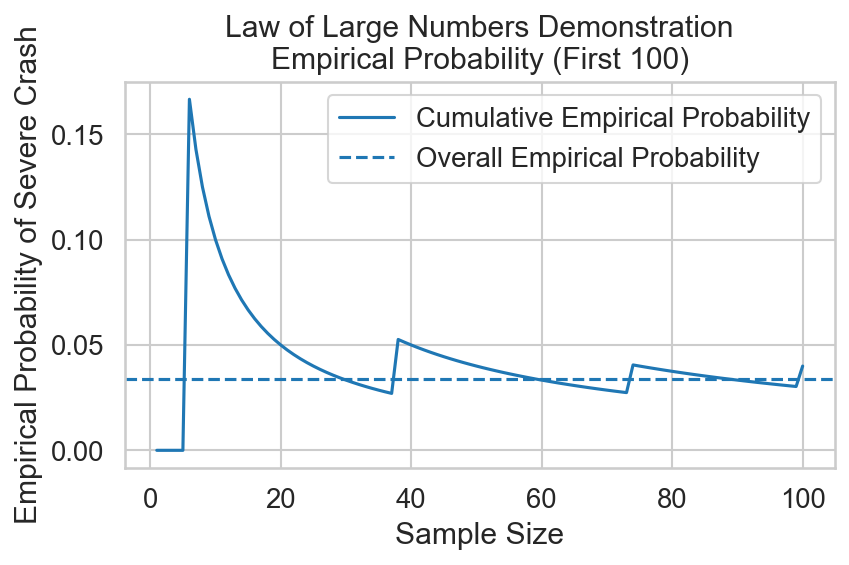

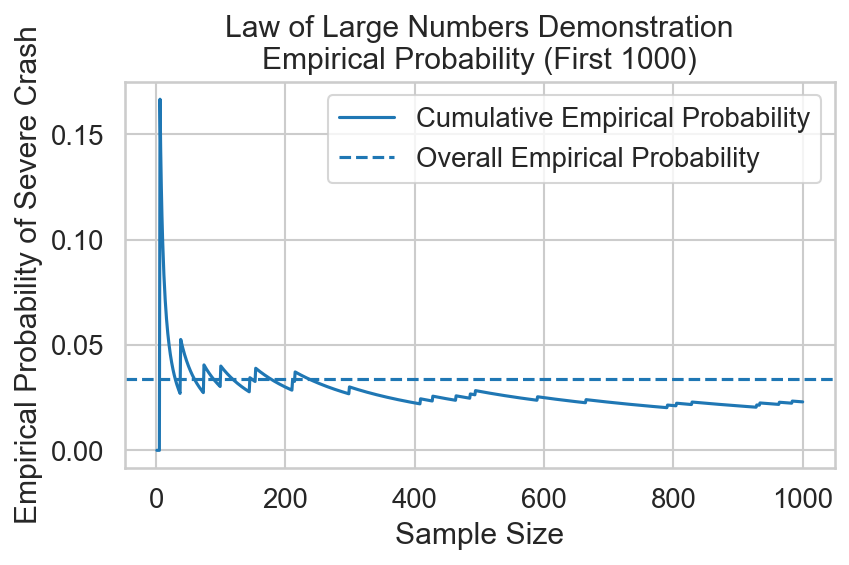

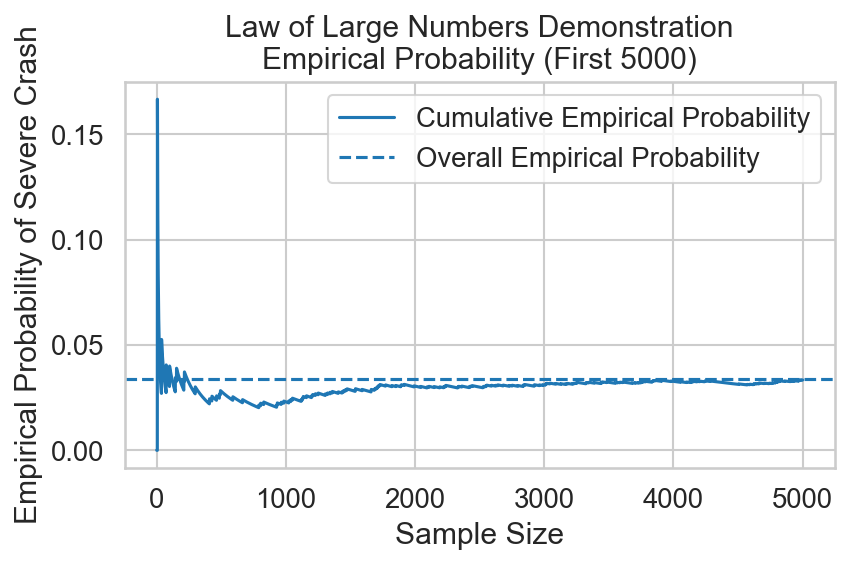

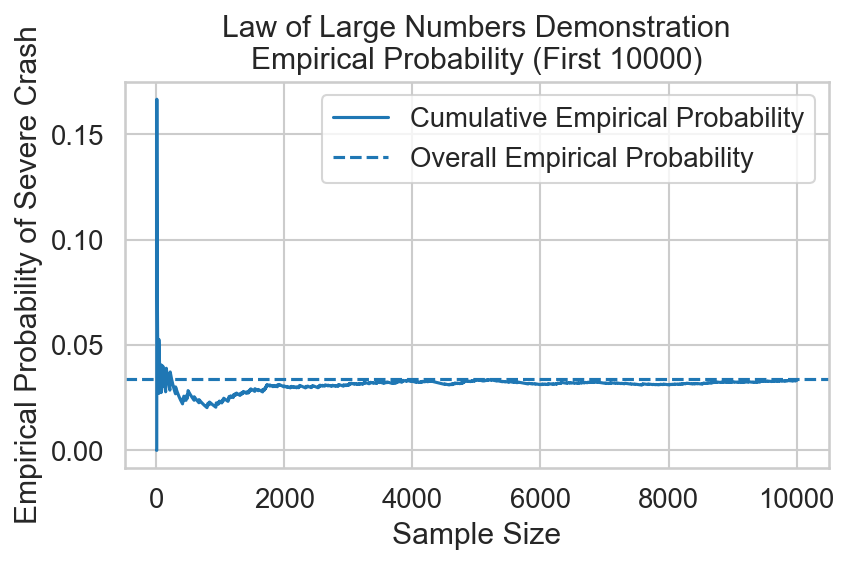

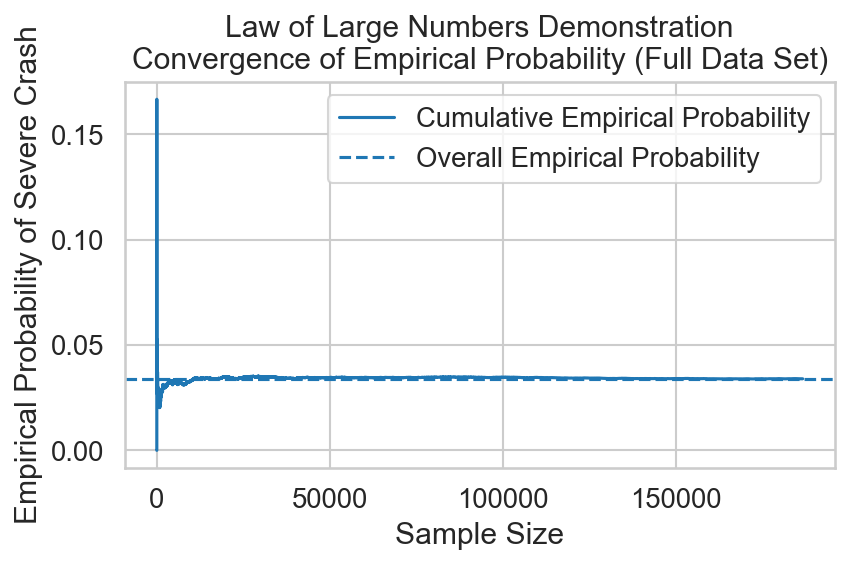

In [41]:
# Convert severe crash event to indicator variable
# 1 = severe crash, 0 = non-severe crash
severe_indicator = severe_crash_event.astype(int).values

# Shuffle observations to simulate random order
np.random.seed(42)
np.random.shuffle(severe_indicator)

# Sample sizes
sample_sizes = np.arange(1, len(severe_indicator) + 1)

# Cumulative empirical probability
cumulative_mean = np.cumsum(severe_indicator) / sample_sizes

# Overall empirical probability (reference)
overall_probability = cumulative_mean[-1]

# Zoomed in Plot
max_samples = 100

plt.figure()
plt.plot(
    sample_sizes[:max_samples],
    cumulative_mean[:max_samples],
    label="Cumulative Empirical Probability"
)

plt.axhline(
    overall_probability,
    linestyle="--",
    label="Overall Empirical Probability"
)

plt.xlabel("Sample Size")
plt.ylabel("Empirical Probability of Severe Crash")
plt.title(
    "Law of Large Numbers Demonstration\n"
    "Empirical Probability (First 100)"
)
plt.legend()
plt.show()

max_samples = 1000

plt.figure()
plt.plot(
    sample_sizes[:max_samples],
    cumulative_mean[:max_samples],
    label="Cumulative Empirical Probability"
)

plt.axhline(
    overall_probability,
    linestyle="--",
    label="Overall Empirical Probability"
)

plt.xlabel("Sample Size")
plt.ylabel("Empirical Probability of Severe Crash")
plt.title(
    "Law of Large Numbers Demonstration\n"
    "Empirical Probability (First 1000)"
)
plt.legend()
plt.show()

max_samples = 5000

plt.figure()
plt.plot(
    sample_sizes[:max_samples],
    cumulative_mean[:max_samples],
    label="Cumulative Empirical Probability"
)

plt.axhline(
    overall_probability,
    linestyle="--",
    label="Overall Empirical Probability"
)

plt.xlabel("Sample Size")
plt.ylabel("Empirical Probability of Severe Crash")
plt.title(
    "Law of Large Numbers Demonstration\n"
    "Empirical Probability (First 5000)"
)
plt.legend()
plt.show()

max_samples = 10000

plt.figure()
plt.plot(
    sample_sizes[:max_samples],
    cumulative_mean[:max_samples],
    label="Cumulative Empirical Probability"
)

plt.axhline(
    overall_probability,
    linestyle="--",
    label="Overall Empirical Probability"
)

plt.xlabel("Sample Size")
plt.ylabel("Empirical Probability of Severe Crash")
plt.title(
    "Law of Large Numbers Demonstration\n"
    "Empirical Probability (First 10000)"
)
plt.legend()
plt.show()

# Plot
plt.figure()
plt.plot(sample_sizes, cumulative_mean, label="Cumulative Empirical Probability")
plt.axhline(
    overall_probability,
    linestyle="--",
    label="Overall Empirical Probability"
)
plt.xlabel("Sample Size")
plt.ylabel("Empirical Probability of Severe Crash")
plt.title("Law of Large Numbers Demonstration\nConvergence of Empirical Probability (Full Data Set)")
plt.legend()
plt.show()

##### Observations
When considering only the first 1,000 observations, the empirical probability appears to converge  
toward a lower value. As the sample size increases, the estimate exhibits decreasing fluctuations  
and begins to stabilize. Around 10,000 observations, the empirical probability converges closely  
to the overall value, illustrating the stabilizing effect predicted by the Law of Large Numbers.   
Additionally, the apparent convergence observed at small sample sizes is unstable and sensitive
to  
random variation, emphasizing that early estimates may be misleading without sufficiently  
large samples.



#### Central Limit Theorem application

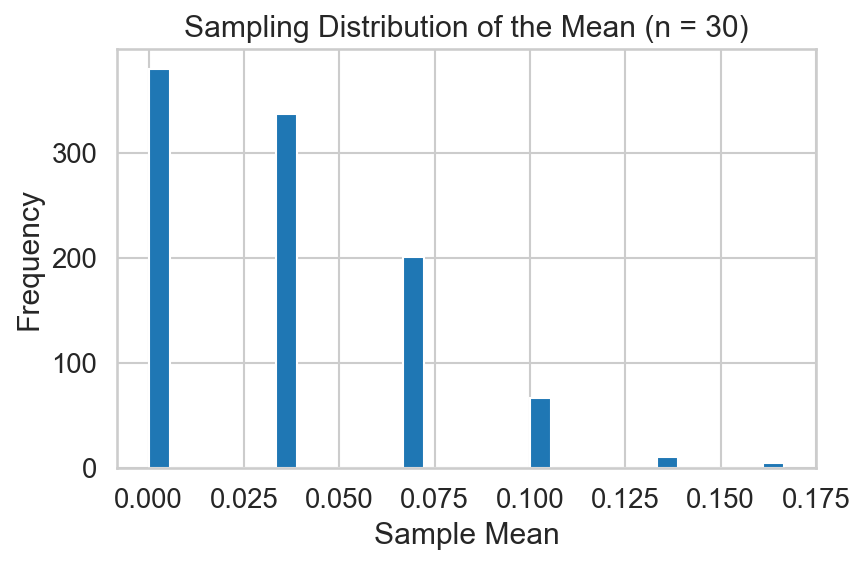

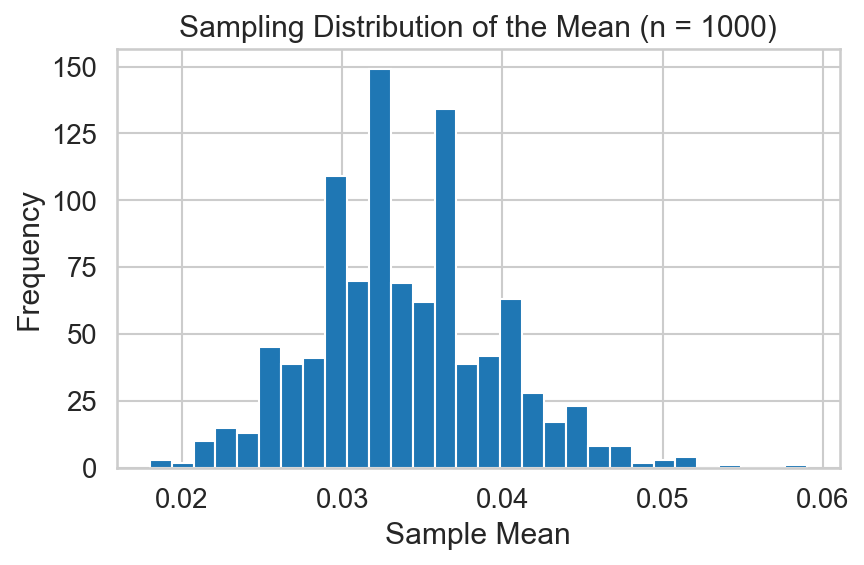

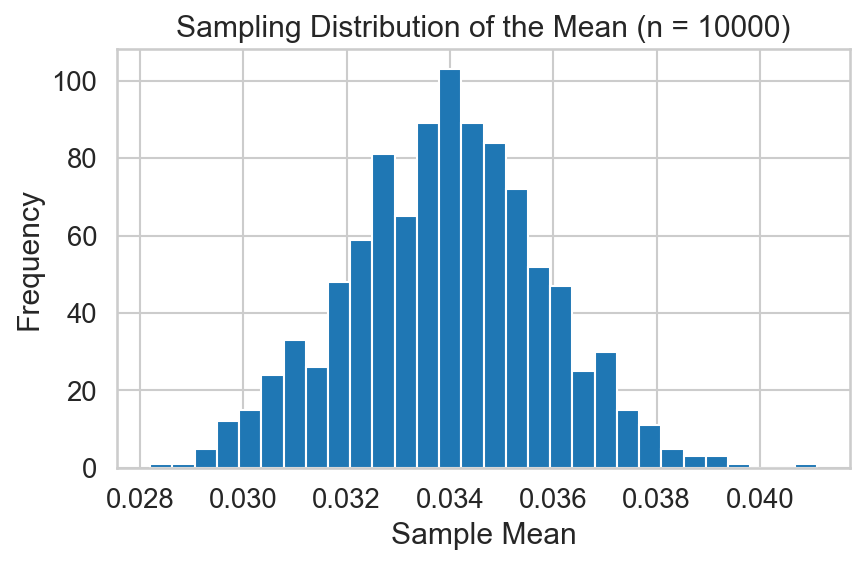

In [50]:
np.random.seed(42)

# Indicator variable: 1 = severe crash, 0 = non-severe crash
data = severe_crash_event.astype(int).values

# Number of bootstrap samples
num_samples = 1000

# Sample sizes
n_30 = 30
n_1000 = 1000
n_10000 = 10000

# Sampling distributions
sample_means_30 = [
    np.mean(np.random.choice(data, size=n_30, replace=True))
    for _ in range(num_samples)
]

sample_means_1000 = [
    np.mean(np.random.choice(data, size=n_1000, replace=True))
    for _ in range(num_samples)
]

sample_means_10000 = [
    np.mean(np.random.choice(data, size=n_10000, replace=True))
    for _ in range(num_samples)
]

# Plot: Sampling distribution (n = 30)
plt.figure()
plt.hist(sample_means_30, bins=30)
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Sampling Distribution of the Mean (n = 30)")
plt.show()

# Plot: Sampling distribution (n = 1000)
plt.figure()
plt.hist(sample_means_1000, bins=30)
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Sampling Distribution of the Mean (n = 1000)")
plt.show()

# Plot: Sampling distribution (n = 10000)
plt.figure()
plt.hist(sample_means_10000, bins=30)
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Sampling Distribution of the Mean (n = 10000)")
plt.show()

##### Observations
- Each histogram represents the distribution of sample means
- Not the distribution of individual crashes

Effect of sample size:
- For 𝑛=30: wider, more irregular distribution, looks more like an exponential function
- For 𝑛=1000: narrower and more symmetric, but still with big spikes
- For 𝑛=1000: even more symmetric, a normal shape is distinguishable

Despite the binary nature of the original data, the sampling distribution of the mean approaches a normal shape

#### Observations and Sanity check
Observations:
The Law of Large Numbers is supported by the observed convergence of the empirical probability of a  
severe crash as the sample size increases. While early estimates fluctuate substantially, the  
cumulative mean stabilizes as more observations are included, indicating convergence toward a stable  
long-run value.

The Central Limit Theorem is illustrated by the behavior of the sampling distributions of the sample  
mean. As sample size increases, the distributions become more concentrated and symmetric, consistent  
with the theoretical prediction that sample means approach a normal distribution even when the  
underlying data are not normally distributed.

Sanity Check:
- The observations were randomly shuffled prior to analysis to avoid artifacts caused by ordering  
  effects in the dataset.
- Multiple sample sizes were examined to verify that convergence and distributional changes were not  
  specific to a single choice of sample size.
- A large number of repeated samples were used to ensure that the observed sampling distributions  
  were stable.

What would Invalidate These Conclusions:
- Strong dependence between observations (e.g., repeated crashes involving the same drivers or  
  locations) would violate the independence assumption underlying both the Law of Large Numbers and  
  the Central Limit Theorem.
- Severe underreporting or systematic misclassification of crash severity would distort the  
  empirical distributions and bias convergence behavior.
- Insufficient sample sizes would undermine the reliability of the observed convergence and sampling distributions.

---
## E. Regression and Predictive Modeling (45 points)
---
**Assigned to Lorenz**
- Define a prediction target and features (justify why they make sense) (10 points)
- Linear or polynomial model selection (include rationale and show at least two candidates)
(10 points)
- Model fitting and validation (train-test split appropriate for time-series. e.g., time-based split) (15 points)
- Residual analysis and interpretation (errors, bias, failure cases, what to improve next) (10 points)

---
## F. Dimensionality Reduction and Statistical Tests (25 points)
---
**Assigned to Jeremia**
###  Dimensionality Reduction (25 points)
- PCA projection and interpretation (variance explained, what clusters or separations mean) (10 points)
- t-SNE embedding with justified hyperparameters (perplexity or similar) and interpretation (7 points)
- UMAP embedding with justified hyperparameters (neighbors, min dist or similar) and interpretation (8 points)


### PCA Projection

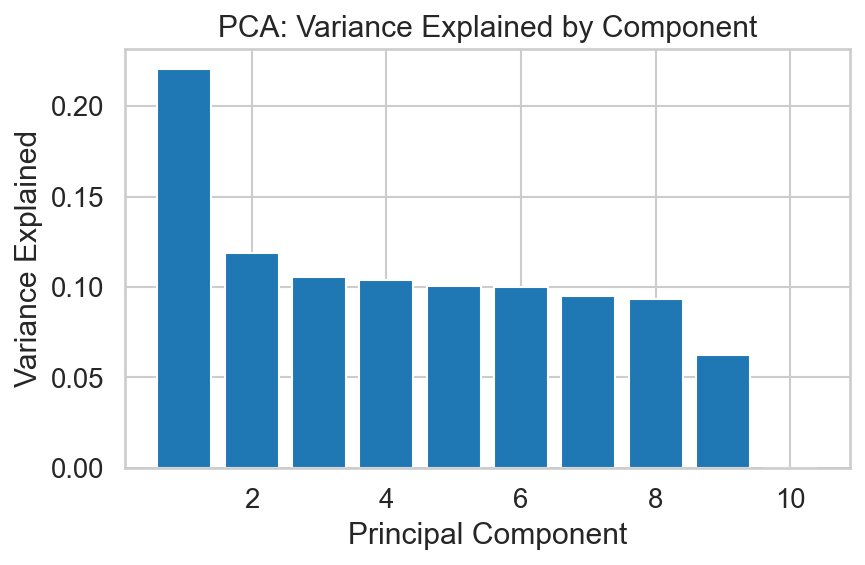

Cumulative variance explained: [0.22040174 0.33902078 0.44478708 0.54853593 0.64912358 0.74913841
 0.84401122 0.93747164 1.         1.        ]


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numeric columns
num_cols = [
    "injuries_total", "injuries_fatal", "injuries_incapacitating",
    "injuries_non_incapacitating", "injuries_reported_not_evident",
    "injuries_no_indication", "num_units", "crash_hour",
    "crash_day_of_week", "crash_month"
]
X = df_csv_data_cleaned.reset_index()[num_cols].dropna()

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA (all components first to see variance)
pca = PCA()
pca.fit(X_scaled)

# Variance explained
plt.figure()
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("PCA: Variance Explained by Component")
plt.show()

print("Cumulative variance explained:", np.cumsum(pca.explained_variance_ratio_))

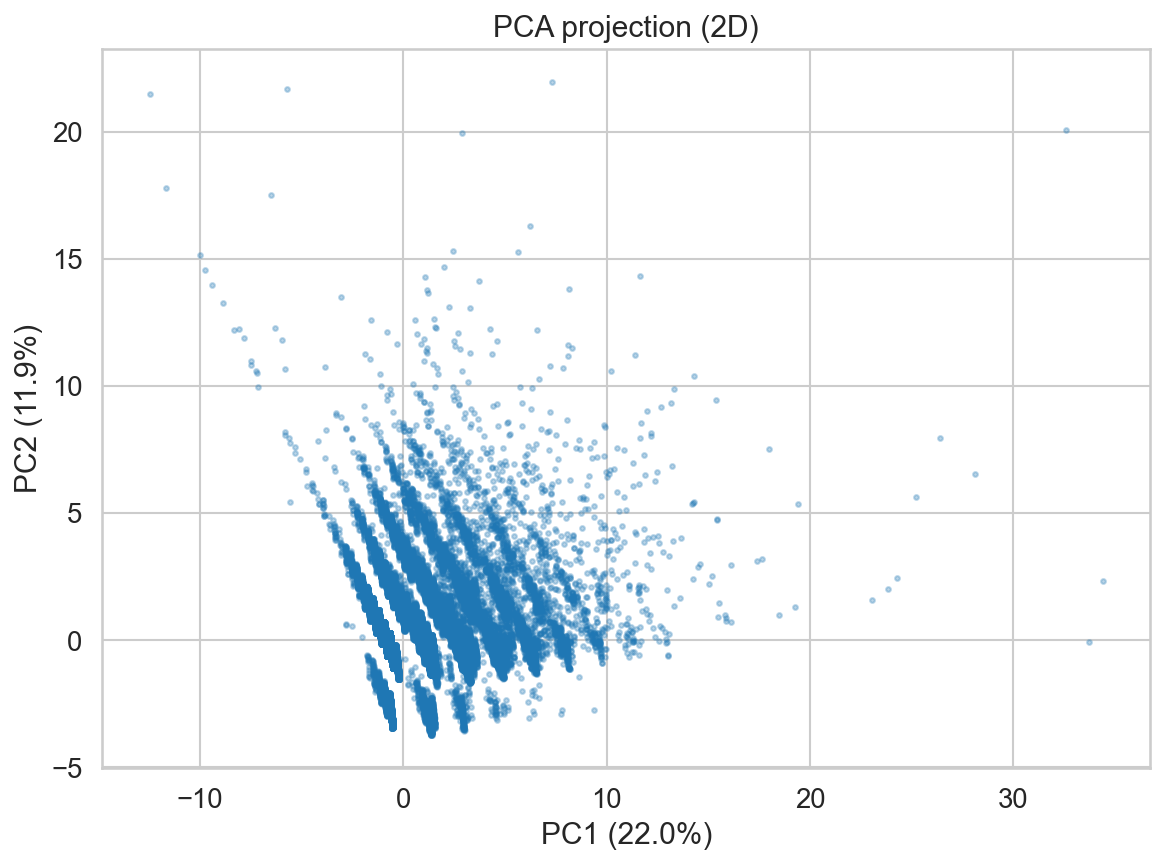

In [9]:
pca2 = PCA(n_components=2)
X_pca = pca2.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3, s=5)
plt.xlabel(f"PC1 ({pca2.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca2.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("PCA projection (2D)")
plt.show()

                                    PC1       PC2
injuries_total                 0.656960  0.080359
injuries_fatal                 0.088758  0.092885
injuries_incapacitating        0.233514  0.068527
injuries_non_incapacitating    0.508293  0.038661
injuries_reported_not_evident  0.338789  0.044370
injuries_no_indication        -0.341977  0.566568
num_units                      0.119696  0.764198
crash_hour                    -0.030383  0.246612
crash_day_of_week             -0.020527  0.103898
crash_month                    0.015386  0.012061


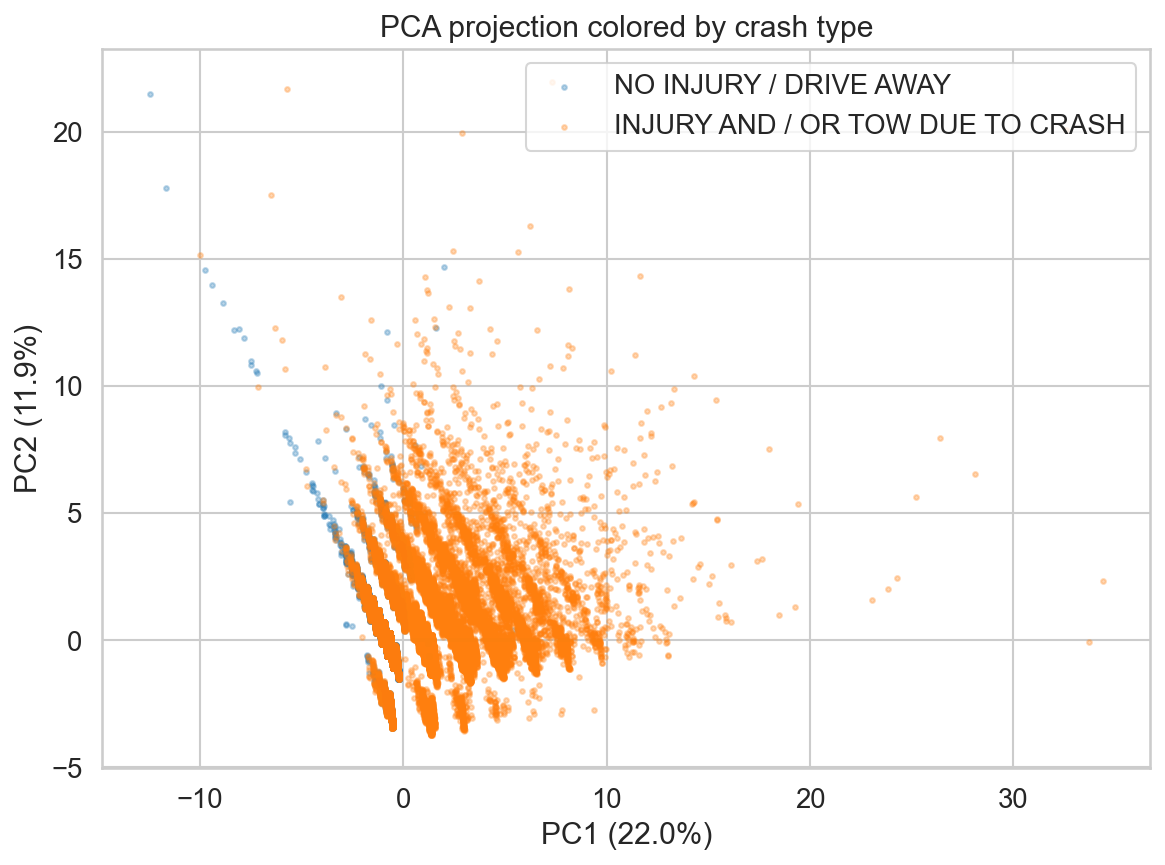

In [10]:
# Loadings
loadings = pd.DataFrame(
    pca2.components_.T,
    columns=["PC1", "PC2"],
    index=num_cols
)
print(loadings)

# Color by crash_type (align indices)
labels = df_csv_data_cleaned.reset_index().loc[X.index, "crash_type"]
plt.figure(figsize=(8, 6))
for label in labels.unique():
    mask = labels == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], alpha=0.3, s=5, label=label)
plt.xlabel(f"PC1 ({pca2.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca2.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("PCA projection colored by crash type")
plt.legend()
plt.show()


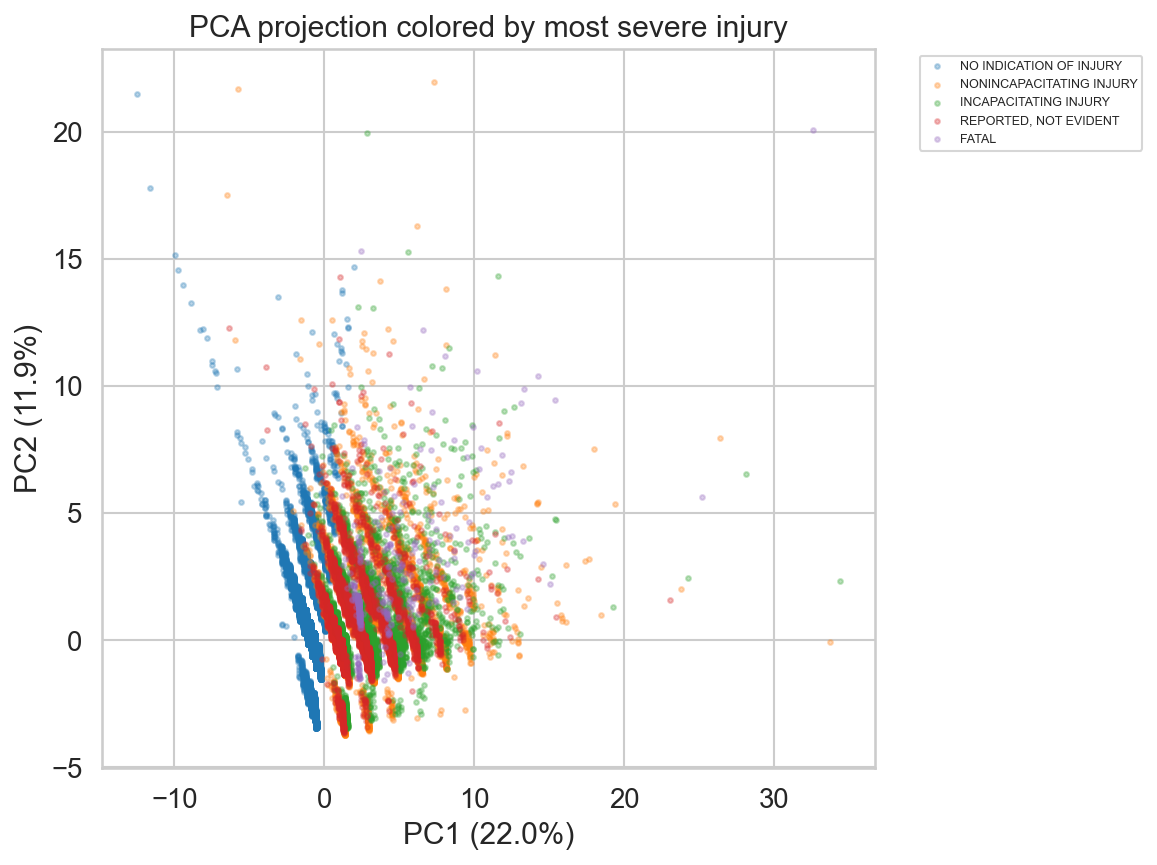

In [30]:
# Color PCA projection by first_crash_type (aligned to X index)
labels_first = df_csv_data_cleaned.reset_index().loc[X.index, "most_severe_injury"]

plt.figure(figsize=(8, 6))
for label in labels_first.unique():
    mask_fc = labels_first == label
    plt.scatter(X_pca[mask_fc, 0], X_pca[mask_fc, 1], alpha=0.3, s=5, label=label)

plt.xlabel(f"PC1 ({pca2.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca2.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("PCA projection colored by most severe injury")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=6)
plt.tight_layout()
plt.show()

### t-SNE embedding 

t-SNE completed. Final KL divergence: 0.8727


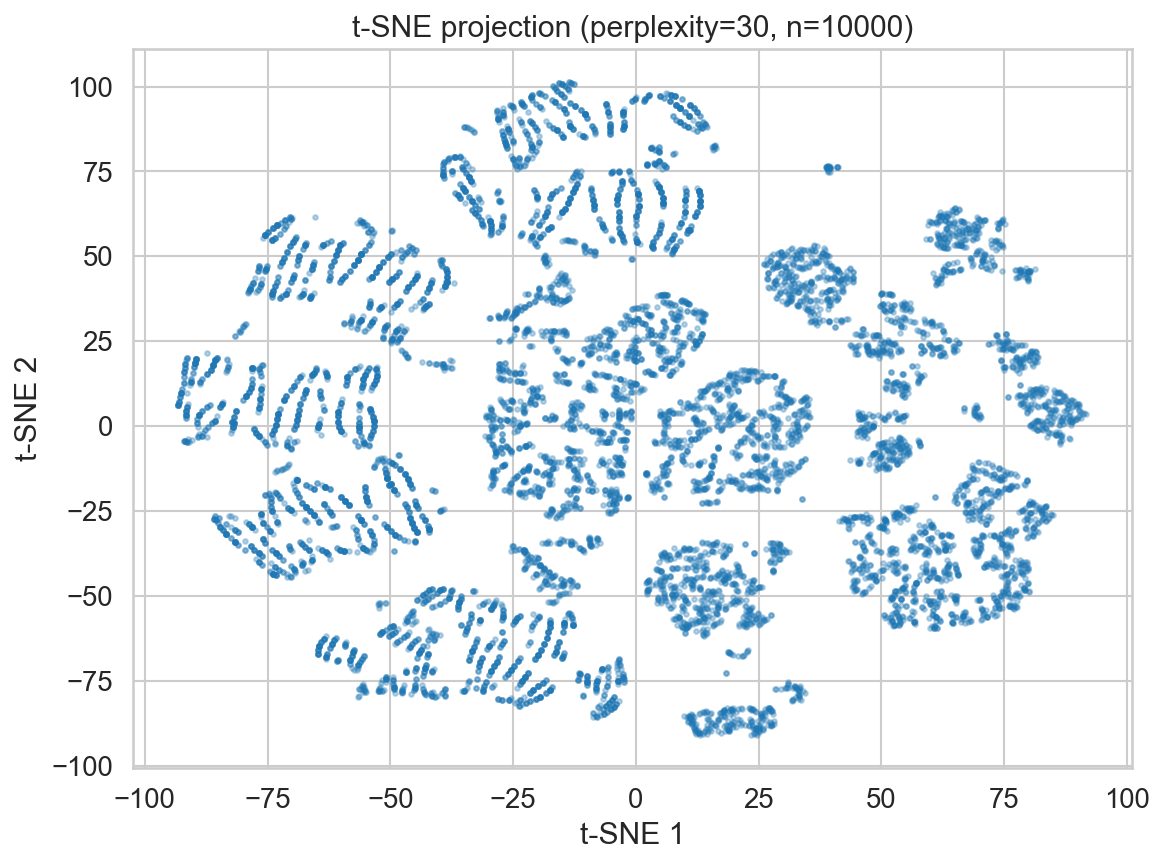

In [7]:
from sklearn.manifold import TSNE

# t-SNE Hyperparameter Justification:
# -----------------------------------
# perplexity=30: Balances local vs global structure. Typical range is 5-50.
#   - Lower perplexity focuses on local neighborhoods
#   - Higher perplexity captures more global structure
#   - 30 is a common default that works well for medium-to-large datasets
#
# n_iter=1000: Sufficient iterations for convergence (default)
#
# learning_rate='auto': Automatically set to N/early_exaggeration/4 (recommended)
#
# random_state=42: For reproducibility
#
# Sampling: t-SNE has O(N²) complexity, so we sample 10,000 points
#   for computational tractability while preserving structure

# Sample data for t-SNE (full dataset is too large)
sample_size = 10000
np.random.seed(42)
sample_idx = np.random.choice(len(X_scaled), size=sample_size, replace=False)
X_sample = X_scaled[sample_idx]

# Fit t-SNE with justified hyperparameters
tsne = TSNE(
    n_components=2,
    perplexity=30,       # Balance between local/global structure
    max_iter=1000,       # Standard iterations for convergence
    learning_rate='auto',
    random_state=42
)
X_tsne = tsne.fit_transform(X_sample)

print(f"t-SNE completed. Final KL divergence: {tsne.kl_divergence_:.4f}")

# Plot t-SNE embedding
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.3, s=5)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title(f"t-SNE projection (perplexity=30, n={sample_size})")
plt.show()

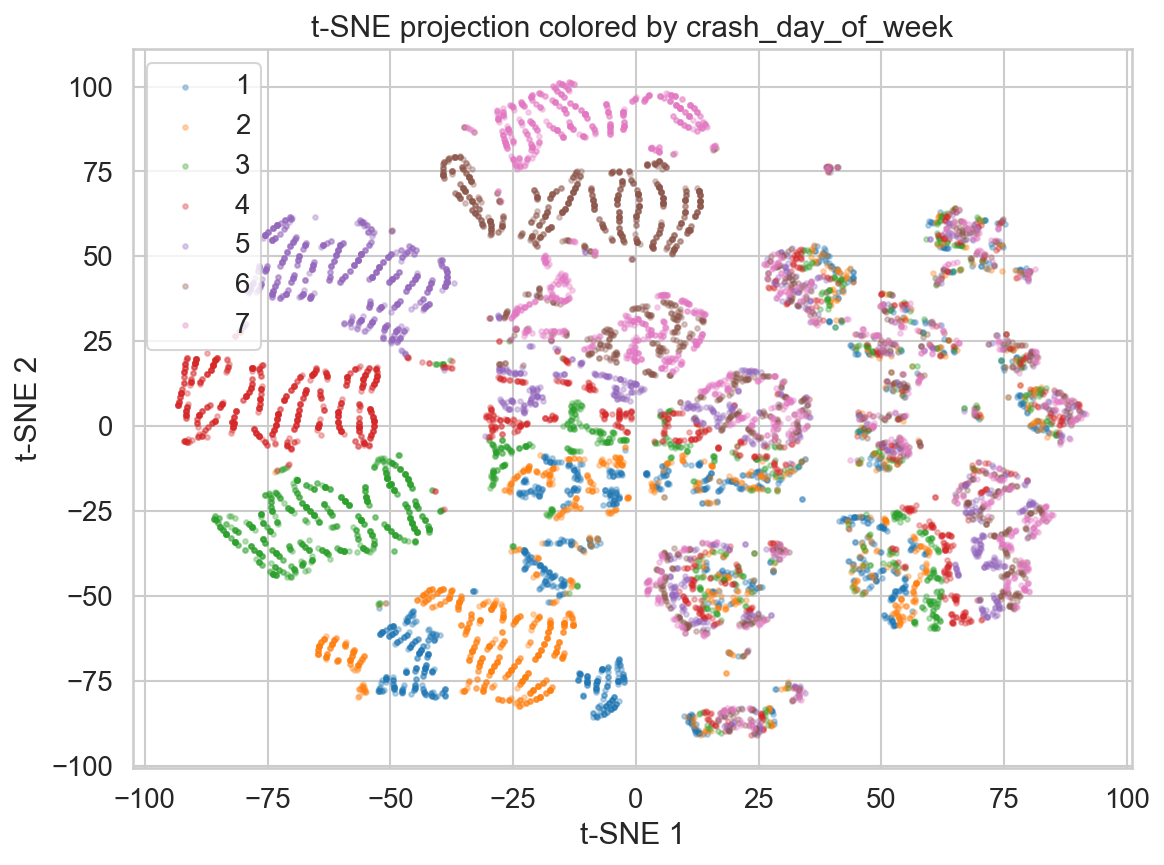

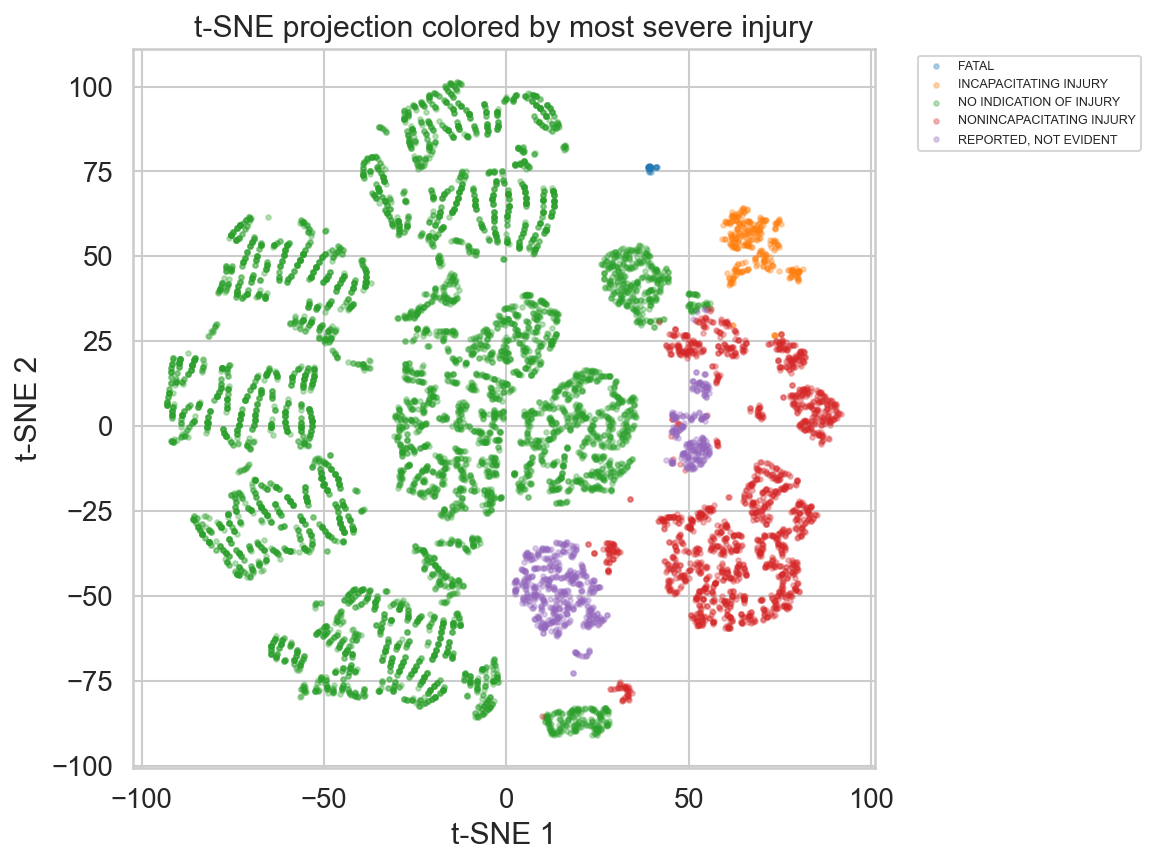

In [10]:
# Color t-SNE by crash_type
labels_sample = df_csv_data_cleaned.reset_index().loc[X.index[sample_idx], "crash_day_of_week"].values

plt.figure(figsize=(8, 6))
for label in np.unique(labels_sample):
    mask = labels_sample == label
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], alpha=0.3, s=5, label=label)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE projection colored by crash_day_of_week")
plt.legend()
plt.show()

# Color t-SNE by most_severe_injury
labels_injury = df_csv_data_cleaned.reset_index().loc[X.index[sample_idx], "most_severe_injury"].values

plt.figure(figsize=(8, 6))
for label in np.unique(labels_injury):
    mask = labels_injury == label
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], alpha=0.3, s=5, label=label)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE projection colored by most severe injury")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=6)
plt.tight_layout()
plt.show()

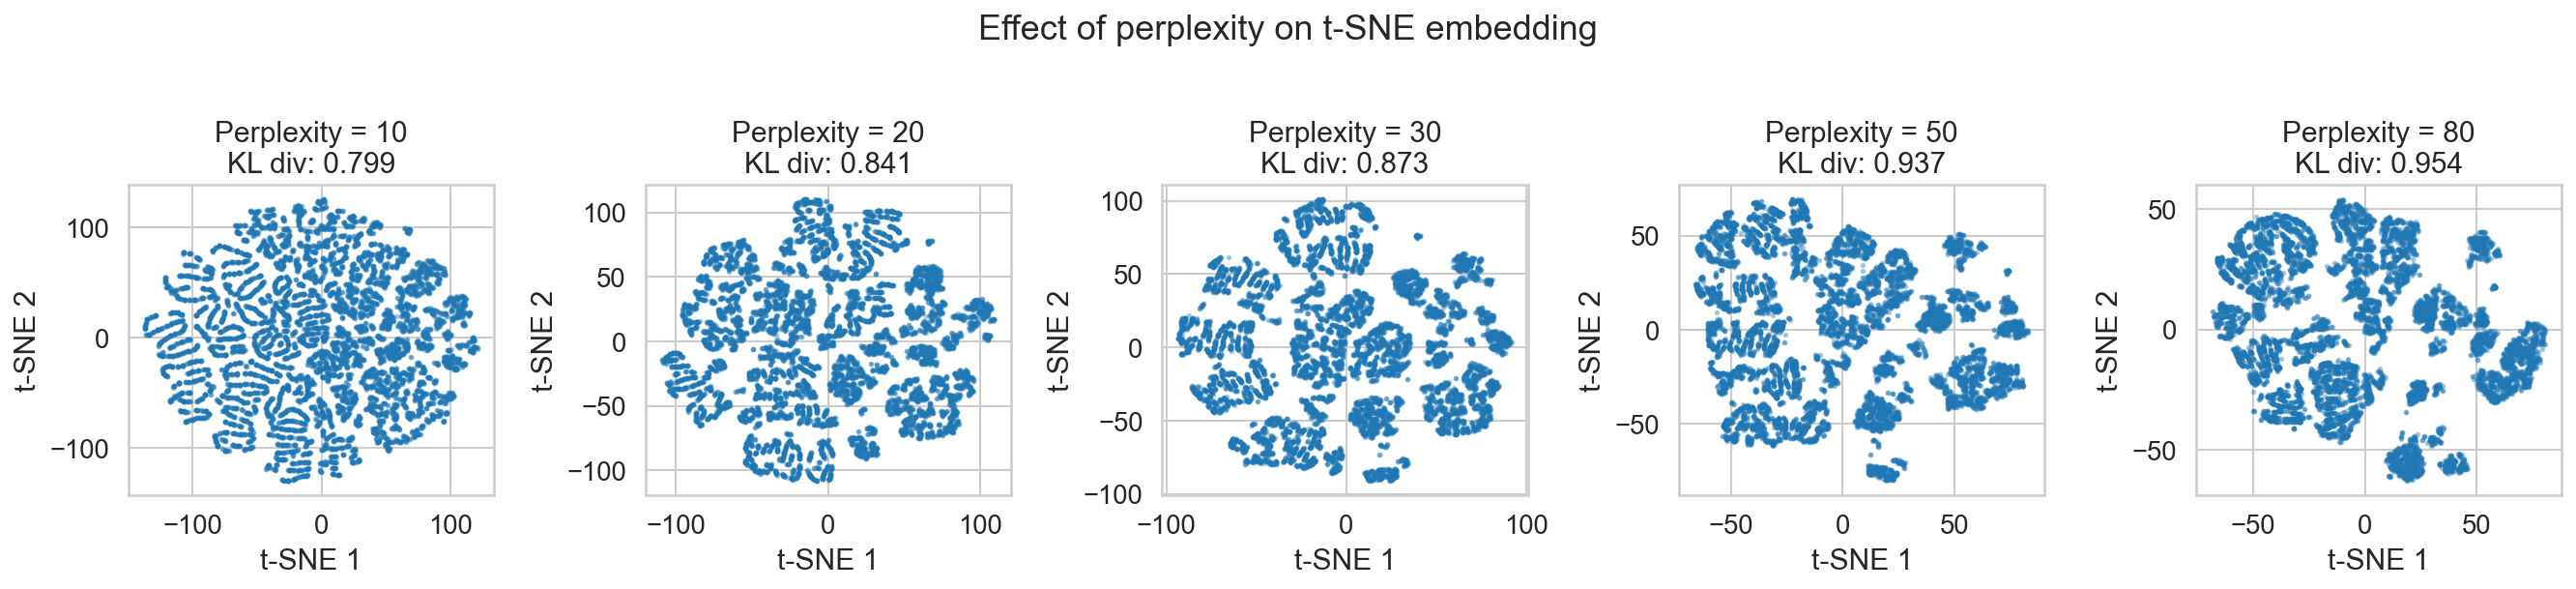

In [17]:
# Compare different perplexity values to show effect on embedding
fig, axes = plt.subplots(1, 5, figsize=(18, 4))

perplexities = [10, 20, 30, 50, 80]

for ax, perp in zip(axes, perplexities):
    tsne_test = TSNE(
        n_components=2,
        perplexity=perp,
        max_iter=1000,
        learning_rate='auto',
        random_state=42
    )
    X_tsne_test = tsne_test.fit_transform(X_sample)
    
    ax.scatter(X_tsne_test[:, 0], X_tsne_test[:, 1], alpha=0.3, s=3)
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")
    ax.set_title(f"Perplexity = {perp}\nKL div: {tsne_test.kl_divergence_:.3f}")

plt.suptitle("Effect of perplexity on t-SNE embedding", y=1.02)
plt.tight_layout()
plt.show()

# Interpretation:
# - Perplexity 10: Emphasizes very local structure, may fragment clusters
# - Perplexity 30: Balanced view, captures both local and some global structure
# - Perplexity 50: More global view, clusters may merge but overall shape preserved

### UMAP embedding

c:\Users\jerem\miniconda3\envs\jupyter311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


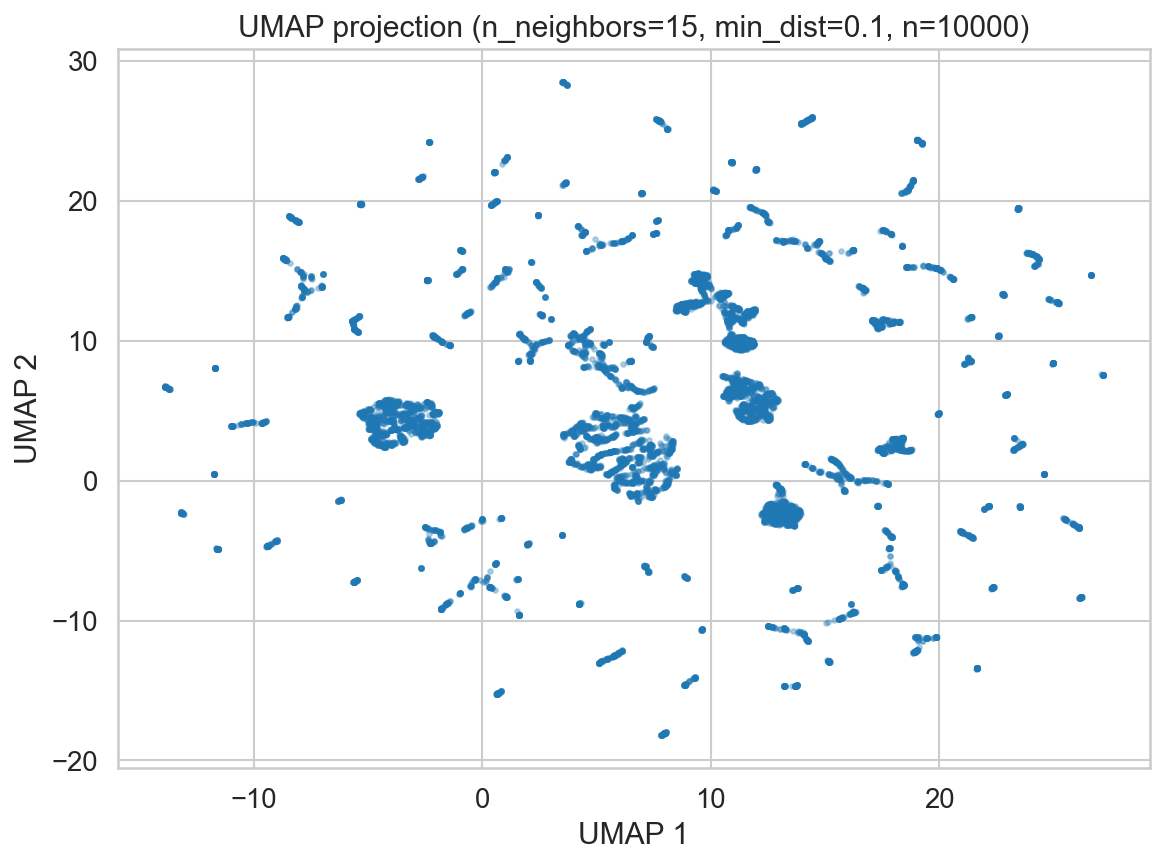

In [8]:
import umap

# UMAP Hyperparameter Justification:
# -----------------------------------
# n_neighbors=15: Controls local vs global structure balance
#   - Lower values (5-10): Focus on very local structure, may fragment data
#   - Higher values (50+): Emphasize global structure, lose local detail
#   - 15 is a common default balancing local manifold structure with global topology
#
# min_dist=0.1: Controls how tightly points cluster
#   - Lower values (0.0-0.1): Allows tighter clustering, better for finding clusters
#   - Higher values (0.5-1.0): Spreads points more evenly, preserves topological structure
#   - 0.1 allows clusters to form while maintaining some separation
#
# metric='euclidean': Standard distance metric for standardized numerical data
#
# random_state=42: For reproducibility
#
# n_epochs=500: Sufficient for convergence on medium datasets
#
# Using same sample as t-SNE for fair comparison

# Fit UMAP with justified hyperparameters
umap_model = umap.UMAP(
    n_neighbors=15,      # Balance local/global structure
    min_dist=0.1,        # Allow tight clustering
    n_components=2,
    metric='euclidean',
    random_state=42,
    n_epochs=500
)
X_umap = umap_model.fit_transform(X_sample)

# Plot UMAP embedding
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.3, s=5)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title(f"UMAP projection (n_neighbors=15, min_dist=0.1, n={sample_size})")
plt.show()

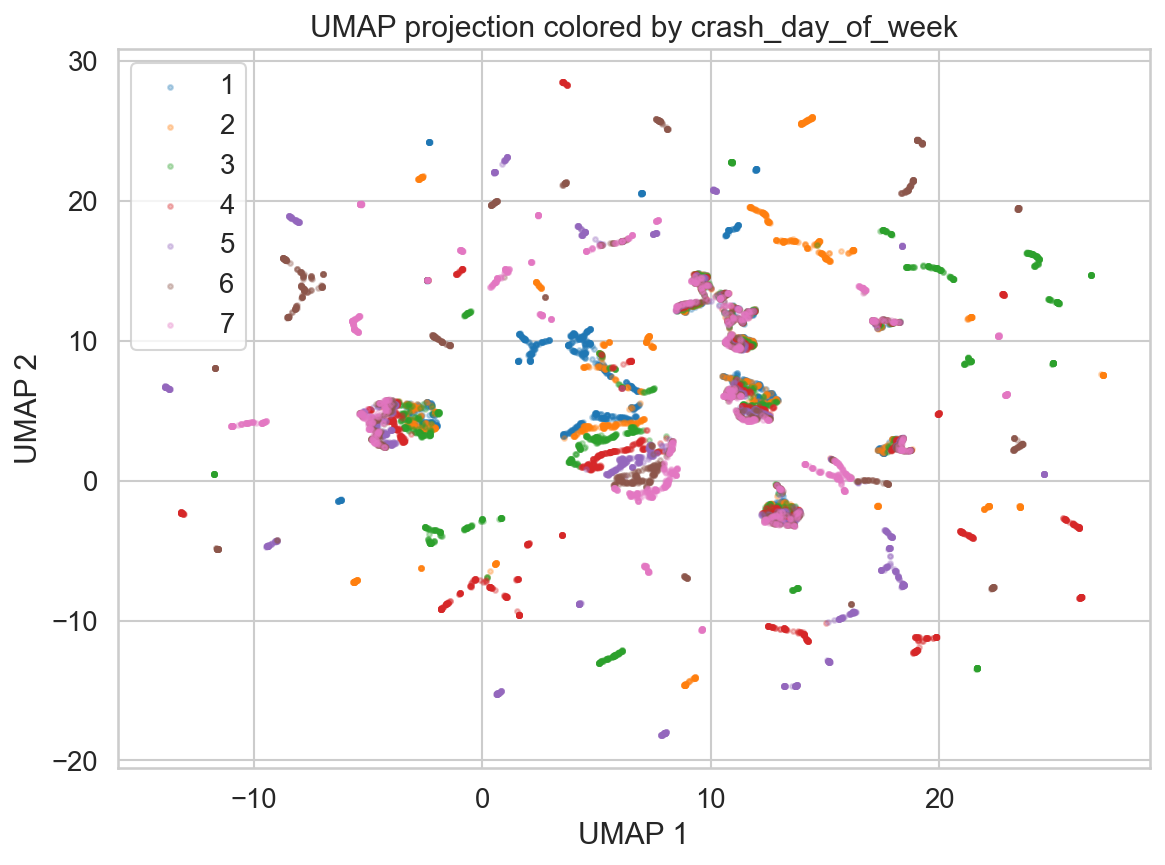

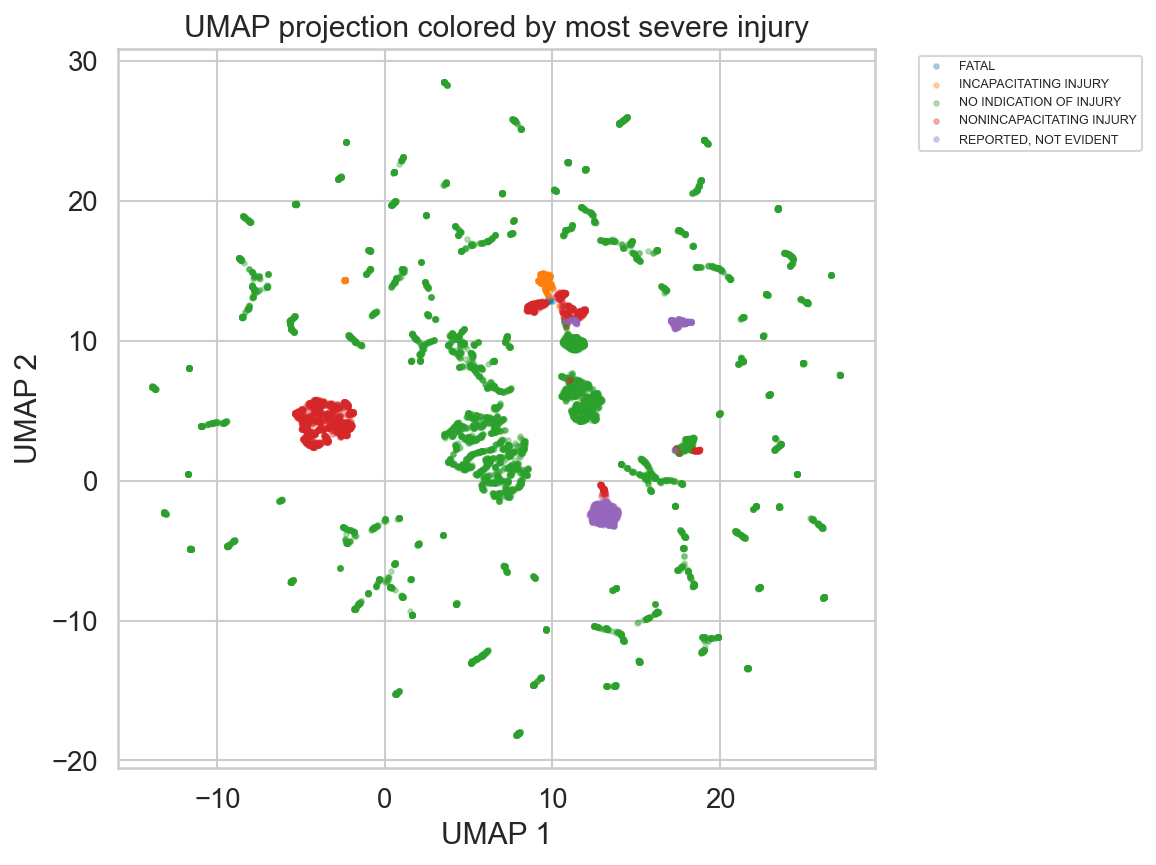

In [11]:
# Color UMAP by crash_type
plt.figure(figsize=(8, 6))
for label in np.unique(labels_sample):
    mask = labels_sample == label
    plt.scatter(X_umap[mask, 0], X_umap[mask, 1], alpha=0.3, s=5, label=label)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("UMAP projection colored by crash_day_of_week")
plt.legend()
plt.show()

# Color UMAP by most_severe_injury
plt.figure(figsize=(8, 6))
for label in np.unique(labels_injury):
    mask = labels_injury == label
    plt.scatter(X_umap[mask, 0], X_umap[mask, 1], alpha=0.3, s=5, label=label)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("UMAP projection colored by most severe injury")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=6)
plt.tight_layout()
plt.show()

c:\Users\jerem\miniconda3\envs\jupyter311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\jerem\miniconda3\envs\jupyter311\Lib\site-packages\umap\spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
c:\Users\jerem\miniconda3\envs\jupyter311\Lib\site-packages\umap\spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
c:\Users\jerem\miniconda3\envs\jupyter311\Lib\site-packages\umap\spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Conside

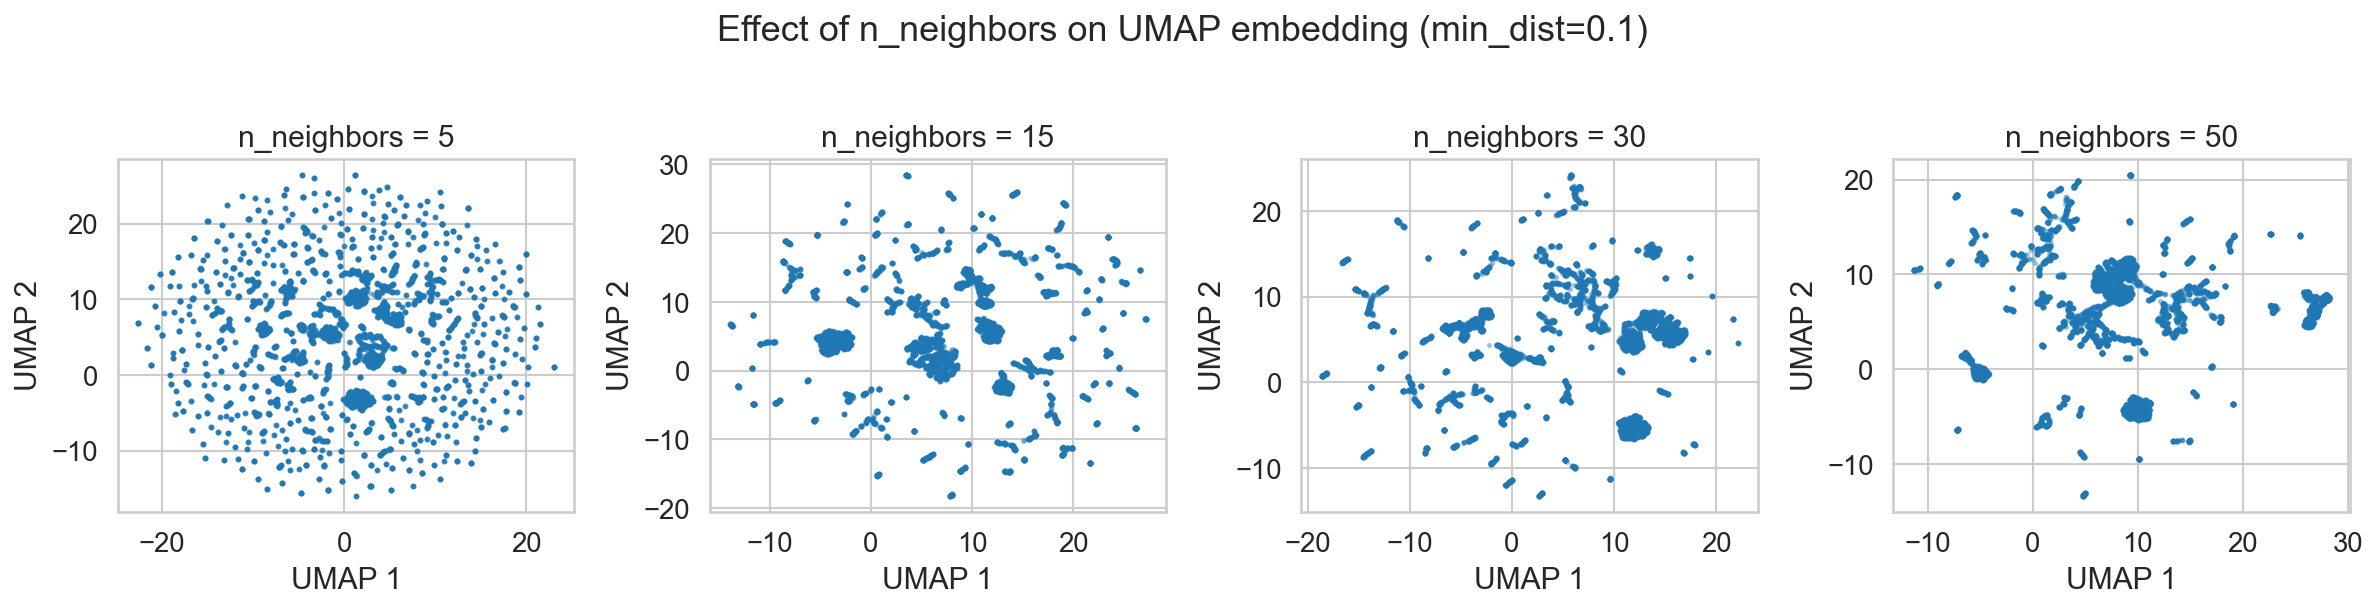

In [12]:
# Compare effect of n_neighbors on UMAP embedding
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

n_neighbors_values = [5, 15, 30, 50]

for ax, n_neigh in zip(axes, n_neighbors_values):
    umap_test = umap.UMAP(
        n_neighbors=n_neigh,
        min_dist=0.1,
        n_components=2,
        random_state=42,
        n_epochs=500
    )
    X_umap_test = umap_test.fit_transform(X_sample)
    
    ax.scatter(X_umap_test[:, 0], X_umap_test[:, 1], alpha=0.3, s=3)
    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    ax.set_title(f"n_neighbors = {n_neigh}")

plt.suptitle("Effect of n_neighbors on UMAP embedding (min_dist=0.1)", y=1.02)
plt.tight_layout()
plt.show()

# Interpretation:
# - n_neighbors=5: Very local focus, may over-fragment the data
# - n_neighbors=15: Good balance of local detail and global connectivity
# - n_neighbors=30: More global structure, clusters begin to merge
# - n_neighbors=50: Emphasizes global topology, local details smoothed out

c:\Users\jerem\miniconda3\envs\jupyter311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\jerem\miniconda3\envs\jupyter311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\jerem\miniconda3\envs\jupyter311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\jerem\miniconda3\envs\jupyter311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


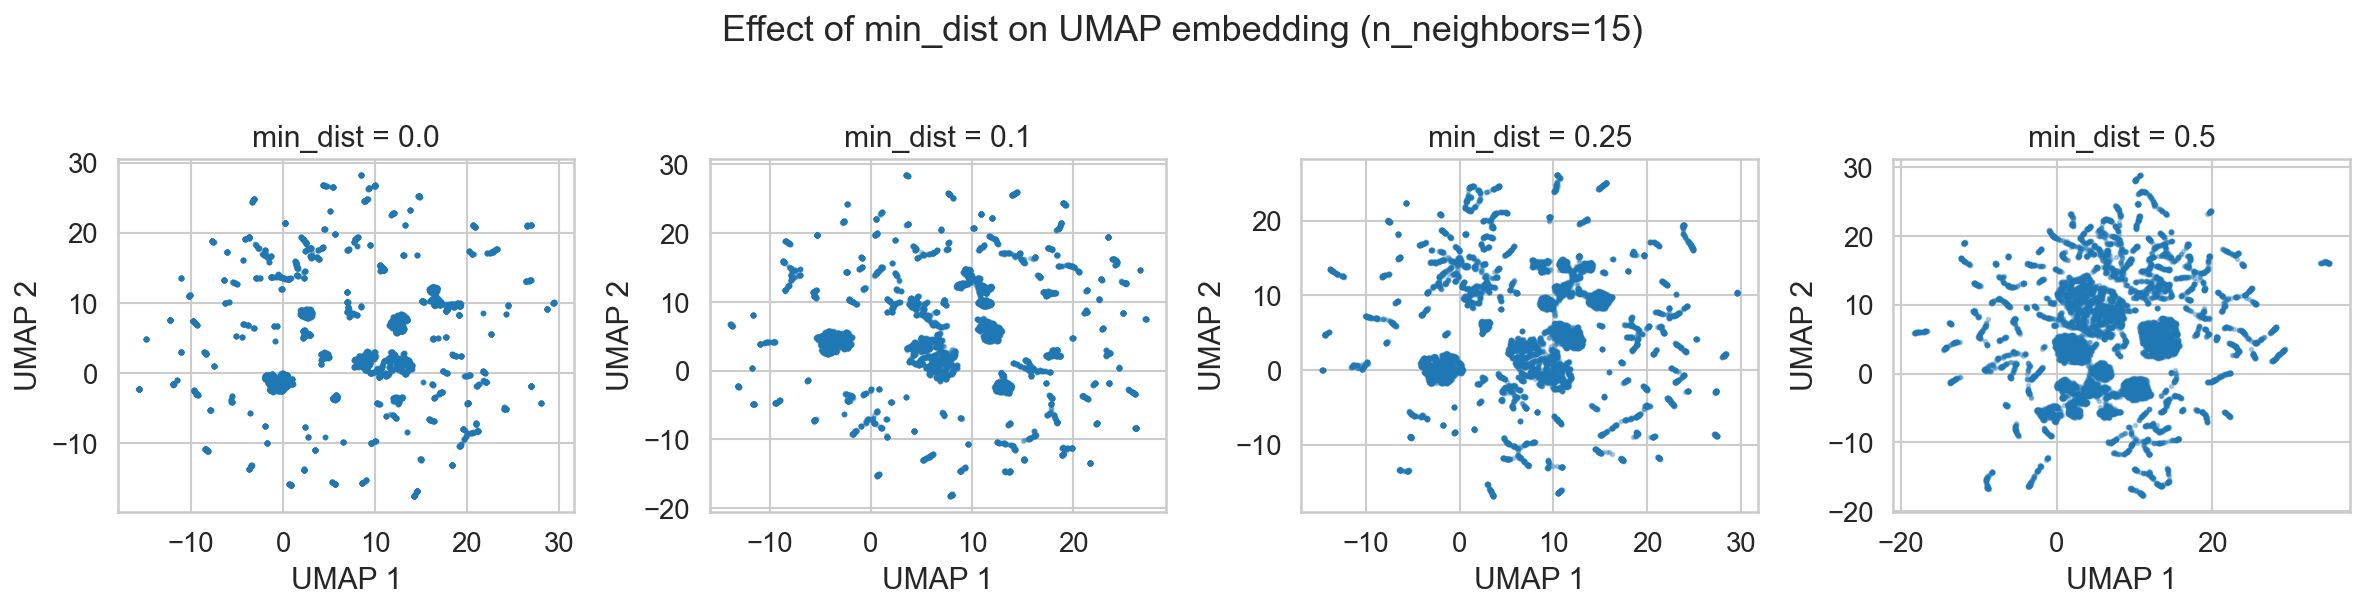

In [13]:
# Compare effect of min_dist on UMAP embedding
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

min_dist_values = [0.0, 0.1, 0.25, 0.5]

for ax, m_dist in zip(axes, min_dist_values):
    umap_test = umap.UMAP(
        n_neighbors=15,
        min_dist=m_dist,
        n_components=2,
        random_state=42,
        n_epochs=500
    )
    X_umap_test = umap_test.fit_transform(X_sample)
    
    ax.scatter(X_umap_test[:, 0], X_umap_test[:, 1], alpha=0.3, s=3)
    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    ax.set_title(f"min_dist = {m_dist}")

plt.suptitle("Effect of min_dist on UMAP embedding (n_neighbors=15)", y=1.02)
plt.tight_layout()
plt.show()

# Interpretation:
# - min_dist=0.0: Tightest clustering, points packed densely in cluster cores
# - min_dist=0.1: Slightly relaxed, clusters visible with some internal structure
# - min_dist=0.25: More spread out, easier to see point density variations
# - min_dist=0.5: Uniform spread, preserves more of the topological structure